In [1]:
# convert jupyter notebook to markdown and hide cell code
# https://stackoverflow.com/questions/27934885/how-to-hide-code-from-cells-in-ipython-notebook-visualized-with-nbviewer
import ipywidgets as widgets
from IPython.display import display, HTML

javascript_functions = {False: "hide()", True: "show()"}
button_descriptions  = {False: "Show code", True: "Hide code"}


def toggle_code(state):

    """
    Toggles the JavaScript show()/hide() function on the div.input element.
    """

    output_string = "<script>$(\"div.input\").{}</script>"
    output_args   = (javascript_functions[state],)
    output        = output_string.format(*output_args)

    display(HTML(output))


def button_action(value):

    """
    Calls the toggle_code function and updates the button description.
    """

    state = value.new

    toggle_code(state)

    value.owner.description = button_descriptions[state]




In [2]:
state = False
toggle_code(state)

button = widgets.ToggleButton(state, description = button_descriptions[state])
button.observe(button_action, "value")

display(button)

In [3]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (20,10)

In [4]:
pathData = "D:\MedData\Incidentes georreferenciados\Incidentes_georreferenciados_"
extension = ".csv"

incidentes2014 = pd.read_csv(pathData + "2014" + extension, parse_dates=['FECHA'])
incidentes2015 = pd.read_csv(pathData + "2015" + extension, parse_dates=['FECHA'])
incidentes2016 = pd.read_csv(pathData + "2016" + extension, parse_dates=['FECHA'])
incidentes2017 = pd.read_csv(pathData + "2017" + extension, parse_dates=['FECHA'])
incidentes2018 = pd.read_csv(pathData + "2018" + extension, parse_dates=['FECHA'])
incidentes2019 = pd.read_csv(pathData + "2019" + extension, parse_dates=['FECHA'])
incidentes2020 = pd.read_csv(pathData + "2020" + extension, parse_dates=['FECHA'])

In [5]:
# Unir todos los dataframes
incidentes = pd.concat([incidentes2014,incidentes2015,incidentes2016,incidentes2017,incidentes2018,incidentes2019,incidentes2020])

In [6]:
# Guardar un archivo con toda la información de cada año de incidentes
incidentes.to_csv(pathData + "full" + extension)

# Análisis de los datos

#### Visualizar el data set
Dar una mirada a los datos a trabajar y su esquema es una buena forma de empezar el análisis de la información.

In [7]:
incidentes.head()

X         Y  OBJECTID RADICADO                     FECHA      HORA  \
0 -75.602726  6.219016    211279  1423828 2014-01-01 00:00:00+00:00  02:20:00   
1 -75.568185  6.260009    211280  1423839 2014-01-01 00:00:00+00:00  12:50:00   
2 -75.549943  6.264765    211281  1423840 2014-01-01 00:00:00+00:00  01:00:00   
3 -75.607611  6.234327    211282  1423849 2014-01-01 00:00:00+00:00  12:37:00   
4 -75.579685  6.299968    211283  1423890 2014-01-01 00:00:00+00:00  10:40:00   

   DIA  PERIODO              CLASE     DIRECCION  ...           COMUNA  \
0    1     2014             Choque    CR 80 CL 8  ...            Belén   
1    1     2014          Atropello   CR 53 CL 61  ...    La Candelaria   
2    1     2014          Atropello   CR 39 CL 70  ...         Manrique   
3    1     2014          Atropello   CL 32 CR 84  ...            Belén   
4    1     2014  Caída de Ocupante  CR 80 CL 101  ...  Doce de Octubre   

         DISENO DIA_NOMBRE MES MES_NOMBRE X_MAGNAMED  Y_MAGNAMED   LONGITUD  \
0  Tramo de via  MIÉRCOLES   1        NaN  831190.08  1179689.50 -75.602726   
1  Tramo de via  MIÉRCOLES   1        NaN  835013.63  1184223.79 -75.568185   
2  Tramo de via  MIÉRCOLES   1        NaN  837032.71  1184749.86 -75.549943   
3  Tramo de via  MIÉRCOLES   1        NaN  830649.47  1181383.24 -75.607611   
4  Tramo de via  MIÉRCOLES   1        NaN  833740.78  1188643.80 -75.579685   

    LATITUD SHAPE  
0  6.219016   NaN  
1  6.260009   NaN  
2  6.264765   NaN  
3  6.234327   NaN  
4  6.299968   NaN  

[5 rows x 25 columns]

In [8]:
print('El data set esta compuesto por%(columas)3d columnas de datos y %(registros)6d mil registros'\
      % {'columas':incidentes.shape[1],'registros':incidentes.shape[0]})

El data set esta compuesto por 25 columnas de datos y 299867 mil registros


Ahoro vamos a ver la estructura del data set.

In [9]:
incidentes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299867 entries, 0 to 25378
Data columns (total 25 columns):
 #   Column         Non-Null Count   Dtype              
---  ------         --------------   -----              
 0   X              287374 non-null  float64            
 1   Y              287374 non-null  float64            
 2   OBJECTID       299867 non-null  int64              
 3   RADICADO       299862 non-null  object             
 4   FECHA          299867 non-null  datetime64[ns, UTC]
 5   HORA           299867 non-null  object             
 6   DIA            299867 non-null  int64              
 7   PERIODO        299867 non-null  int64              
 8   CLASE          299861 non-null  object             
 9   DIRECCION      299867 non-null  object             
 10  DIRECCION_ENC  298548 non-null  object             
 11  CBML           277135 non-null  object             
 12  TIPO_GEOCOD    299867 non-null  object             
 13  GRAVEDAD       299867 non-null

#### Distribución de los datos númericos

In [10]:
incidentes.describe()

X              Y       OBJECTID            DIA  \
count  287374.000000  287374.000000  299867.000000  299867.000000   
mean      -75.587054       6.247631  438755.709321      15.648104   
std         0.039145       0.035587  259360.132355       8.731776   
min       -75.703816       5.661296       1.000000       1.000000   
25%       -75.593015       6.226490  240073.500000       8.000000   
50%       -75.576010       6.248349  514257.000000      16.000000   
75%       -75.566005       6.268574  683052.500000      23.000000   
max       -75.473437       6.368394  815522.000000      31.000000   

             PERIODO            MES     X_MAGNAMED    Y_MAGNAMED  \
count  299867.000000  299867.000000  299867.000000  2.998670e+05   
mean     2016.781476       6.497897  832933.287424  1.182859e+06   
std         1.901574       3.408043    4328.451566  3.903422e+03   
min      2014.000000       1.000000  820000.000000  1.118000e+06   
25%      2015.000000       3.000000  832289.575000  1.180518e+06   
50%      2017.000000       7.000000  834153.060000  1.182934e+06   
75%      2018.000000       9.000000  835264.190000  1.185170e+06   
max      2020.000000      12.000000  845502.630000  1.196215e+06   

            LONGITUD        LATITUD  SHAPE  
count  299867.000000  299867.000000    0.0  
mean      -75.586978       6.247670    NaN  
std         0.039102       0.035290    NaN  
min       -75.703816       5.661296    NaN  
25%       -75.592795       6.226508    NaN  
50%       -75.575959       6.248349    NaN  
75%       -75.565921       6.268563    NaN  
max       -75.473437       6.368394    NaN

La distribución de los datos númericos del set datos de incidentes no es representativo, ya que estos datos solo cualifican el tiempo y la georeferenciación del incidente ocurrido.

#### Rastreo de datos faltantes
El fin de este paso es verificar la cantidad de datos por cada columna, así nos daremos cuenta a que columna le faltan datos, ya que todas deberián tener la misma cantidad y sería igual al total de filas del data set.

In [11]:
incidentes.count()

X                287374
Y                287374
OBJECTID         299867
RADICADO         299862
FECHA            299867
HORA             299867
DIA              299867
PERIODO          299867
CLASE            299861
DIRECCION        299867
DIRECCION_ENC    298548
CBML             277135
TIPO_GEOCOD      299867
GRAVEDAD         299867
BARRIO           276530
COMUNA           278610
DISENO           298583
DIA_NOMBRE       299867
MES              299867
MES_NOMBRE        71174
X_MAGNAMED       299867
Y_MAGNAMED       299867
LONGITUD         299867
LATITUD          299867
SHAPE                 0
dtype: int64

Acontinuación vamos a analizar los datos, observando los datos faltantes columna x columna y que porcentaje de ausencia de datos representa en totalidad de los datos.

In [12]:
# Hallar la totalidad de los registros
total_registros = incidentes.OBJECTID.count()
# Contar la cantidad de filas vacias por cada columna y convertir este resultado en un Dataframe
df_null = pd.DataFrame(incidentes.isnull().sum())
# Renombrar la columna llamada 0
df_null.rename(columns={0:'Registros_Nulos'}, inplace=True)
# Crear una nueva columna vacia
df_null['Porcentaje'] = None
# Calcular el porcentaje de filas vacias 
df_null['Porcentaje'] = np.round(((df_null['Registros_Nulos']/total_registros) * 100),2)
# mostrar el dataframe
df_null

Registros_Nulos  Porcentaje
X                        12493        4.17
Y                        12493        4.17
OBJECTID                     0        0.00
RADICADO                     5        0.00
FECHA                        0        0.00
HORA                         0        0.00
DIA                          0        0.00
PERIODO                      0        0.00
CLASE                        6        0.00
DIRECCION                    0        0.00
DIRECCION_ENC             1319        0.44
CBML                     22732        7.58
TIPO_GEOCOD                  0        0.00
GRAVEDAD                     0        0.00
BARRIO                   23337        7.78
COMUNA                   21257        7.09
DISENO                    1284        0.43
DIA_NOMBRE                   0        0.00
MES                          0        0.00
MES_NOMBRE              228693       76.26
X_MAGNAMED                   0        0.00
Y_MAGNAMED                   0        0.00
LONGITUD                     0        0.00
LATITUD                      0        0.00
SHAPE                   299867      100.00

Se observa que las columnas llamadas: **MES_NOMBRE** y **SHAPE** tienen un alto porcentaje de datos faltantes, se opta por eliminar estas columnas, ya que si aplicamos la función "**dropna()**" de la librería pandas sin eliminar primero estas columnas, dicha función eliminaría todos los registros debido a que la columna llamada **SHAPE** tiene el 100% de ausencia en los datos.

Igualmente observamos que las columnas llamadas (**X**,**Y**,**LONGITUD**,**LATITUD**) tienen la misma información, por tal razón se eliminaran dos de estas columnas.

También, al examinar las columnas (**X_MAGNAMED**,**Y_MAGNAMED**) parecen tener relación con la información de georeferencia, por tal razón optamos por eliminarlas del set de datos.

También, eliminaremos la columna (**CBML**) ya que está es un código para distinguir un lote o parcela en la ciudad de [Medellín](https://geomedellin-m-medellin.opendata.arcgis.com/datasets/040e022660b14622a072915530f93cf9_8).

También, eliminaremos las columnas (**DIRECCION**, **DIRECCION_ENC**) del set de datos, ya que utilizaremos las columnas de información geográfica como son la (**LONGITUD**, **LATITUD**)

También, eliminaremos una de las columnas llamadas (**OBJECTID**, **RADICADO**) estás son identificadores unicos de cada incidente, por tal razón eliminaremos la columna **RADICADO** ya que tiene ausencia de datos y la otra columna **OBJECTID** la utilizaremos como identificador unico de cada fila.

In [13]:
# Eliminar las columnas con demasiados datos faltantes y/o descriminadas del set de datos a utilizar posteriormente
incidentes.drop(columns=['X','Y','MES_NOMBRE','SHAPE','X_MAGNAMED','Y_MAGNAMED','CBML','RADICADO','DIRECCION','DIRECCION_ENC'], axis=1, inplace=True)

Ya habiendo eliminado estas columnas podemos aplicar el método de librería pandas para eliminar los registros con información faltante.

In [14]:
incidentes = incidentes.dropna()

Damos una vista de nuevo al data set

In [15]:
incidentes.head()

OBJECTID                     FECHA      HORA  DIA  PERIODO  \
0    211279 2014-01-01 00:00:00+00:00  02:20:00    1     2014   
1    211280 2014-01-01 00:00:00+00:00  12:50:00    1     2014   
2    211281 2014-01-01 00:00:00+00:00  01:00:00    1     2014   
3    211282 2014-01-01 00:00:00+00:00  12:37:00    1     2014   
4    211283 2014-01-01 00:00:00+00:00  10:40:00    1     2014   

               CLASE                     TIPO_GEOCOD GRAVEDAD  \
0             Choque  Malla vial aproximada: CR 81-7   HERIDO   
1          Atropello                      Malla vial   HERIDO   
2          Atropello                      Malla vial   HERIDO   
3          Atropello                      Malla vial   HERIDO   
4  Caída de Ocupante                      Malla vial   HERIDO   

                 BARRIO           COMUNA        DISENO DIA_NOMBRE  MES  \
0    Loma de los Bernal            Belén  Tramo de via  MIÉRCOLES    1   
1        Jesús Nazareno    La Candelaria  Tramo de via  MIÉRCOLES    1   
2     Manrique Oriental         Manrique  Tramo de via  MIÉRCOLES    1   
3          Las Mercedes            Belén  Tramo de via  MIÉRCOLES    1   
4  Doce de Octubre No.2  Doce de Octubre  Tramo de via  MIÉRCOLES    1   

    LONGITUD   LATITUD  
0 -75.602726  6.219016  
1 -75.568185  6.260009  
2 -75.549943  6.264765  
3 -75.607611  6.234327  
4 -75.579685  6.299968

In [16]:
print('El data set esta compuesto por%(columas)3d columnas de datos y %(registros)6d mil registros'\
      % {'columas':incidentes.shape[1],'registros':incidentes.shape[0]})

El data set esta compuesto por 15 columnas de datos y 275356 mil registros


Ahora vamos a revisar si entre los datos existe información duplicada

In [17]:
# Se realizar un group by por todas las columnas, además renombra la columna creada con la cantidad de veces que esta cada fila
duplicados = incidentes.groupby(incidentes.columns.tolist()).size().reset_index().rename(columns={0:'registros'})
# Se listan todos los registros con cantidad de registros > 1
duplicados[duplicados['registros']>1]

Empty DataFrame
Columns: [OBJECTID, FECHA, HORA, DIA, PERIODO, CLASE, TIPO_GEOCOD, GRAVEDAD, BARRIO, COMUNA, DISENO, DIA_NOMBRE, MES, LONGITUD, LATITUD, registros]
Index: []

La consulta anterior no arrojo registros, lo que nos indica que entre el data set no hay filas duplicadas.

Ahora, verificamos que en set de datos no haya información faltante.

In [18]:
incidentes.isnull().sum()

OBJECTID       0
FECHA          0
HORA           0
DIA            0
PERIODO        0
CLASE          0
TIPO_GEOCOD    0
GRAVEDAD       0
BARRIO         0
COMUNA         0
DISENO         0
DIA_NOMBRE     0
MES            0
LONGITUD       0
LATITUD        0
dtype: int64

### Análisis de Columnas Categoricas
#### Columna CLASE

In [19]:
pd.DataFrame(incidentes.groupby(['CLASE'])['OBJECTID'].count()).sort_values(by='OBJECTID')

OBJECTID
CLASE                      
Incendio                 35
Caída de Ocupante      5590
Volcamiento           10184
Caida Ocupante        18394
Atropello             26327
Otro                  29520
Choque               185306

Se observa que la categoría "**Caida Ocupante**" y "**Caída de Ocupante**" son la misma, pero estan escritas de forma diferente, por lo tanto vamos a unificarla con un solo valor.

In [20]:
# Reemplazar valores categoricos similares por un unico valor
incidentes.loc[(incidentes['CLASE']=='Caida Ocupante'),'CLASE'] = 'Caída de Ocupante'
# incidentes.loc[(incidentes['PERIODO'] ==2017) & (incidentes['CLASE']=='Choque y Atropello'),'CLASE'] = 'Choque'

Verificamos la actualización realizada

In [21]:
pd.DataFrame(incidentes.groupby(['CLASE'])['OBJECTID'].count()).sort_values(by='OBJECTID')

OBJECTID
CLASE                      
Incendio                 35
Volcamiento           10184
Caída de Ocupante     23984
Atropello             26327
Otro                  29520
Choque               185306

#### Columna TIPO_GEOCOD

In [22]:
pd.DataFrame(incidentes.groupby(['TIPO_GEOCOD'])['OBJECTID'].count()).sort_values(by='OBJECTID')

OBJECTID
TIPO_GEOCOD                               
Malla vial aproximada: CR 89-27          1
Malla vial aproximada: CL 96-75          1
Malla vial aproximada: CL 96-82          1
Malla vial aproximada: CR 73-32A         1
Malla vial aproximada: CL 97-22B         1
...                                    ...
No Ubicada                            1456
EPM con Interior                      2669
EPM sin Interior                      5750
Malla vial cruce invertido           13732
Malla vial                          201672

[6491 rows x 1 columns]

Esta columna regresa demaisados registros "filas", indicando mucha diversidad de categorías, por este motivo la descartaré del set de datos.

In [23]:
incidentes.drop(columns=['TIPO_GEOCOD'], axis=1, inplace=True)

#### Columna GRAVEDAD

In [24]:
pd.DataFrame(incidentes.groupby(['GRAVEDAD'])['OBJECTID'].count()).sort_values(by='OBJECTID')

OBJECTID
GRAVEDAD             
CON MUERTOS       136
MUERTO            294
CON HERIDOS     15209
SOLO DAÑOS     122812
HERIDO         136905

Esta columna tiene diferentes nombres de categorías de los incidentes **CON HERIDOS** y **CON MUERTOS**, por lo anterior actualizaremos estos registros a una unica categoría.

In [25]:
incidentes.loc[incidentes['GRAVEDAD']=='CON HERIDOS','GRAVEDAD'] = 'HERIDO'
incidentes.loc[incidentes['GRAVEDAD']=='CON MUERTOS','GRAVEDAD'] = 'MUERTO'

Verificamos la actualización realizada

In [26]:
pd.DataFrame(incidentes.groupby(['GRAVEDAD'])['OBJECTID'].count()).sort_values(by='OBJECTID')

OBJECTID
GRAVEDAD            
MUERTO           430
SOLO DAÑOS    122812
HERIDO        152114

#### Columna COMUNA

In [27]:
pd.DataFrame(incidentes.groupby(['COMUNA'])['OBJECTID'].count()).sort_values(by='OBJECTID')

OBJECTID
COMUNA                                              
0                                                  3
SN                                                 4
Corregimiento De Altavista                        10
AU                                                16
Corregimiento de San Sebastián de Palmitas        18
Corregimiento De Santa Elena                      19
Corregimiento De San Cristóbal                    32
Doce De Octubre                                   46
Corregimiento De San Antonio De Prado             79
In                                               146
Corregimiento de Altavista                       618
Corregimiento de Santa Elena                    1000
Sin Inf                                         1466
Corregimiento de San Antonio de Prado           2798
Corregimiento de San Cristóbal                  2854
Santa Cruz                                      3775
Popular                                         4137
San Javier                                      4853
Doce de Octubre                                 7467
Villa Hermosa                                   7523
Manrique                                        8665
La América                                      8969
Buenos Aires                                   10629
Aranjuez                                       16281
Robledo                                        17946
Belén                                          18116
Guayabal                                       19912
El Poblado                                     22588
Castilla                                       27435
Laureles Estadio                               30653
La Candelaria                                  57298

Se examina la información y se opta por estandirazar en una sola categoría los nombres de comuna incorrectos como son (**0**,**SN**,**AU**,**In**).

In [28]:
incidentes.loc[incidentes['COMUNA'].isin(['0','SN','AU','In']),'COMUNA'] = 'Sin Inf'

Verificamos la actualización realizada

In [29]:
pd.DataFrame(incidentes.groupby(['COMUNA'])['OBJECTID'].count()).sort_values(by='OBJECTID')

OBJECTID
COMUNA                                              
Corregimiento De Altavista                        10
Corregimiento de San Sebastián de Palmitas        18
Corregimiento De Santa Elena                      19
Corregimiento De San Cristóbal                    32
Doce De Octubre                                   46
Corregimiento De San Antonio De Prado             79
Corregimiento de Altavista                       618
Corregimiento de Santa Elena                    1000
Sin Inf                                         1635
Corregimiento de San Antonio de Prado           2798
Corregimiento de San Cristóbal                  2854
Santa Cruz                                      3775
Popular                                         4137
San Javier                                      4853
Doce de Octubre                                 7467
Villa Hermosa                                   7523
Manrique                                        8665
La América                                      8969
Buenos Aires                                   10629
Aranjuez                                       16281
Robledo                                        17946
Belén                                          18116
Guayabal                                       19912
El Poblado                                     22588
Castilla                                       27435
Laureles Estadio                               30653
La Candelaria                                  57298

#### Columna BARRIO

In [30]:
pd.DataFrame(incidentes.groupby(['BARRIO'])['OBJECTID'].count()).sort_values(by='OBJECTID')

OBJECTID
BARRIO                    
906                      1
716                      1
202                      1
Travesías                1
819                      1
...                    ...
Barrio Colón          4854
Perpetuo Socorro      5409
Campo Amor            5550
Caribe                5574
La Candelaria         6667

[430 rows x 1 columns]

Esta columna regresa demaisados registros "filas", indicando mucha diversidad de categorías, por este motivo la descartaré del set de datos. Para hallar el barrio se inferira de la columna llamada **COMUNA**, columna que si utiilzaremos en set de datos.

In [31]:
incidentes.drop(columns='BARRIO', axis=1, inplace=True)

#### Columna DISENO

In [32]:
pd.DataFrame(incidentes.groupby(['DISENO'])['OBJECTID'].count()).sort_values(by='OBJECTID')

OBJECTID
DISENO                 
Pontón               29
Tunel                63
Via peatonal         63
Paso a Nivel        123
Paso Inferior       701
Puente             1021
Ciclo Ruta         1031
Paso Elevado       1395
Glorieta           6777
Lote o Predio     25482
Interseccion      45915
Tramo de via     192756

Esta categoria no tiene nombres que corregir.

#### Columna DIA_NOMBRE

In [33]:
pd.DataFrame(incidentes.groupby(['DIA_NOMBRE'])['OBJECTID'].count()).sort_values(by='OBJECTID')

OBJECTID
DIA_NOMBRE          
DOMINGO        25928
LUNES          39546
SÁBADO         39612
JUEVES         41599
MIÉRCOLES      41902
MARTES         42974
VIERNES        43795

Esta categoria no tiene nombres que corregir.

### Modificar los tipos de datos de las columnas
Modificar el tipo de dato de las columnas según los valores contenidos en ellas, este ajuste tiene como finalidad reducir la memoria **RAM** que esta ocupa en la memoria física del sistema anfitrión, ya que si nuestro archivo pesa menos bytes, se optimizaran los recursos de maquina para los procesos siguientes.

In [34]:
incidentes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 275356 entries, 0 to 25378
Data columns (total 13 columns):
 #   Column      Non-Null Count   Dtype              
---  ------      --------------   -----              
 0   OBJECTID    275356 non-null  int64              
 1   FECHA       275356 non-null  datetime64[ns, UTC]
 2   HORA        275356 non-null  object             
 3   DIA         275356 non-null  int64              
 4   PERIODO     275356 non-null  int64              
 5   CLASE       275356 non-null  object             
 6   GRAVEDAD    275356 non-null  object             
 7   COMUNA      275356 non-null  object             
 8   DISENO      275356 non-null  object             
 9   DIA_NOMBRE  275356 non-null  object             
 10  MES         275356 non-null  int64              
 11  LONGITUD    275356 non-null  float64            
 12  LATITUD     275356 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(2), int64(4), object(6)
memory usage: 29

Vamos a modificar el tipo de dato de las columnas númericas, cuyos valores no superan el tipo de dato "**int64**" por un tipo adecuado asu contenido.

In [35]:
incidentes[["DIA", "PERIODO", "MES"]] = incidentes[["DIA", "PERIODO", "MES"]].apply(pd.to_numeric, downcast="signed")

Vamos a modificar el tipo de las columnas cuyo contenido es texto, pasaran de ser de tipo "**object**" a ser "**string**".

In [36]:
incidentes[['CLASE','GRAVEDAD','COMUNA','DISENO','DIA_NOMBRE']] =\
incidentes[['CLASE','GRAVEDAD','COMUNA','DISENO','DIA_NOMBRE']].astype('string')

Ahora, vamos a unir los campos **FECHA** y **HORA** del data set, con el fin de utilizar este dato como índice en el análisis descriptivo de la serie de tiempo.

In [37]:
# Eliminar los caracteres '00:00:00+00:00', tomando solo los primeros 10 caracteres del campo FECHA
incidentes['FECHA'] = incidentes['FECHA'].apply(lambda x: str(x)[0:10])
# Unir los dos campos
incidentes['Fecha_Hora'] = pd.DataFrame(incidentes['FECHA'].map(str) + ' ' + incidentes['HORA'])
# Convertir el nuevo campo como datetime
incidentes['Fecha_Hora'] = pd.to_datetime(incidentes['Fecha_Hora'])

Ahora, vamos a crear la columna NOMBRE_MES, la cual elimnamos previamente por falta de datos

In [38]:
import datetime as dt
incidentes['NOMBRE_MES'] = incidentes['Fecha_Hora'].dt.strftime('%B')

In [39]:
def tranaslte_month(mes):
    dict_months = {
        'January': 'Enero',
        'February': 'Febrero',
        'March': 'Marzo',
        'April': 'Abril',
        'May': 'Mayo',
        'June': 'Junio',
        'July': 'Julio',
        'August': 'Agosto',
        'September': 'Septiembre',
        'October': 'Octubre',
        'November': 'Noviembre',
        'December': 'Diciembre'
    }
    return dict_months[mes]

In [40]:
incidentes['NOMBRE_MES'] = incidentes['NOMBRE_MES'].apply(lambda x: tranaslte_month(x))

Verificar que el cambio de los tipos de datos se haya realizado, además de ver si la memoria a usar rebajo.

In [41]:
incidentes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 275356 entries, 0 to 25378
Data columns (total 15 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   OBJECTID    275356 non-null  int64         
 1   FECHA       275356 non-null  object        
 2   HORA        275356 non-null  object        
 3   DIA         275356 non-null  int8          
 4   PERIODO     275356 non-null  int16         
 5   CLASE       275356 non-null  string        
 6   GRAVEDAD    275356 non-null  string        
 7   COMUNA      275356 non-null  string        
 8   DISENO      275356 non-null  string        
 9   DIA_NOMBRE  275356 non-null  string        
 10  MES         275356 non-null  int8          
 11  LONGITUD    275356 non-null  float64       
 12  LATITUD     275356 non-null  float64       
 13  Fecha_Hora  275356 non-null  datetime64[ns]
 14  NOMBRE_MES  275356 non-null  object        
dtypes: datetime64[ns](1), float64(2), int16(1), int64(1)

Observamos que los tipos de datos del set de datos a cambiado y que el tamaño del set de datos ha disminuido desde su construcción líneas arriba, ahora con la eliminación de las columnas y el cambio de los tipos de datos y creación de nuevas columnas, tenemos una rebaja del **52.3%** de la memoria a usar.

In [42]:
incidentes.head()

OBJECTID       FECHA      HORA  DIA  PERIODO              CLASE GRAVEDAD  \
0    211279  2014-01-01  02:20:00    1     2014             Choque   HERIDO   
1    211280  2014-01-01  12:50:00    1     2014          Atropello   HERIDO   
2    211281  2014-01-01  01:00:00    1     2014          Atropello   HERIDO   
3    211282  2014-01-01  12:37:00    1     2014          Atropello   HERIDO   
4    211283  2014-01-01  10:40:00    1     2014  Caída de Ocupante   HERIDO   

            COMUNA        DISENO DIA_NOMBRE  MES   LONGITUD   LATITUD  \
0            Belén  Tramo de via  MIÉRCOLES    1 -75.602726  6.219016   
1    La Candelaria  Tramo de via  MIÉRCOLES    1 -75.568185  6.260009   
2         Manrique  Tramo de via  MIÉRCOLES    1 -75.549943  6.264765   
3            Belén  Tramo de via  MIÉRCOLES    1 -75.607611  6.234327   
4  Doce de Octubre  Tramo de via  MIÉRCOLES    1 -75.579685  6.299968   

           Fecha_Hora NOMBRE_MES  
0 2014-01-01 02:20:00      Enero  
1 2014-01-01 12:50:00      Enero  
2 2014-01-01 01:00:00      Enero  
3 2014-01-01 12:37:00      Enero  
4 2014-01-01 10:40:00      Enero

Ya que hemos terminado de análizar los datos vamos a generar un nuevo archivo .CSV con la información transformada y seleccionada. Esto es con el fin de utilizar este archivo en la siguiente sección ya preparado y no tener que hacer ningún ajuste a la información y sea usado solo para el análisis de la información.

In [43]:
incidentes.to_csv(pathData + "all" + extension)

Eliminamos toda la memoría del **Jupyter Notebook** e iniciamos una nueva sección. Esto eliminará todas las variables utilizadas hasta ahora.

In [44]:
# borrar todas las variables en IPython - Sin confirmación del usuario
%reset -f 

*****

# Análisis Descriptivo

In [45]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (20,10)
import folium
import seaborn as sns

cm = sns.light_palette("green", as_cmap=True)

pathData = "D:\MedData\Incidentes georreferenciados\Incidentes_georreferenciados_"
extension = ".csv"

columnas = ['FECHA','HORA','PERIODO','MES','DIA','CLASE','GRAVEDAD','COMUNA','DISENO','DIA_NOMBRE','MES','LONGITUD','LATITUD']

In [46]:
def highlight_max(s):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_max = s == s.max()
    return ['background-color: green' if v else '' for v in is_max]

Abrir el set de datos depurado y generado en la sección análisis de los datos.

In [47]:
incidentes = pd.read_csv(pathData + "all" + extension, parse_dates=['FECHA','Fecha_Hora'], index_col=['Fecha_Hora'])
incidentes

Unnamed: 0  OBJECTID      FECHA      HORA  DIA  PERIODO  \
Fecha_Hora                                                                     
2014-01-01 02:20:00           0    211279 2014-01-01  02:20:00    1     2014   
2014-01-01 12:50:00           1    211280 2014-01-01  12:50:00    1     2014   
2014-01-01 01:00:00           2    211281 2014-01-01  01:00:00    1     2014   
2014-01-01 12:37:00           3    211282 2014-01-01  12:37:00    1     2014   
2014-01-01 10:40:00           4    211283 2014-01-01  10:40:00    1     2014   
...                         ...       ...        ...       ...  ...      ...   
2020-03-02 06:50:00       25374    815518 2020-03-02  06:50:00    2     2020   
2020-01-15 07:00:00       25375    815519 2020-01-15  07:00:00   15     2020   
2020-01-18 04:30:00       25376    815520 2020-01-18  04:30:00   18     2020   
2020-06-26 03:56:00       25377    815521 2020-06-26  03:56:00   26     2020   
2020-07-10 01:10:00       25378    815522 2020-07-10  01:10:00   10     2020   

                                 CLASE    GRAVEDAD            COMUNA  \
Fecha_Hora                                                             
2014-01-01 02:20:00             Choque      HERIDO             Belén   
2014-01-01 12:50:00          Atropello      HERIDO     La Candelaria   
2014-01-01 01:00:00          Atropello      HERIDO          Manrique   
2014-01-01 12:37:00          Atropello      HERIDO             Belén   
2014-01-01 10:40:00  Caída de Ocupante      HERIDO   Doce de Octubre   
...                                ...         ...               ...   
2020-03-02 06:50:00          Atropello      HERIDO           Popular   
2020-01-15 07:00:00             Choque  SOLO DAÑOS  Laureles Estadio   
2020-01-18 04:30:00             Choque      HERIDO             Belén   
2020-06-26 03:56:00          Atropello      MUERTO     La Candelaria   
2020-07-10 01:10:00             Choque  SOLO DAÑOS     La Candelaria   

                            DISENO DIA_NOMBRE  MES   LONGITUD   LATITUD  \
Fecha_Hora                                                                
2014-01-01 02:20:00   Tramo de via  MIÉRCOLES    1 -75.602726  6.219016   
2014-01-01 12:50:00   Tramo de via  MIÉRCOLES    1 -75.568185  6.260009   
2014-01-01 01:00:00   Tramo de via  MIÉRCOLES    1 -75.549943  6.264765   
2014-01-01 12:37:00   Tramo de via  MIÉRCOLES    1 -75.607611  6.234327   
2014-01-01 10:40:00   Tramo de via  MIÉRCOLES    1 -75.579685  6.299968   
...                            ...        ...  ...        ...       ...   
2020-03-02 06:50:00  Lote o Predio  LUNES        3 -75.550848  6.288293   
2020-01-15 07:00:00   Interseccion  MIÉRCOLES    1 -75.587973  6.254189   
2020-01-18 04:30:00   Tramo de via  SÁBADO       1 -75.576866  6.232463   
2020-06-26 03:56:00   Tramo de via  VIERNES      6 -75.568822  6.257265   
2020-07-10 01:10:00   Interseccion  VIERNES      7 -75.572551  6.245209   

                    NOMBRE_MES  
Fecha_Hora                      
2014-01-01 02:20:00      Enero  
2014-01-01 12:50:00      Enero  
2014-01-01 01:00:00      Enero  
2014-01-01 12:37:00      Enero  
2014-01-01 10:40:00      Enero  
...                        ...  
2020-03-02 06:50:00      Marzo  
2020-01-15 07:00:00      Enero  
2020-01-18 04:30:00      Enero  
2020-06-26 03:56:00      Junio  
2020-07-10 01:10:00      Julio  

[275356 rows x 15 columns]

## Análisis de Columnas Categoricas

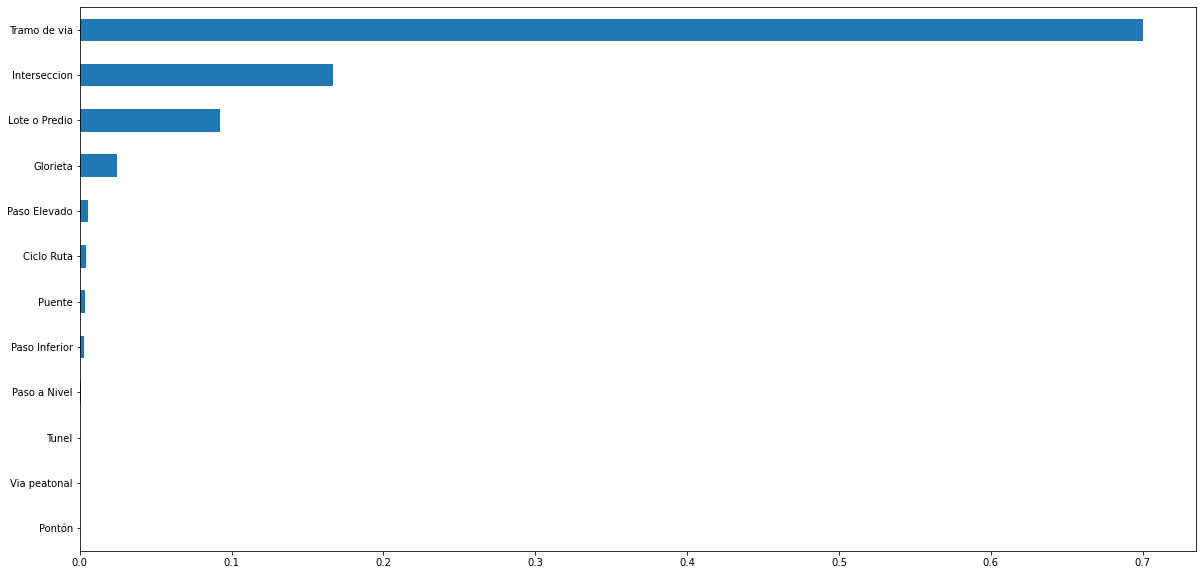

In [48]:
# https://naps.com.mx/blog/python-distribucion-de-variables/
def distribucion_variable_categorica(col):
    incidentes[col].value_counts(ascending=True,normalize=True).tail(20).plot.barh()
    plt.show()
    
distribucion_variable_categorica('DISENO')

In [49]:
# periodos = range(2014,2021,1)
periodos = [2014,2015,2016,2017,2018,2019,2020]

### Resumen Columna CLASE
A continuación veremos un resumen de la columna **CLASE** como esta distribuida la cantidad de incidentes en los periodos que conforman el data set. Además se anexan algunas columnas de tendencia central promedio o media.

In [50]:
# Crear data frame con la información resumida para columna CLASE
incidentes_periodo = incidentes.pivot_table(index='PERIODO', 
                                            columns=['CLASE'], 
                                            values='OBJECTID', 
                                            aggfunc='count', 
                                            fill_value=0).T

# Anexar las columnas calculadas al set de datos resumido
incidentes_periodo['Total Fila'] = incidentes_periodo.sum(axis=1)
incidentes_periodo['Porcentaje'] = np.round(((incidentes_periodo['Total Fila'] / incidentes_periodo['Total Fila'].sum()) * 100),2)
incidentes_periodo['Promedio Año'] = np.round(incidentes_periodo['Total Fila'] / len(periodos),0)
incidentes_periodo['Promedio Mes'] = np.round(incidentes_periodo['Total Fila'] / (len(periodos)*12),0) 
incidentes_periodo['Promedio Día'] = np.round(incidentes_periodo['Total Fila'] / (len(periodos)*365),0) 

# Anexar la fila con el total por cada columna
sums = pd.DataFrame(incidentes_periodo.select_dtypes(pd.np.number).sum().rename('Total Columna'))
incidentes_periodo = incidentes_periodo.append(sums.T)

# Listar los datos ordenados por total de la fila
incidentes_periodo.sort_values(by='Total Fila').style.format('{:,}')

#### Observaciones
Según la definición de [Clases de Incidentes](https://www.educacionbogota.edu.co/portal_institucional/sites/default/files/inline-files/Anexo%2011%20protocolo_atencion_siniestros_viales_Establecimientos_edu.pdf)
se observa: 

- La categoría "**Choque**" es el incidente más representativo con un valor del **67.3%**, está cantidad se puede presentar por la falta de aplicar varias normas del **código nacional de transito terrestre** como son: superar los límites de veloicidad ([artículo 106](https://leyes.co/codigo_nacional_de_transito_terrestre/106.htm) y [artículo 107](https://leyes.co/codigo_nacional_de_transito_terrestre/107.htm)),respetar la distancia entre vehículos,  estar distraido al conducir.
- La categoría "**Otro**" a pesar que según su definición es poco frecuente que se presente, es el 2do más representativo con un **10.72%**, creo que al momento de evaluar el incidente de transito verificar bien su clase ya que no hay una concordancia entre su definición y la cantidad de incidetes registrados en esta clase.
- La categoría "**Atropello**" para mí es la más delicada, ya que es cuando un vehículo y un peatón se ven involucrados. Ubicada en el 3er puesto con un **9.56%**. Siendo el petón el más afectado. Más adelante combinaremos este con la otra columna categorica llamda **GRAVEDAD** y observar cuantos de estos terminaron con el peatón muerto.
- La categoría "**Caída de Ocupante**" con un **8.71%**, podría realizar una hipotesis de que se debe a que los ocupantes del vehículo no se colocan el cinturón de seguridad. Lo que significa que cada día **9** personas sufren esta clase incidente de transito en la ciudad de Medellín por no tener el cinturón de seguridad puesto. A pesar de que el [artículo 82](https://leyes.co/codigo_nacional_de_transito_terrestre/82.htm#:~:text=Art%C3%ADculo%2082.,Cintur%C3%B3n%20de%20seguridad&text=Es%20obligatorio%20el%20uso%20del,territorio%20nacional%2C%20incluyendo%20las%20urbanas.) del **código nacional de transito terrestre** indica que el uso cinturón de seguridad es obligatorió.


Todo lo anterior beneficia a la industría de autopartes de la ciudad y mal para las aseguradoras por pago de estos arreglos.

A continuación veremos un resumen de la columna **GRAVEDAD** como esta distribuida la cantidad de incidentes en los periodos que conforman el data set.

#### Graficar la información de la columna CLASE

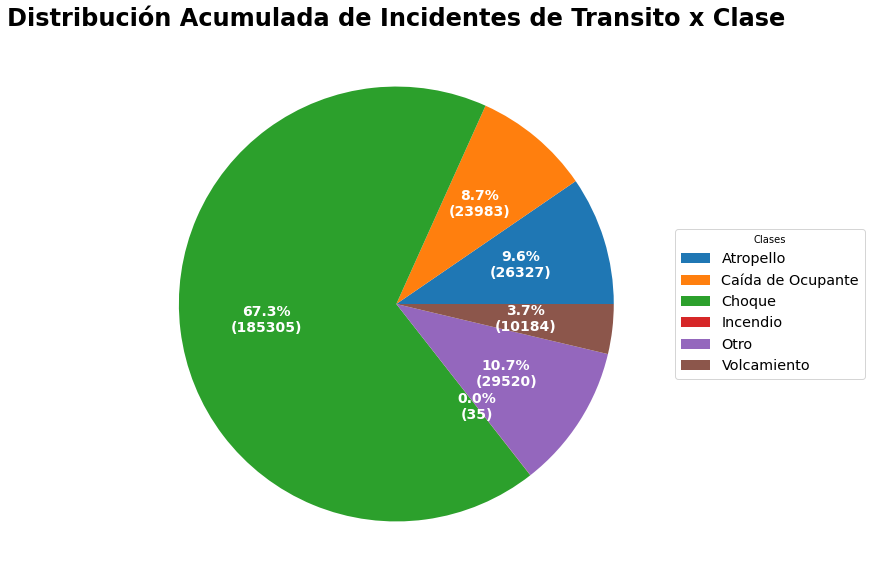

In [51]:
fig, ax = plt.subplots()

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)

# Extraer la fila con indice 'Total Columna' de la columna 'Total Fila'
data = incidentes_periodo['Total Fila']
bad_col = data.index.isin(['Total Columna'])
data = data[~bad_col]

wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))

ax.legend(wedges, data.index,
          title="Clases",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1),
          fontsize = 'x-large')

plt.setp(autotexts, size=14, weight="bold")

ax.set_title("Distribución Acumulada de Incidentes de Transito x Clase", size=24, weight="bold")

plt.show()

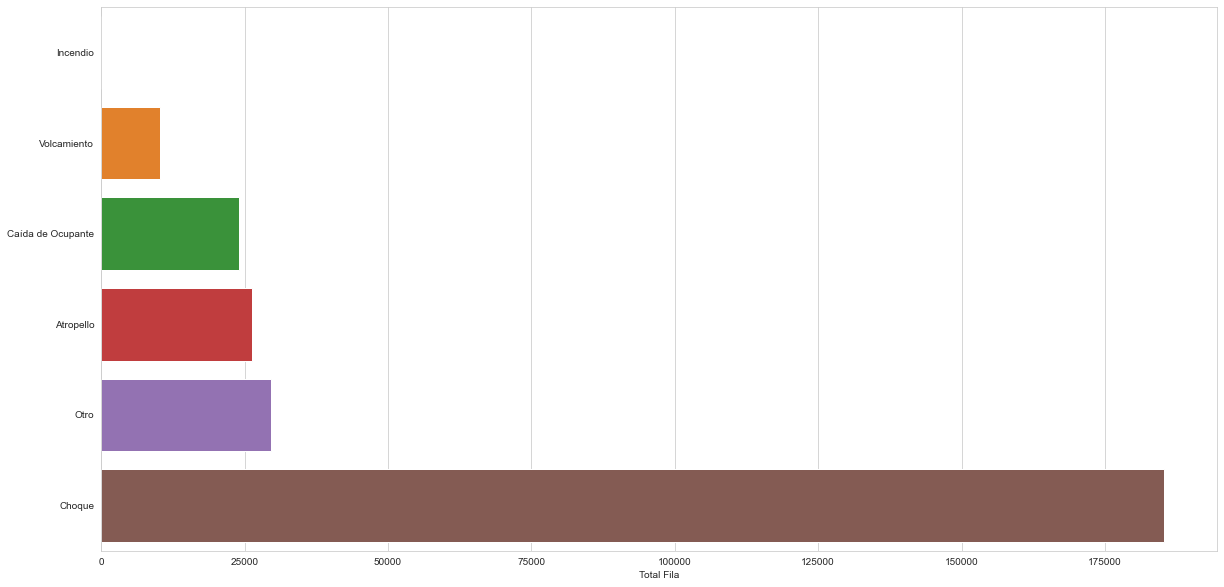

In [52]:
from numpy import median

# Extraer la fila con indice 'Total Columna' de la columna 'Total Fila'
data = incidentes_periodo[['Total Fila']].sort_values(by='Total Fila')
bad_col = data.index.isin(['Total Columna'])
data = data[~bad_col]

sns.set_style(style="whitegrid")

# ax = sns.barplot(y=data.index, x="Total", data=data, estimator=median, ci=68, capsize=.2, dodge=False,color="salmon")
# ax = sns.barplot(y=data.index, x="Total", data=data, estimator=median, ci=68, capsize=.2,palette="Blues_d")
ax = sns.barplot(y=data.index, x="Total Fila", data=data)
# ax = sns.barplot(y=data.index, x="Total", data=data,
#                  linewidth=2.5, facecolor=(1, 1, 1, 0),
#                  errcolor=".2", edgecolor=".2")

### Resumen Columna GRAVEDAD

In [53]:
incidentes_gravedad = incidentes.pivot_table(index='PERIODO', columns=['GRAVEDAD'], values='OBJECTID', aggfunc='count', fill_value=0).T
incidentes_gravedad['Total Fila'] = incidentes_gravedad.sum(axis=1)
incidentes_gravedad['Porcentaje'] = np.round(((incidentes_gravedad['Total Fila'] / incidentes_gravedad['Total Fila'].sum()) * 100),4)

# Anexar la fila con el total por cada columna
# sums = pd.DataFrame(incidentes_gravedad.select_dtypes(pd.np.number).sum().rename('Total Columna'))
# incidentes_gravedad = incidentes_gravedad.append(sums.T)

incidentes_gravedad\
    .sort_values(by='Total Fila')\
    .style\
        .apply(highlight_max, subset=[2014, 2015, 2016,2017,2018,2019,2020], axis=1)\
        .format('{:,}')

- Se observa que la información para la categoría "**MUERTO**" no esta registrada para los años del **2014** al **2017**, lo que indica que la cifra de **430** muertos es más alta. Además se resalta que el año **2019** tiene la más alta catidad de muertos por año.
- Igualmente se observa que el porcentaje de la categoría **HERIDO** es del **55.24%**, lo que significa aproximadamente que por cada **2** incidentes de transito habrá **1** incidente con personas heridas. Ahora si sumamos los porcentajes de las categorías "**HERIDO**" y "**MUERTO**" daría **55.40%** y de este valor hay un porcentaje del **0.28%** que una persona herida resulte **MUERTO**.

#### Graficar la información de la columna GRAVEDAD

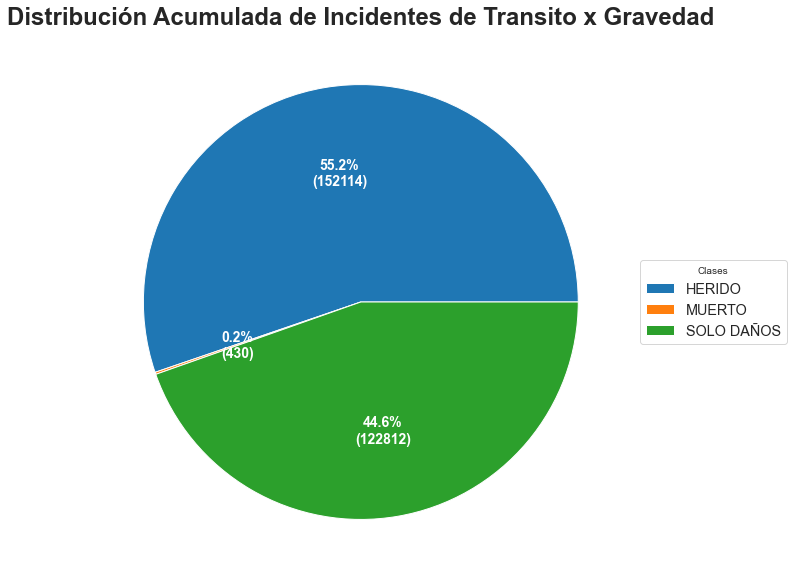

In [54]:
fig, ax = plt.subplots()

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)

# Extraer la fila con indice 'Total Columna' de la columna 'Total Fila'
data = incidentes_gravedad['Total Fila']
bad_col = data.index.isin(['Total Columna'])
data = data[~bad_col]

wedges, texts, autotexts = ax.pie(data
                                  , autopct=lambda pct: func(pct, data)
                                  , textprops=dict(color="w")
                                 )

ax.legend(wedges, 
          data.index,
          title="Clases",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1),
          fontsize = 'x-large')

plt.setp(autotexts, size=14, weight="bold")

ax.set_title("Distribución Acumulada de Incidentes de Transito x Gravedad", size=24, weight="bold")

plt.show()

#### Distribución de incidentes por las columnas [GRAVEDAD y CLASE]

In [55]:
incidentes_clase_gravedad = incidentes.pivot_table(index='PERIODO', 
                                                   columns=['GRAVEDAD','CLASE'], 
                                                   values='OBJECTID', 
                                                   aggfunc='count', 
                                                   fill_value=0).T
# Anexar nuevas columas calculadas
incidentes_clase_gravedad['Total Fila'] = incidentes_clase_gravedad.sum(axis=1)
incidentes_clase_gravedad['Porcentaje'] = np.round(((incidentes_clase_gravedad['Total Fila']\
                                                     / incidentes_clase_gravedad['Total Fila'].sum()) * 100),4)

# Imprimir el data set con resaltando los valores más altos por fila o categoría x periodo o año
incidentes_clase_gravedad.style.apply(highlight_max,
                                      subset=[2014, 2015, 2016,2017,2018,2019,2020], 
                                      axis=1).format('{:,}')\
                                .apply(highlight_max,
                                      subset=['Total Fila'],
                                      axis=0)

En el resumen de datos anterior se pueden observar una distribución agrupada por las columnas (**GRAVEDAD**,**CLASE**) y distribuda por la columna **PERIODO** o año. Igualmente podemos ver un acumulado total por cada fila y el porcentaje que representa para el set de datos.Además se resaltan los valores más altos por categoría y el año que se presento.

#### Columna COMUNA

In [56]:
# Crear data frame con la información resumida para columna CLASE
incidentes_tipo_geocod = incidentes.pivot_table(index='PERIODO', 
                                            columns=['COMUNA'], 
                                            values='OBJECTID', 
                                            aggfunc='count', 
                                            fill_value=0).T

# Anexar nuevas columas calculadas
incidentes_tipo_geocod['Total Fila'] = incidentes_tipo_geocod.sum(axis=1)
incidentes_tipo_geocod['Porcentaje'] = np.round(((incidentes_tipo_geocod['Total Fila']\
                                                     / incidentes_tipo_geocod['Total Fila'].sum()) * 100),4)

# Imprimir el data set con resaltando los valores más altos por fila o categoría x periodo o año
incidentes_tipo_geocod\
        .sort_values(by='Total Fila')\
        .style.apply(highlight_max,subset=[2014, 2015, 2016,2017,2018,2019,2020], axis=1)\
        .format('{:,}')\
        .apply(highlight_max,subset=['Total Fila'],axis=0)

Del resumen anterior se puede observar que para algunas comunas no tiene la información de incidentes de los años 2014 al 2019. Además se resaltan la comuna que más incdentes tuvo y en que periodo o año.Finalmente por la columa "total fila" se resalta cual tiene más incidentes.

Ahora vamos a combinar los valores del data set por las columnas **GRAVEDAD**,**CLASE**,**COMUNA**.

In [57]:
incidentes_clase_gravedad = incidentes.pivot_table(index='PERIODO', 
                                                   columns=['GRAVEDAD','CLASE','COMUNA'], 
                                                   values='OBJECTID', 
                                                   aggfunc='count', 
                                                   fill_value=0).T
# Anexar nuevas columas calculadas
incidentes_clase_gravedad['Total Fila'] = incidentes_clase_gravedad.sum(axis=1)
incidentes_clase_gravedad['Porcentaje'] = np.round(((incidentes_clase_gravedad['Total Fila']\
                                                     / incidentes_clase_gravedad['Total Fila'].sum()) * 100),4)

# Resaltar el mayor valor por cada fila del data set resumen
incidentes_clase_gravedad\
    .style.set_caption('HeatMap, Distribución de Incidentes por GRAVEDAD vs CLASE vs COMUNA por Año')\
    .background_gradient(cmap=cm, axis=1, subset=[2014, 2015, 2016,2017,2018,2019,2020])\
    .format('{:,}')       

Ahora vamos a combinar los valores del data set por las columnas **GRAVEDAD**,**COMUNA** con el fin de ver el resumen un poco más corto. 

In [58]:
incidentes_gravedad_comuna = incidentes.pivot_table(index=['GRAVEDAD'], 
                                                   columns=['COMUNA'], 
                                                   values='OBJECTID', 
                                                   aggfunc='count', 
                                                   fill_value=0).T
# Anexar nuevas columas calculadas
incidentes_gravedad_comuna['Total Fila'] = incidentes_gravedad_comuna.sum(axis=1)
incidentes_gravedad_comuna['Porcentaje'] = np.round(((incidentes_gravedad_comuna['Total Fila']\
                                                     / incidentes_gravedad_comuna['Total Fila'].sum()) * 100),4)

# Resaltar el mayor valor por cada fila del data set resumen
incidentes_gravedad_comuna\
    .sort_values(by=['MUERTO','HERIDO'])\
    .style.set_caption('HeatMap, por GRAVEDAD vs COMUNA, ordenado por las columnas MUERTO, HERIDO')\
    .background_gradient(cmap=cm, axis=0, subset=['HERIDO','MUERTO','SOLO DAÑOS'])\
    .format('{:,}')

Se puede observar que la comuna **La Candelaria** (centro de Medellín) es la que más incidentes presenta en todas las categorías de la columna **GRAVEDAD**.

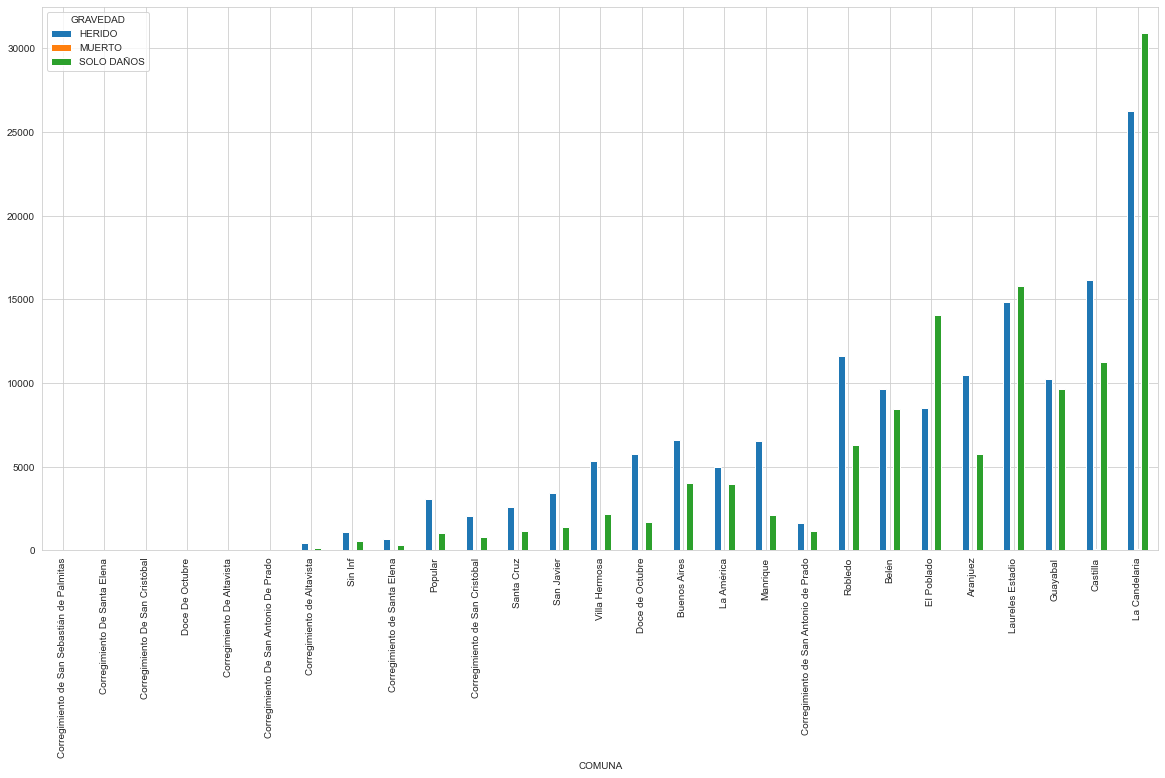

In [59]:
incidentes_gravedad_comuna[['HERIDO','MUERTO','SOLO DAÑOS']].sort_values(by=['MUERTO','HERIDO']).plot.bar()

Debido a que en la grafica anterior no se puede visualizar los incidentes que corresponde a la categría **MUERTO** se decide realizar una gráfica independiente y ver esta información de forma gráfica.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000139818F3E08>],
      dtype=object)

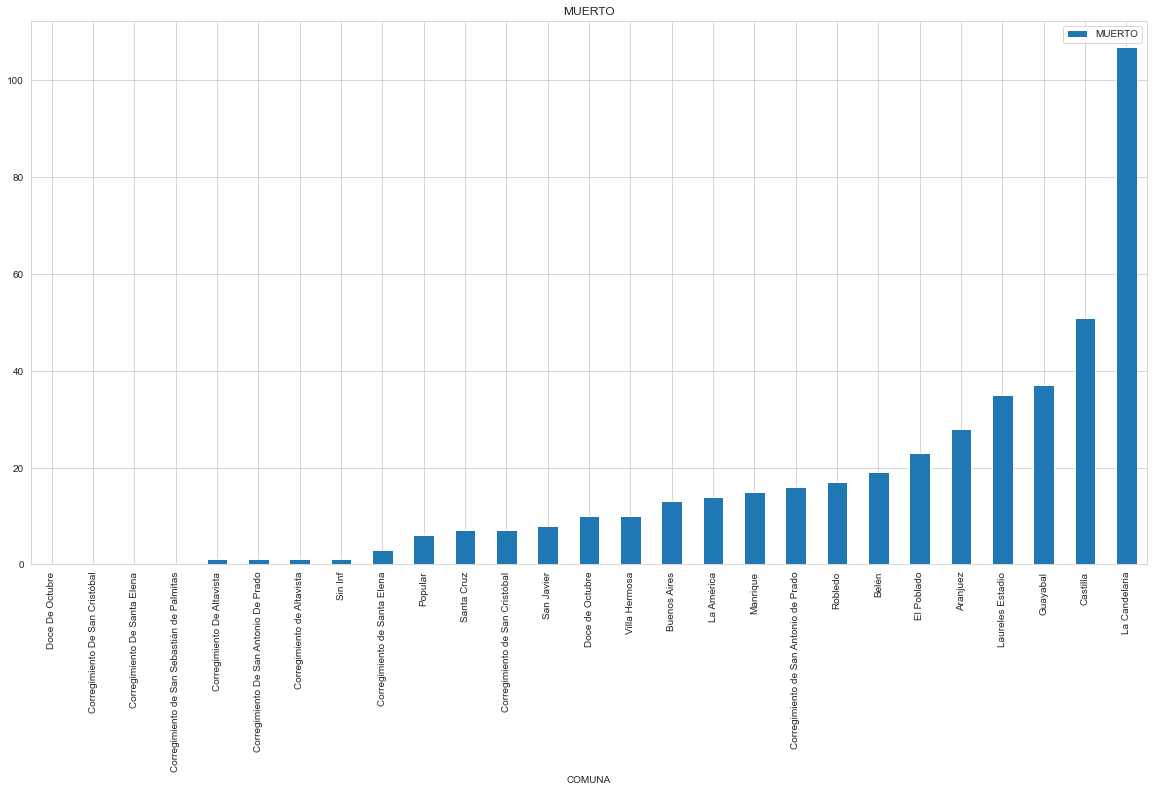

In [60]:
incidentes_gravedad_comuna[['MUERTO']].sort_values(by=['MUERTO']).plot.bar(subplots=True)

#### Columna DISENO

In [61]:
incidentes_diseno = incidentes.pivot_table(index=['PERIODO'], 
                                                   columns=['DISENO'], 
                                                   values='OBJECTID', 
                                                   aggfunc='count', 
                                                   fill_value=0).T

# Anexar nuevas columas calculadas
incidentes_diseno['Total Fila'] = incidentes_diseno.sum(axis=1)
incidentes_diseno['Porcentaje'] = np.round(((incidentes_diseno['Total Fila']\
                                                     / incidentes_diseno['Total Fila'].sum()) * 100),4)


incidentes_diseno\
    .sort_values(by='Total Fila')\
    .style.format('{:,}')\
    .background_gradient(cmap=cm, axis=1, subset=[2014, 2015, 2016,2017,2018,2019,2020])

Se observa que la categoría "**Tramo de via**" es la que más incidentes presenta en todos los años, pero ha disminuido en los últimos años

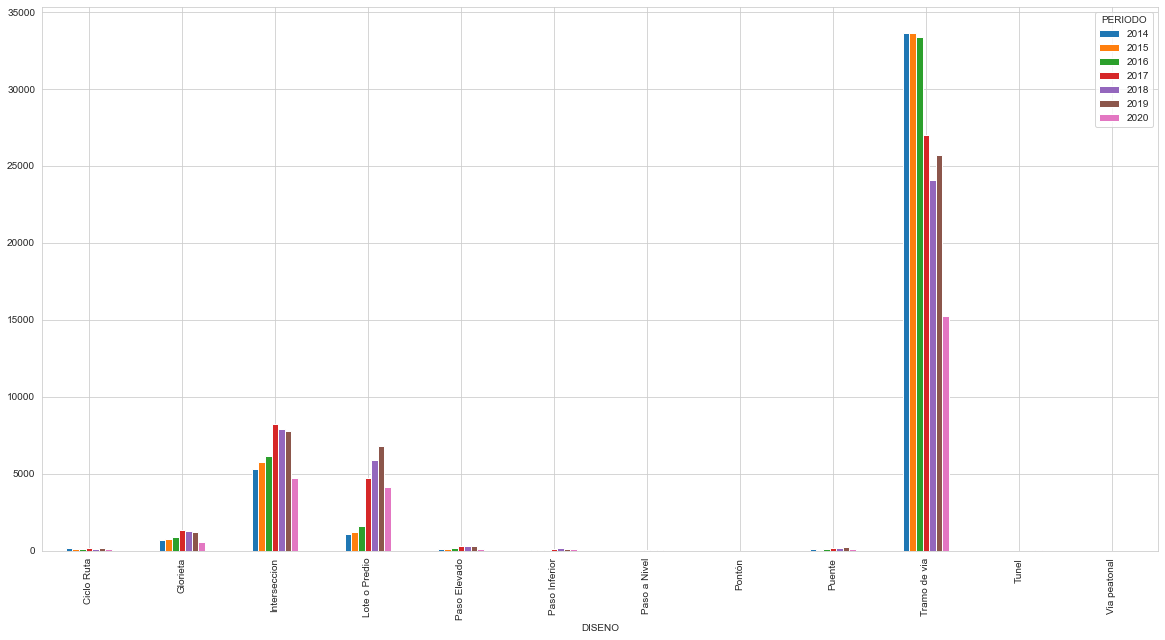

In [62]:
incidentes_diseno[[2014, 2015, 2016,2017,2018,2019,2020]].plot.bar()
# incidentes_diseno[['Total Fila']].plot.area()

#### Columna NOMBRE MES

In [63]:
incidentes_periodo_mes = incidentes.pivot_table(index='PERIODO', 
                       columns=['MES','NOMBRE_MES'], 
                       values='OBJECTID', 
                       aggfunc='count', 
                       fill_value=0).T.sort_index()

# Anexar nuevas columas calculadas
incidentes_periodo_mes['Total Fila'] = incidentes_periodo_mes.sum(axis=1)
incidentes_periodo_mes['Porcentaje'] = np.round(((incidentes_periodo_mes['Total Fila']\
                                                     / incidentes_periodo_mes['Total Fila'].sum()) * 100),4)

# Imprimir el data set con resaltando los valores más altos por fila o categoría x periodo o año
# incidentes_periodo_mes.style.apply(highlight_max,
#                                       subset=[2014, 2015, 2016,2017,2018,2019,2020], 
#                                       axis=0).format('{:,}')\
#                                 .apply(highlight_max,
#                                       subset=['Total Fila'],
#                                       axis=0)

incidentes_periodo_mes\
    .sort_index()\
    .style\
        .format('{:,}')\
        .background_gradient(cmap=cm, axis=0, subset=[2014, 2015, 2016,2017,2018,2019,2020])\
        .apply(highlight_max, subset=['Total Fila'], axis=0)

El resumen anterior podemos extraer lo siguiente:

- El año **2020** no esta completo con los incidentes del mes de **noviembre** y **diciembre**.
- Cual ha sido el mes que ha tenido más incidentes por cada periodo "año".
- Los meses de agosto a octubre, son los meses en que más se presntan incidentes, superando los **3,500** incidentes x mes a excepción del año **2020** y esto último se puede responsabilizar que es debido al tema de la pandemia mundial "**Covid-19**"
- El mes de agosto es el mes con más incidentes, con un porcentaje del **9.04%**.

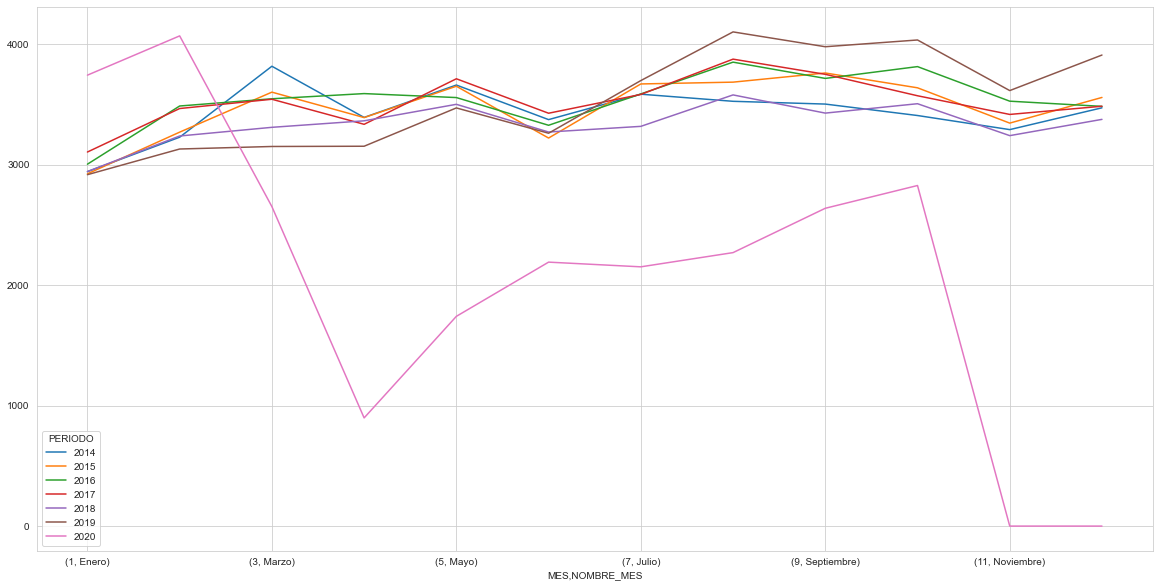

In [64]:
incidentes.pivot_table(index='PERIODO', 
                       columns=['MES','NOMBRE_MES'], 
                       values='OBJECTID', 
                       aggfunc='count', 
                       fill_value=0).T.sort_index().plot.line()

En el anterior gráfico podemos ver:

- La cantidad de **incidentes x cada mes x cada año**, identificando que los años del **2014 al 2019** tienen un comportamiento parecido y con tendecia a crecer.
- Además, se observa que el **3er trimestre** es donde más incidentes se presentan. 
- Ahora, vemos el año **2020** que un año atipico por lo temas de la pandemía del **covid-19**.


Visualizar la cantidad de incidentes por mes y año.

In [65]:
incidentes_mes_periodo = pd.DataFrame(incidentes.groupby(['PERIODO','NOMBRE_MES'])['OBJECTID'].count().rename('Total'))

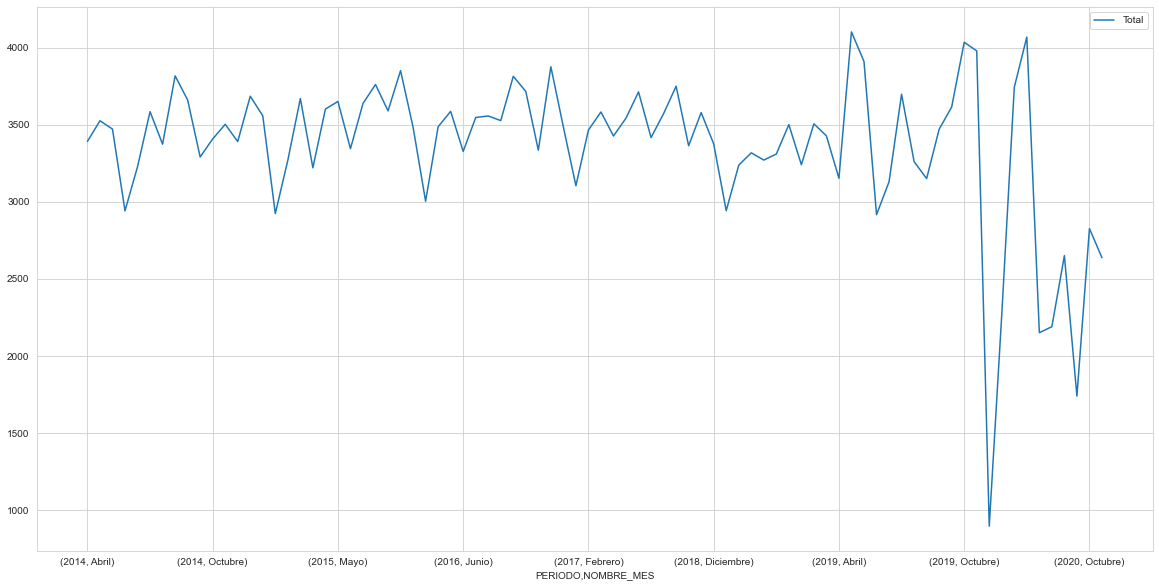

In [66]:
incidentes_mes_periodo.plot()

# Georeferenciar los Incidentes

Debido a la gran catidad de incidentes a georeferenciar en una sola área geografica, la cual es la ciudad de Medellín, se opta por realizar un filtro a la información y mostrar estos pocos registros en el mapa. Ya que si se georeferencia toda la información toma varios minutos terminar el proceso y no es visiblemente claro tal cantidad de marcadores.

Queda a potestad del lector o lectora tomar la información del data set de incidentes y realizar un filtro adecuado a las necesidades y graficar dicho resultado.

## Filtrando los datos
Se decide filtrar la información por la categoría **GRAVEDAD** y su valor igual **MUERTO** para todos los periodos analizados, con el fin de que regresará pocos registros y poder graficarlos en un mapa. Para realizar esto se contruye la siguiente consulta en el data set.

In [67]:
filtro = (incidentes['GRAVEDAD'] == 'MUERTO')
incidentes_gps = pd.DataFrame(incidentes
                              .where(filtro)
                              .groupby(['LONGITUD','LATITUD'])['GRAVEDAD']
                              .count()
                              .rename('Total')
                             )
incidentes_gps.reset_index(inplace=True)

Hallar la media de cada coordenada geografica [LONGITUD, LATITUD], con el fin de que cuando se muestre el mapa y con el zoom adecuado se visualice directamente la ciudad de Medellín.

In [68]:
lat_ini = incidentes_gps['LATITUD'].mean()
lng_ini = incidentes_gps['LONGITUD'].mean()

print(lat_ini,lng_ini)

6.248940226886072 -75.57836880417725


Recorrer la información del set de datos previamente filtrado y generar el mapa.

In [69]:
# Adiccionar los marcadores clusterizados
import folium
from folium.plugins import MarkerCluster
from folium.features import CustomIcon

# Crear el mapaa
mapa_1 = folium.Map(location=[lat_ini,lng_ini], zoom_start=12)

# Recorrer los datos
for i in range(len(incidentes_gps)):
    lat = incidentes_gps.iloc[i]['LATITUD']
    lng = incidentes_gps.iloc[i]['LONGITUD']
    toolTip = "Nro de Incidentes:" + str(incidentes_gps.iloc[i]['Total']) + \
            " - Ubicacion: [" + str(lat) + " " + str(lng) + "]"
                                
    colorIcon = "black" if(incidentes_gps.loc[i]['Total']>1) else "red"

    folium.Marker(location=[lat,lng],tooltip=toolTip, icon=folium.Icon(color=colorIcon, icon='info-sign')).add_to(mapa_1)

# Ver el mapa
mapa_1

En el mapa anterior podemos observar lo siguiente:

- Cada marcador tiene un mensaje que indica el total de incidentes y su posición geografica.
- Los marcadores de color negro indican que en dicha ubicación a habido más de una persona muerta en ese punto.

Ahora graficaremos la misma información filtrada pero de forma agrupada y visualizarla de esta forma en el mapa.

In [70]:
# Crear el mapaa
mapa_2 = folium.Map(location=[lat_ini,lng_ini], zoom_start=12)

mc = MarkerCluster()
for i in range(len(incidentes_gps)):
    lat = incidentes_gps.iloc[i]['LATITUD']
    lng = incidentes_gps.iloc[i]['LONGITUD']
    toolTip = "Nro de Incidentes:" + str(incidentes_gps.iloc[i]['Total']) + \
            " - Ubicacion: [" + str(lat) + " " + str(lng) + "]"
     
    colorIcon = "black" if(incidentes_gps.loc[i]['Total']>1) else "red"
    
    mc.add_child(folium.Marker(location=[lat,lng],tooltip=toolTip, icon=folium.Icon(color=colorIcon, icon='info-sign')))
    mapa_2.add_child(mc)
# Ver el mapa
mapa_2

En el mapa anterior podemos observar lo siguiente:

- Las áreas de la ciudad en las que se han presentado incidentes y a habido almenos un muerto. Esto se puede observar al colocar el apuntador (mouse) sobre el marcador que agrupa la cantidad de incidentes, mostrando el área que cubre dicha cantidad.
- Los marcadores de color negro indican que en dicha ubicación a habido más de una persona muerta en ese punto.

**Nota sobre los datos graficados geograficamente en los dos mapas anteriores:**

- Existe una cantidad de registros fuera del área geografica de la ciudad de Medellín, lo que indica que al momento de registrar esta información fue mal registrada. Ya que aparecen registros en el municipio de **Heliconia** y **Támisis**.

Hemos fianlizado esta sección de análisis descriptivo y vamos a eliminar toda la memoría del **Jupyter Notebook** e iniciamos una nueva sección. Esto eliminará todas las variables utilizadas hasta ahora.

In [71]:
# borrar todas las variables en IPython - Sin confirmación del usuario
%reset -f 

********

## Visualización de Datos de Series de Tiempo

In [72]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (20,10)
import seaborn as sns

pathData = "D:\MedData\Incidentes georreferenciados\Incidentes_georreferenciados_"
extension = ".csv"

columnas = ['FECHA','HORA','PERIODO','MES','DIA','CLASE','GRAVEDAD','COMUNA','DISENO','DIA_NOMBRE','MES','LONGITUD','LATITUD']

Abrir el set de datos depurado y generado en la sección análisis de datos.

In [73]:
incidentes = pd.read_csv(pathData + "all" + extension, parse_dates=['FECHA','Fecha_Hora'], index_col=['Fecha_Hora'])
incidentes

Unnamed: 0  OBJECTID      FECHA      HORA  DIA  PERIODO  \
Fecha_Hora                                                                     
2014-01-01 02:20:00           0    211279 2014-01-01  02:20:00    1     2014   
2014-01-01 12:50:00           1    211280 2014-01-01  12:50:00    1     2014   
2014-01-01 01:00:00           2    211281 2014-01-01  01:00:00    1     2014   
2014-01-01 12:37:00           3    211282 2014-01-01  12:37:00    1     2014   
2014-01-01 10:40:00           4    211283 2014-01-01  10:40:00    1     2014   
...                         ...       ...        ...       ...  ...      ...   
2020-03-02 06:50:00       25374    815518 2020-03-02  06:50:00    2     2020   
2020-01-15 07:00:00       25375    815519 2020-01-15  07:00:00   15     2020   
2020-01-18 04:30:00       25376    815520 2020-01-18  04:30:00   18     2020   
2020-06-26 03:56:00       25377    815521 2020-06-26  03:56:00   26     2020   
2020-07-10 01:10:00       25378    815522 2020-07-10  01:10:00   10     2020   

                                 CLASE    GRAVEDAD            COMUNA  \
Fecha_Hora                                                             
2014-01-01 02:20:00             Choque      HERIDO             Belén   
2014-01-01 12:50:00          Atropello      HERIDO     La Candelaria   
2014-01-01 01:00:00          Atropello      HERIDO          Manrique   
2014-01-01 12:37:00          Atropello      HERIDO             Belén   
2014-01-01 10:40:00  Caída de Ocupante      HERIDO   Doce de Octubre   
...                                ...         ...               ...   
2020-03-02 06:50:00          Atropello      HERIDO           Popular   
2020-01-15 07:00:00             Choque  SOLO DAÑOS  Laureles Estadio   
2020-01-18 04:30:00             Choque      HERIDO             Belén   
2020-06-26 03:56:00          Atropello      MUERTO     La Candelaria   
2020-07-10 01:10:00             Choque  SOLO DAÑOS     La Candelaria   

                            DISENO DIA_NOMBRE  MES   LONGITUD   LATITUD  \
Fecha_Hora                                                                
2014-01-01 02:20:00   Tramo de via  MIÉRCOLES    1 -75.602726  6.219016   
2014-01-01 12:50:00   Tramo de via  MIÉRCOLES    1 -75.568185  6.260009   
2014-01-01 01:00:00   Tramo de via  MIÉRCOLES    1 -75.549943  6.264765   
2014-01-01 12:37:00   Tramo de via  MIÉRCOLES    1 -75.607611  6.234327   
2014-01-01 10:40:00   Tramo de via  MIÉRCOLES    1 -75.579685  6.299968   
...                            ...        ...  ...        ...       ...   
2020-03-02 06:50:00  Lote o Predio  LUNES        3 -75.550848  6.288293   
2020-01-15 07:00:00   Interseccion  MIÉRCOLES    1 -75.587973  6.254189   
2020-01-18 04:30:00   Tramo de via  SÁBADO       1 -75.576866  6.232463   
2020-06-26 03:56:00   Tramo de via  VIERNES      6 -75.568822  6.257265   
2020-07-10 01:10:00   Interseccion  VIERNES      7 -75.572551  6.245209   

                    NOMBRE_MES  
Fecha_Hora                      
2014-01-01 02:20:00      Enero  
2014-01-01 12:50:00      Enero  
2014-01-01 01:00:00      Enero  
2014-01-01 12:37:00      Enero  
2014-01-01 10:40:00      Enero  
...                        ...  
2020-03-02 06:50:00      Marzo  
2020-01-15 07:00:00      Enero  
2020-01-18 04:30:00      Enero  
2020-06-26 03:56:00      Junio  
2020-07-10 01:10:00      Julio  

[275356 rows x 15 columns]

##### Información sobre la serie

Al visualizar la información de la página de [MedData](http://medata.gov.co/dataset/incidentes-viales-georreferenciada-2014) se puede observar que en su pestaña [datos](https://geomedellin-m-medellin.opendata.arcgis.com/datasets/incidentes-georreferenciados-2014/data) el campo **HORA** muestra si el incidente fue de mañana o tarde (AM o PM), pero al descargar el data set completo dicho dato, no especifica con claridad la **HORA**, si el incidente se presento en el horario AM o PM.

Sabiendo lo anterior, se envió un correo electronico al responsable de la página y pronto respondío, diciendo que estan escalando el caso e informaran cuando tengan una respuesta.

A pesar de esto se continuará con el análsis de series de tiempo de los incidentes que tenemos en nuestro data set.

Se trabajará con la cantidad de incidentes por día. lo que nos lleva a realizar la siguiente revisión:


Estamos análizando 7 periodos o años [del 2014 al 2020], lo que significa que debemos tener el acumulado de incidentes por cada día durante todos los periodos, siendo un total de $7 * 365 = 2,555$ días para tener la serie de tiempo completa por día.

Entonces agruparemos la información por la columna **FECHA** y contamos cada incidente presentado cada día y extraemos la cantiad de filas, lo que corresponde a la cantidad de días con datos que tiene el data set.

In [74]:
incidentes[['OBJECTID','FECHA']].groupby('FECHA').count().shape[0]

2496

Si miramos la diferencia entre ambos datos $2,555 - 2,496 = 59$ días faltantes, que corresponden a los que vimos como ausentes en la sección anterior cuando hicimos el análisis categorico del campo **NOMBRE_MES** y se observo, que los datos del mes de **noviembre** y **diciembre** del año **2020** no estan registrados en su respectivo repositorio. Y lo podemos verificar con la siguiente consulta al set de datos.

In [75]:
incidentes[incidentes['FECHA']>'2020-10-31']

Empty DataFrame
Columns: [Unnamed: 0, OBJECTID, FECHA, HORA, DIA, PERIODO, CLASE, GRAVEDAD, COMUNA, DISENO, DIA_NOMBRE, MES, LONGITUD, LATITUD, NOMBRE_MES]
Index: []

Ahora, podemos hacer dos cosas y es:

- La 1ra, es anexar los dos meses faltantes.
- La 2da, es trabajar con el data set tal cual como esta hoy.

Si optamos por la 1ra, deberiamos crear un data set independiente con la frecuencia a trabajar la serie de tiempo, siendo asi debemos obtener un data set con todo el rango de datos (todos los días de los 7 años) y unir este con el set de datos de incidentes que tenemos. Con el fin de que cuando se grafique la serie de tiempo se muestre con precisión los vacios de datos y los componentes de la serie de tiempo se puedan visualizar de forma correcta.

Si optamos por la 2da, no habrá que hacer lo anteriormente descripto, ya que los datos que faltan son dos meses completos y al final de serie de tiempo, se tomará hasta donde existe información que es hasta octubre 31 del 2020.

Para continuar con el análisis, se seleccionará la 2da opción. :-)


A continuación se crearan varios **data set** para diferentes frecuencias de tiempo como [**minuto**, **hora**, **día**, **mes**, **trimestre**, **año**] de los incidentes de transito que tenemos a dispoición.

In [76]:
incidentes_min = pd.DataFrame(incidentes.resample('T')['OBJECTID'].count())
incidentes_hou = pd.DataFrame(incidentes.resample('H')['OBJECTID'].count())
incidentes_day = pd.DataFrame(incidentes.resample('D')['OBJECTID'].count())
incidentes_mon = pd.DataFrame(incidentes.resample('M')['OBJECTID'].count())
incidentes_tri = pd.DataFrame(incidentes.resample('Q')['OBJECTID'].count())
incidentes_yea = pd.DataFrame(incidentes.resample('A')['OBJECTID'].count())

Crear función para imprimir el grafico según periodo de tiempo enviado como parámetro

In [77]:
def graph_data_one_serie(S1,PT,PS1):
    fig, ax = plt.subplots()
    fig.suptitle('Cantidad de Incidentes Automovilísticos en la Ciudad de Medellín\nPeriodo: del año 2014 hasta el año 2020\nFrecuencia de tiempo en: %s' % (PT), fontsize=20)
    ax.set_ylabel('Cantidad de Incidentes Automovilísticos x ' + PS1)
    ax.set_xlabel(PS1 + ' en el que se Presento el Incidente')

    ax.plot(S1, label='Cantidad de Incidentes Automovilísticos x ' + PS1)
#     ax.plot(S2, label='Promedio de Incidentes Automovilísticos x ' + PS2)

    legend = ax.legend(loc='upper left', shadow=True, fontsize='x-large')
    plt.ylim=(0,400)
    plt.grid()
    plt.show()
    
def graph_data_two_series(S1,S2,PT,PS1,PS2):
    fig, ax = plt.subplots()
    fig.suptitle('Cantidad de Incidentes Automovilísticos en la Ciudad de Medellín\nPeriodo: del año 2014 hasta el año 2020\nFrecuencia de tiempo en: %s' % (PT), fontsize=20)
    ax.set_ylabel('Cantidad de Incidentes Automovilísticos x ' + PS1)
    ax.set_xlabel(PS1 + ' en el que se Presento el Incidente')

    ax.plot(S1, label='Cantidad de Incidentes Automovilísticos x ' + PS1)
    ax.plot(S2, label='Promedio de Incidentes Automovilísticos x ' + PS2)

    legend = ax.legend(loc='upper left', shadow=True, fontsize='x-large')
    plt.ylim=(0,400)
    plt.grid()
    plt.show()

#### Ahora vamos ver graficamente cada uno de estos set de datos

Por lo general, los gráficos de líneas son la mejor opción para presentar datos de series temporales, pero los gráficos escalonados y de columnas también se pueden usar como alternativas.

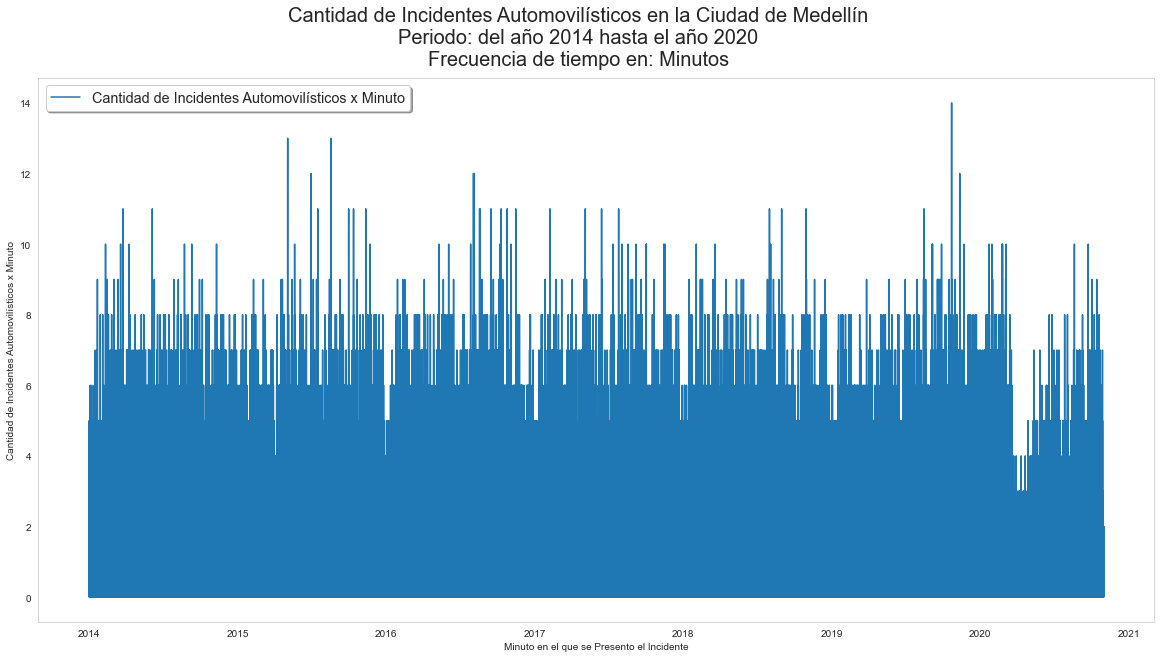

In [78]:
graph_data_one_serie(incidentes_min.OBJECTID,'Minutos','Minuto')

Vemos que dicho grafico no es legible, para ver un grafico más claro en sus datos, haremos un filtro y tomaremos información de un solo día en particular.

In [79]:
fecha_hora_inicial = '2014-05-09 00:00:00'
fecha_hora_final = '2014-05-09 23:59:59'

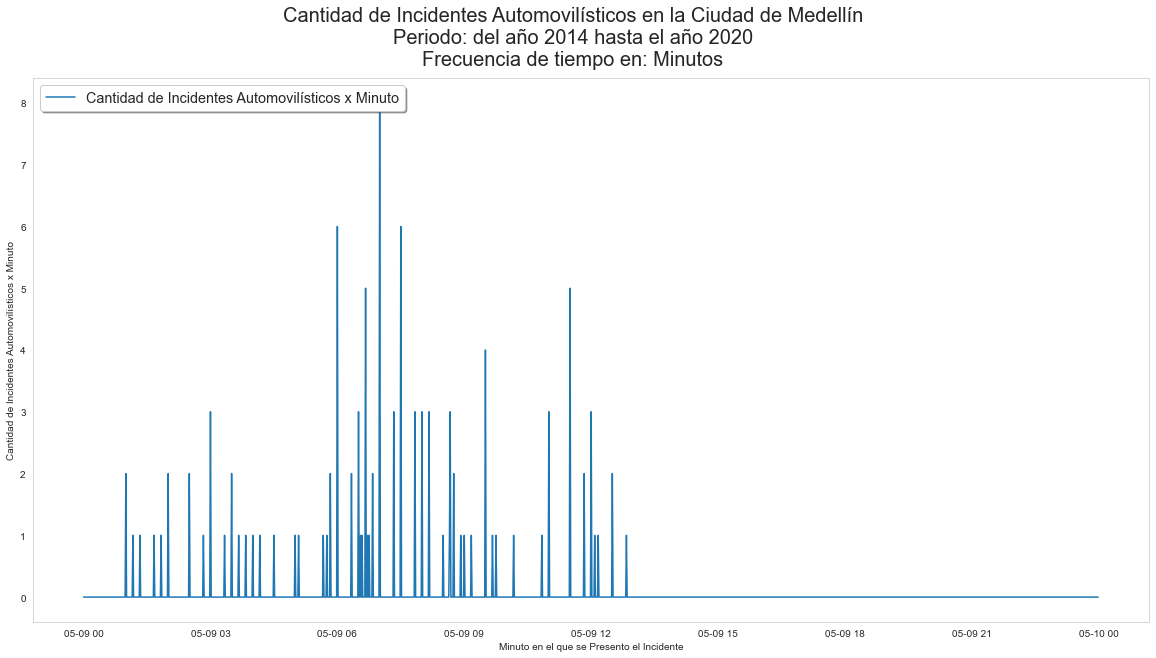

In [80]:
graph_data_one_serie(incidentes_min.loc[fecha_hora_inicial:fecha_hora_final].OBJECTID,'Minutos','Minuto')

En el gráifco anterior se puede observar la problematica que tenemos al no tener claro si el incidente se presento en hora de AM o PM. Ahora ajustaremos la hora y poder visualizar un poco mejor el gráfico para las horas de la mañana, sabiendo que acá esta acumulado todos los incidentes ocurridos durante el día escogido aleatoriamente.

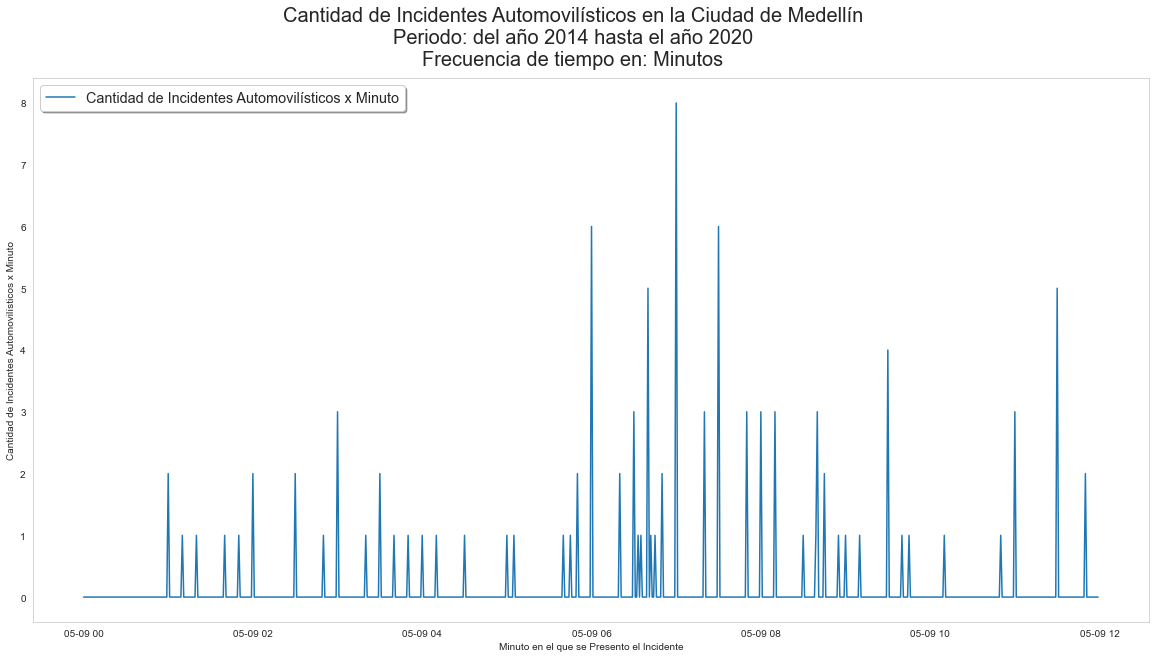

In [81]:
fecha_hora_final = '2014-05-09 11:59:59'
graph_data_one_serie(incidentes_min.loc[fecha_hora_inicial:fecha_hora_final].OBJECTID,'Minutos','Minuto')

Vemos que este grafico de un solo día, la mayoría de incidentes se presentan entre las 6 y 8 horas, lo que podemos decir que son las horas pico de la ciudad Medellín, que corresponde entre la las hora 6 y 8 horas y las 18 y 20 horas.

Ahora, vamos a gráficar los datos por la frecuencia HORA.

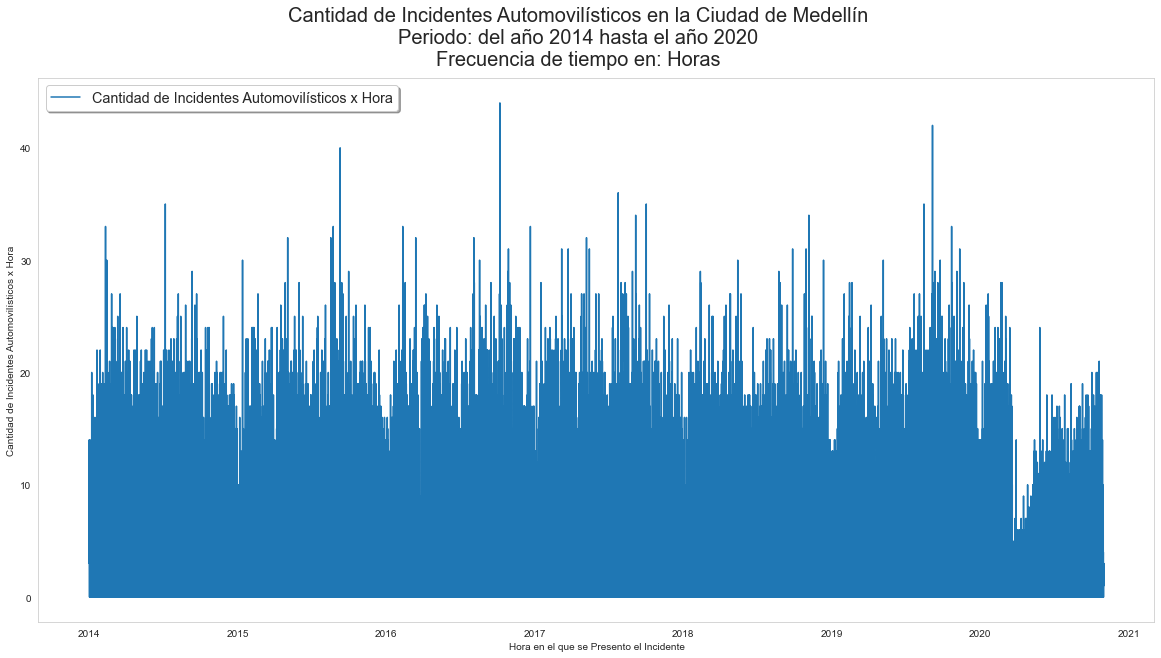

In [82]:
graph_data_one_serie(incidentes_hou.OBJECTID,'Horas','Hora')

El gráfico anterior corresponde a la cantidad de incidentes por hora, lo que da como resultado lo mismo que vimos del gráfico de minutos, un gráfico muy denso de datos debido a la frecuencia seleccionada y la cantidad de incidentes registrados, por lo que pasaremos a graficar solo un porción de tiempo cualquiera.

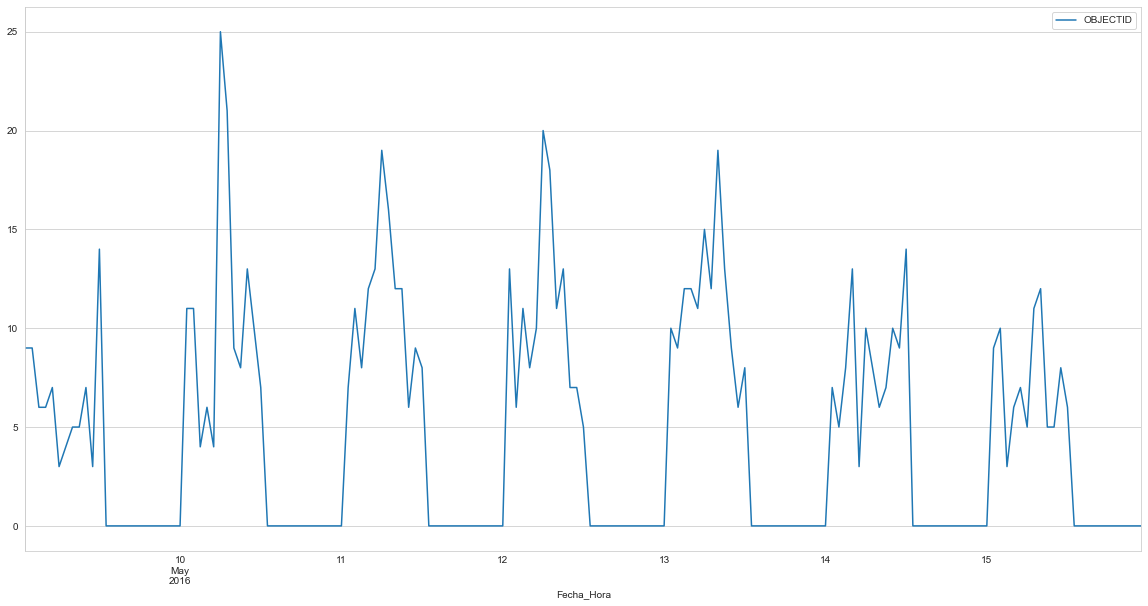

In [83]:
incidentes_hou.loc["2016-05-09 00:00:01":"2016-05-15 23:59:59"].plot(grid=True)

En grafico anterior se muestra la información de una semana de incidentes, en la que observa la ausencia de datos en las horas de la tarde PM, razón que ya fue explicada previamente. Dicho esto y sabiendo que la información de todo el día esta acumulada, podemos decir que para esta semana existe un patron, al menos para los dias 11 al 13 que tienen casi la misma cantidad de incidentes.

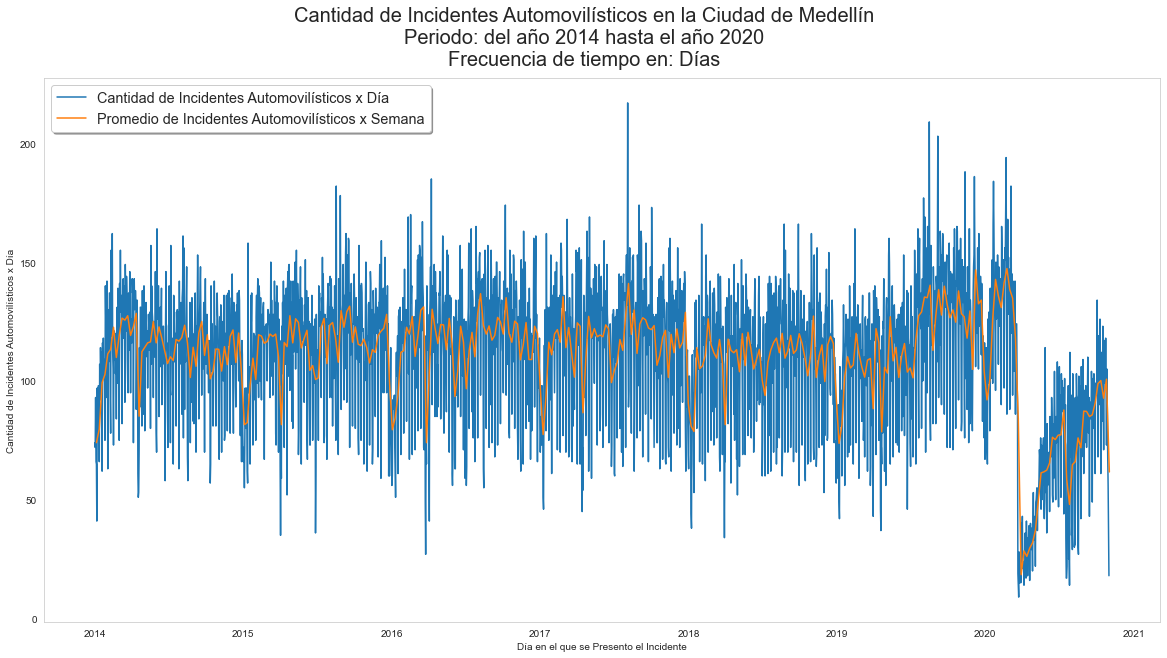

In [84]:
graph_data_two_series(incidentes_day.OBJECTID,incidentes_day.resample('W').mean(),'Días','Día','Semana')

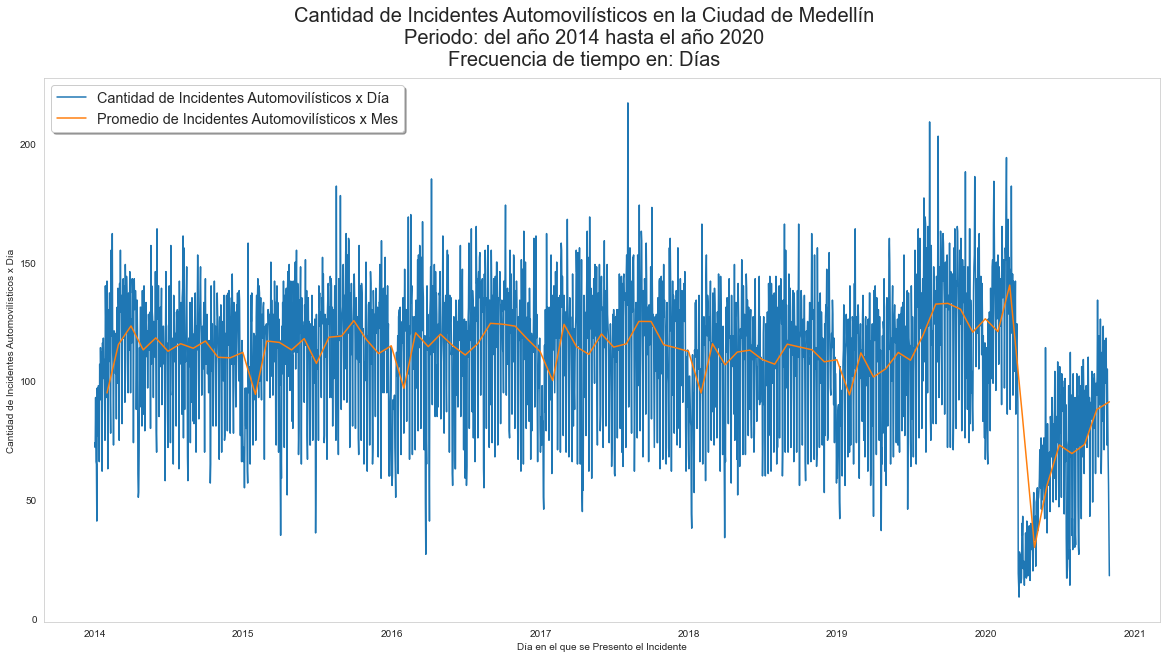

In [85]:
graph_data_two_series(incidentes_day.OBJECTID,incidentes_day.resample('M').mean(),'Días','Día','Mes')

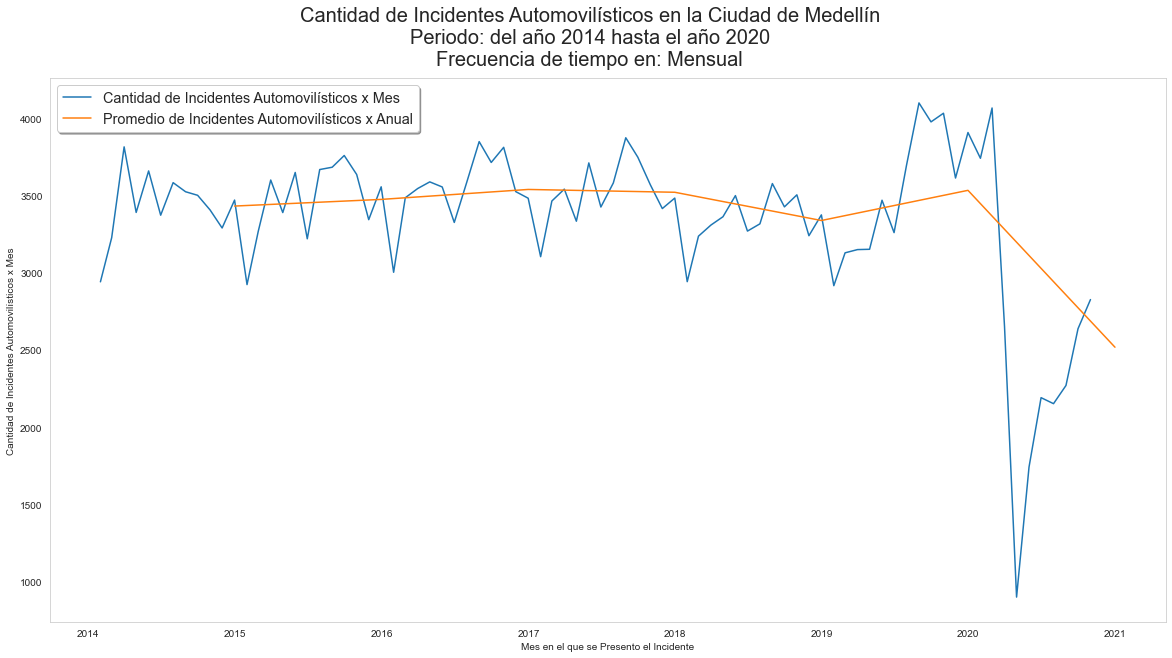

In [86]:
graph_data_two_series(incidentes_mon.OBJECTID,incidentes_mon.resample('A').mean(),'Mensual','Mes','Anual')

Ahora graficaremos la cantidad de incidentes de transito acumualdos por cada mes y con ello observar su distribución.

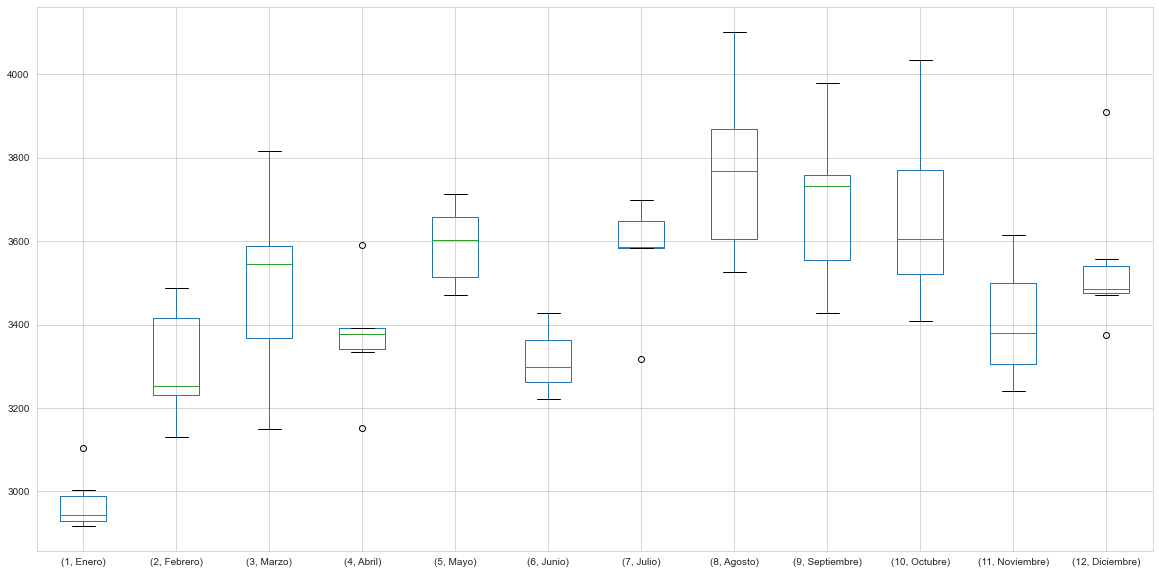

In [87]:
incidente_x_mes_año = incidentes.pivot_table(index=['MES','NOMBRE_MES'], 
                       columns=['PERIODO'], 
                       values='OBJECTID', 
                       aggfunc='count', 
                       fill_value=0).T.sort_index()
incidente_x_mes_año.loc[2014:2019].plot.box(grid=True)

En la grafica anterior se excluye la información del año **2020**, por ser un año atipico y poder analizar los datos con grupo de datos más homogeneos. Diciendo esto, podemos observar que el **mes** que más incidentes acumulados tiene y su mediana, es el mes de **Agosto**. Podemos decir que esto se debe a que la ciudad celebra **La Feria de las Flores**. Igualmente observamos que el mes de **Enero** es el más bajo en incidentes acumulados, esto es debido a la **temporada de vacaciones**, periodo en que la ciudad se ve muy desocupada en sus primeros 15 días.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000013981D044C8>,
      dtype=object)

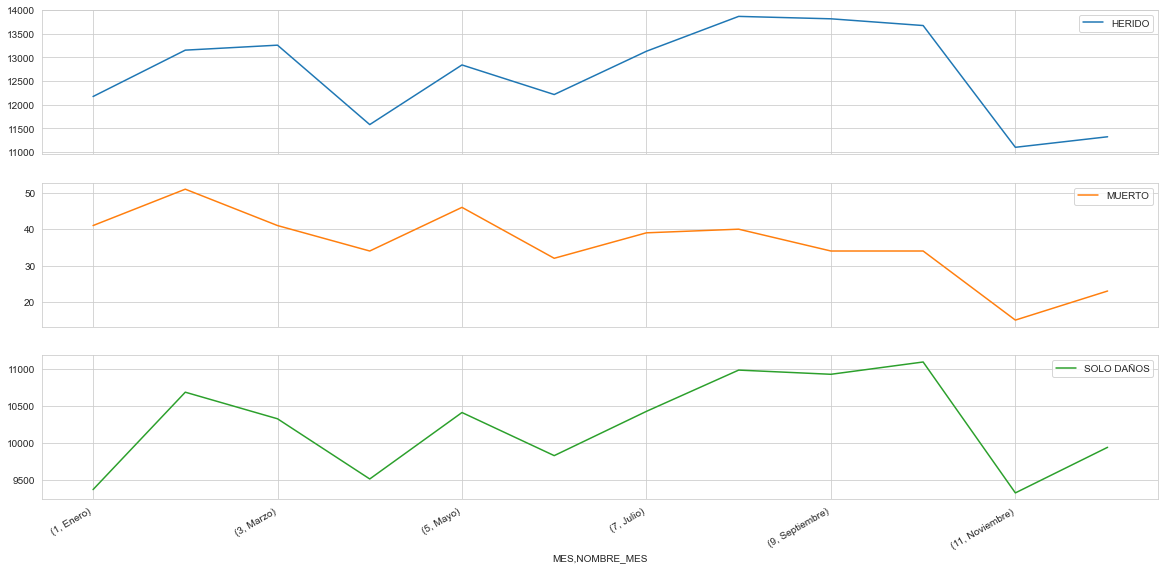

In [88]:
incidente_x_mes_gravedad = incidentes.pivot_table(index=['MES','NOMBRE_MES'], 
                       columns=['GRAVEDAD'], 
                       values='OBJECTID', 
                       aggfunc='count', 
                       fill_value=0).sort_index()
incidente_x_mes_gravedad.plot(subplots=True)

HERIDO           AxesSubplot(0.125,0.125;0.227941x0.755)
MUERTO        AxesSubplot(0.398529,0.125;0.227941x0.755)
SOLO DAÑOS    AxesSubplot(0.672059,0.125;0.227941x0.755)
dtype: object

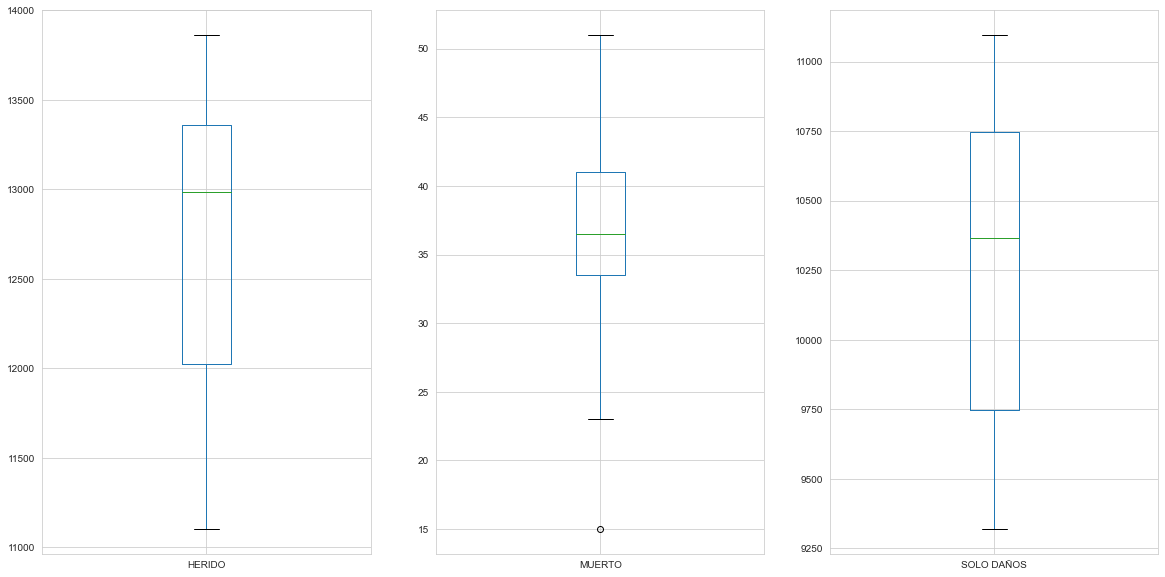

In [89]:
incidente_x_mes_gravedad.plot.box(subplots=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000013981F9F3C8>,
      dtype=object)

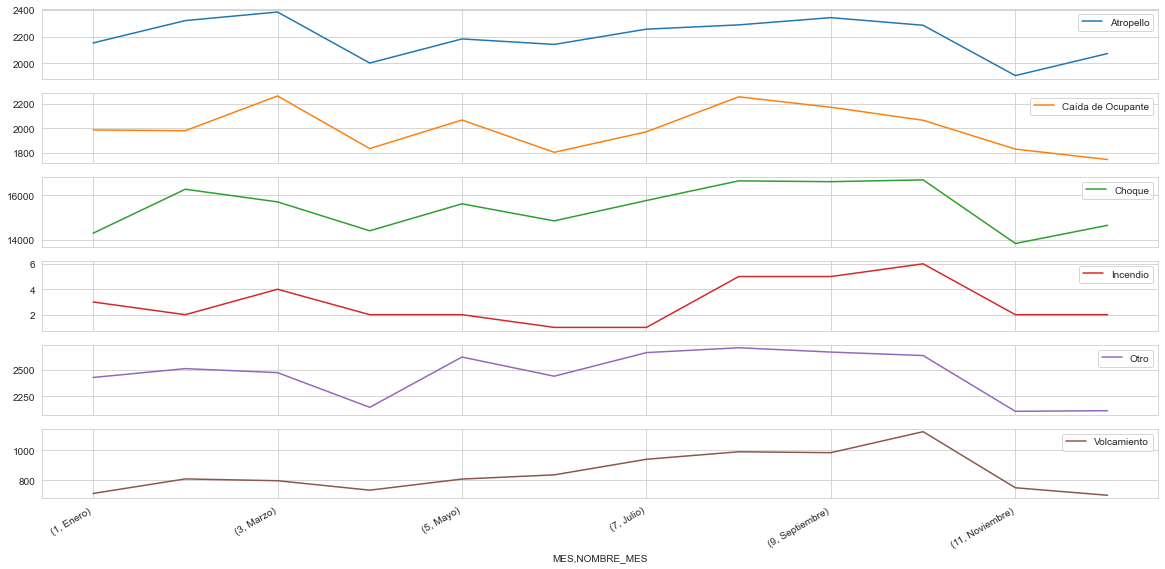

In [90]:
incidente_x_mes_clase = incidentes.pivot_table(index=['MES','NOMBRE_MES'], 
                       columns=['CLASE'], 
                       values='OBJECTID', 
                       aggfunc='count', 
                       fill_value=0).sort_index()
incidente_x_mes_clase.plot(subplots=True)

Atropello               AxesSubplot(0.125,0.125;0.110714x0.755)
Caída de Ocupante    AxesSubplot(0.257857,0.125;0.110714x0.755)
Choque               AxesSubplot(0.390714,0.125;0.110714x0.755)
Incendio             AxesSubplot(0.523571,0.125;0.110714x0.755)
Otro                 AxesSubplot(0.656429,0.125;0.110714x0.755)
Volcamiento          AxesSubplot(0.789286,0.125;0.110714x0.755)
dtype: object

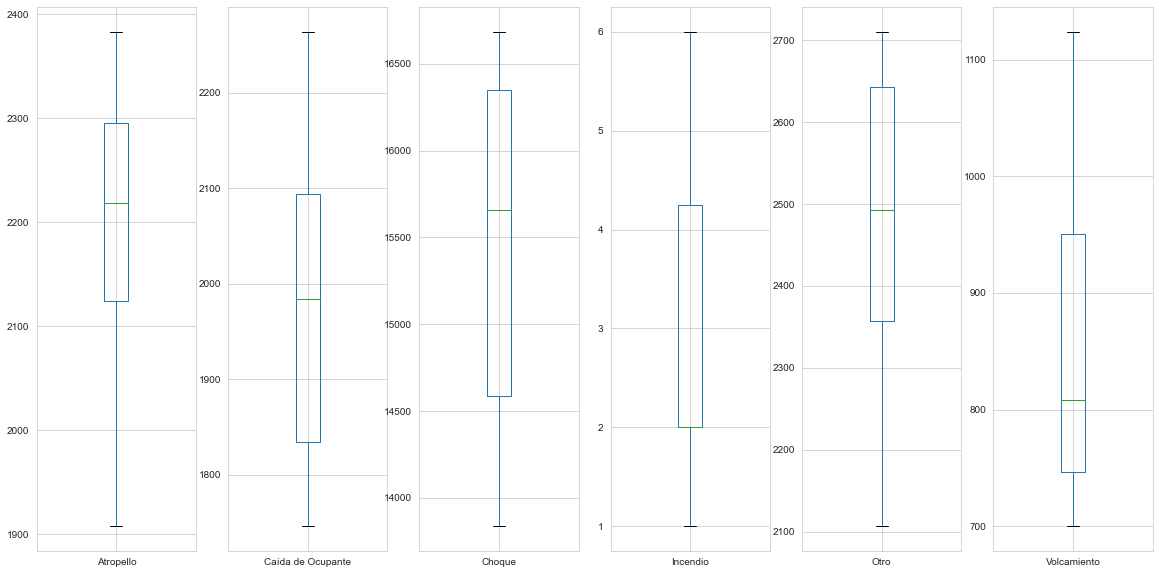

In [91]:
incidente_x_mes_clase.plot.box(subplots=True)

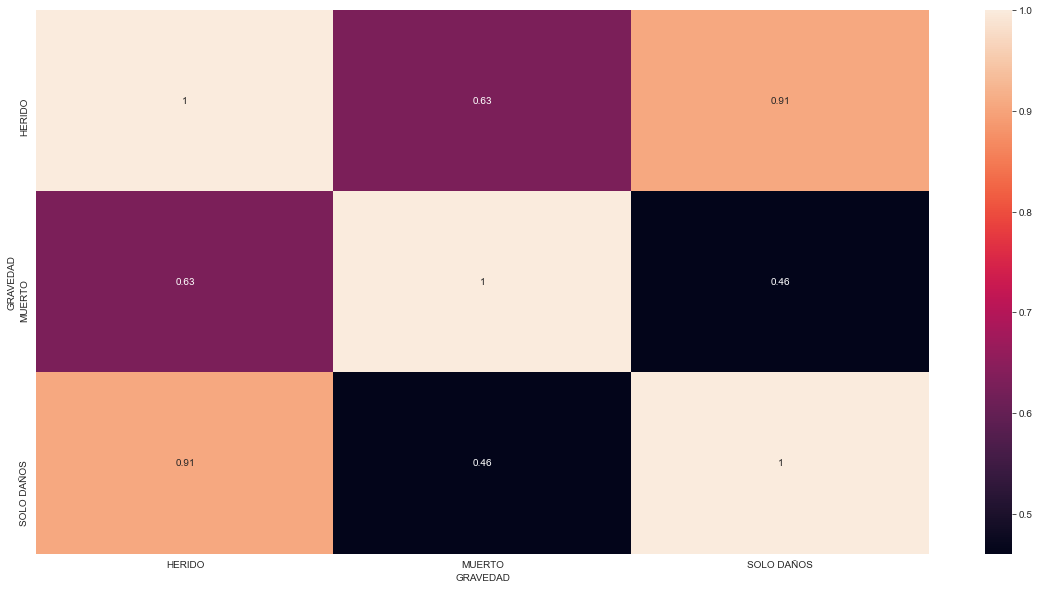

In [92]:
# https://likegeeks.com/es/matrix-correlacion-python/
incidente_x_mes_graveda_corr = incidente_x_mes_gravedad.corr()
sns.heatmap(incidente_x_mes_graveda_corr, annot = True)
plt.show()

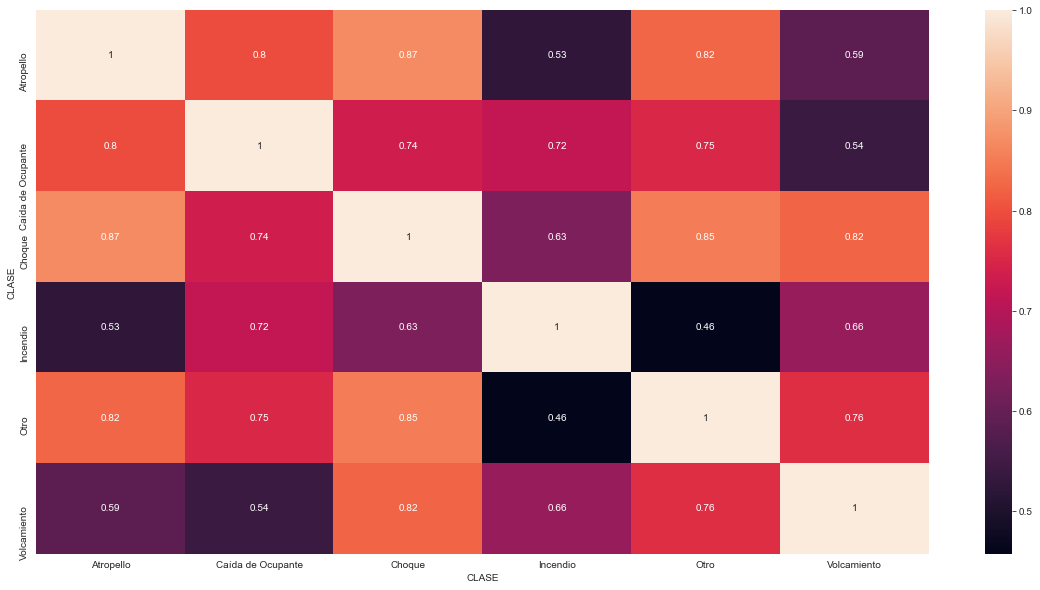

In [93]:
incidente_x_mes_clase_corr = incidente_x_mes_clase.corr()
sns.heatmap(incidente_x_mes_clase_corr, annot = True)
plt.show()

In [94]:
incidente_x_mes_clase_corr.unstack()

CLASE              CLASE            
Atropello          Atropello            1.000000
                   Caída de Ocupante    0.797653
                   Choque               0.869442
                   Incendio             0.526704
                   Otro                 0.824958
                   Volcamiento          0.586985
Caída de Ocupante  Atropello            0.797653
                   Caída de Ocupante    1.000000
                   Choque               0.735416
                   Incendio             0.716963
                   Otro                 0.753370
                   Volcamiento          0.541485
Choque             Atropello            0.869442
                   Caída de Ocupante    0.735416
                   Choque               1.000000
                   Incendio             0.629866
                   Otro                 0.852020
                   Volcamiento          0.822600
Incendio           Atropello            0.526704
                   Caída de Ocup

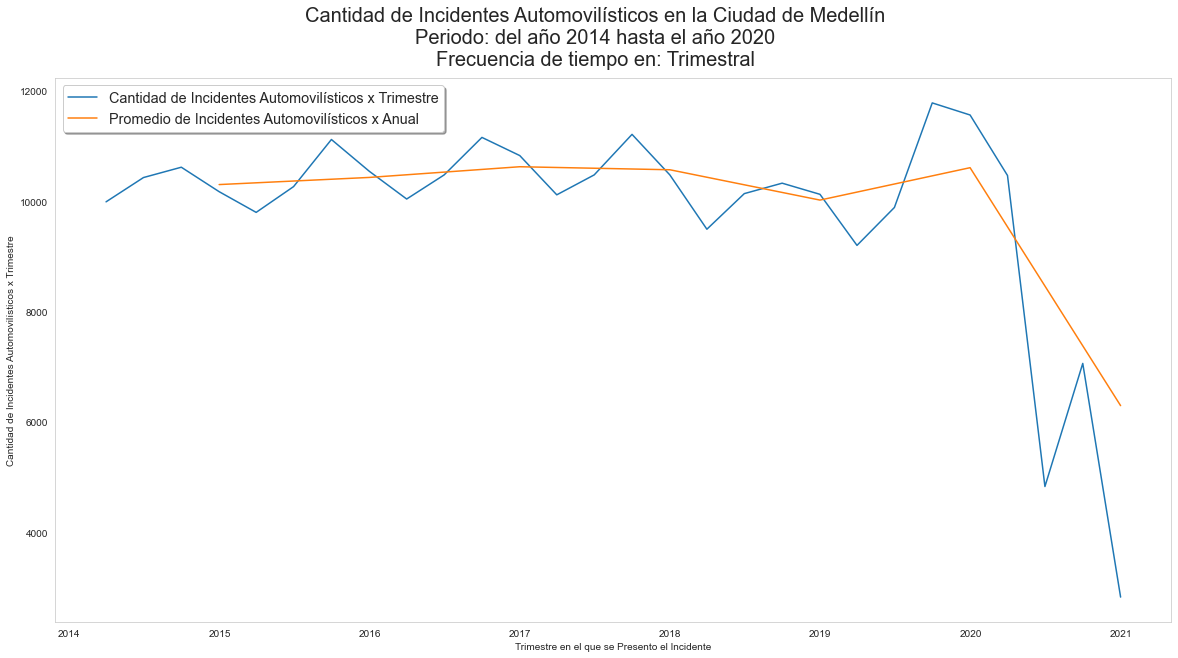

In [95]:
# graph_data_one_serie(incidentes_tri,'Trimestral','Trimestre')
graph_data_two_series(incidentes_tri.OBJECTID,incidentes_tri.resample('A').mean(),'Trimestral','Trimestre','Anual')

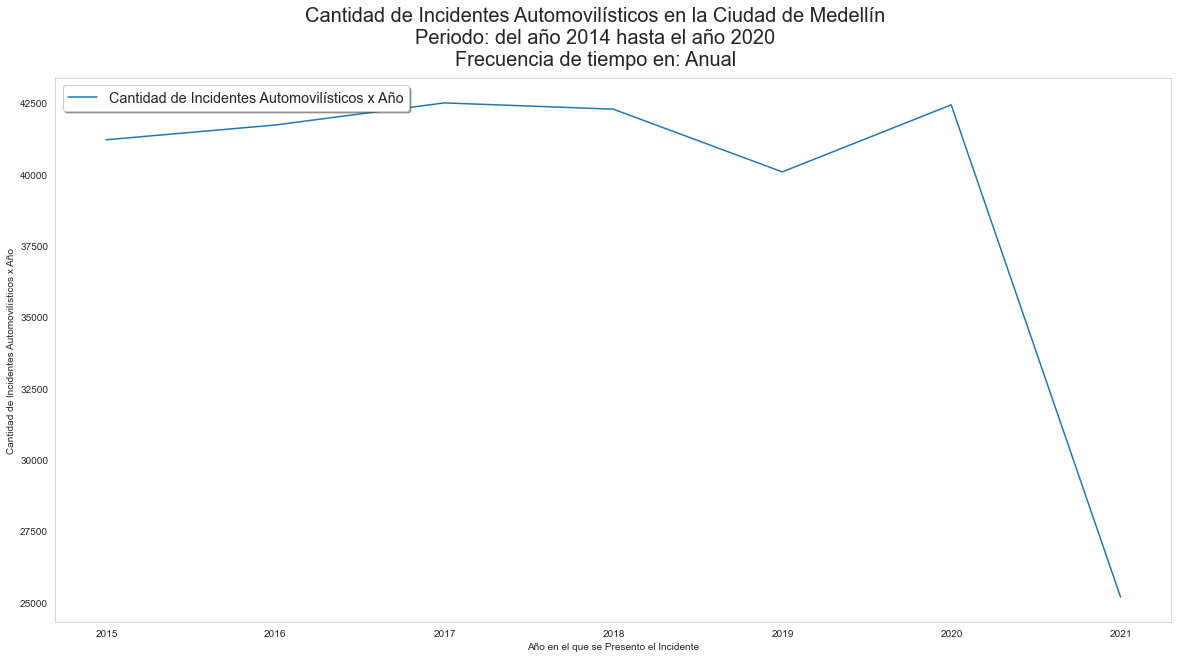

In [96]:
graph_data_one_serie(incidentes_yea,'Anual','Año')

### Graficar los datos correspondientes a categorías

#### Columna GRAVEDAD

In [97]:
incidentes_gravedad = incidentes.pivot_table(index='GRAVEDAD', 
                       columns=['FECHA'], 
                       values='OBJECTID', 
                       aggfunc='count', 
                       fill_value=0).T.sort_index()

Graficcar las catergorias de forma independiente, ya que cada una tiene una escala de valores diferente en el tiempo y poder ver estas como es su distribución .

In [98]:
# https://unipython.com/analisis-de-series-temporales-con-la-libreria-pandas/
def plot_data(data, columnas=[], subplots=True, title='', lx='', ly=''):
    ejes = data[columnas].plot(marker='.', 
                              alpha=0.5, 
                              linestyle='None',
                              figsize=(20,15),
                              subplots=subplots, 
                              title= title, 
                              fontsize=12
                             )
    for eje in ejes:
        eje.set_ylabel(ly)
        eje.set_xlabel(lx)

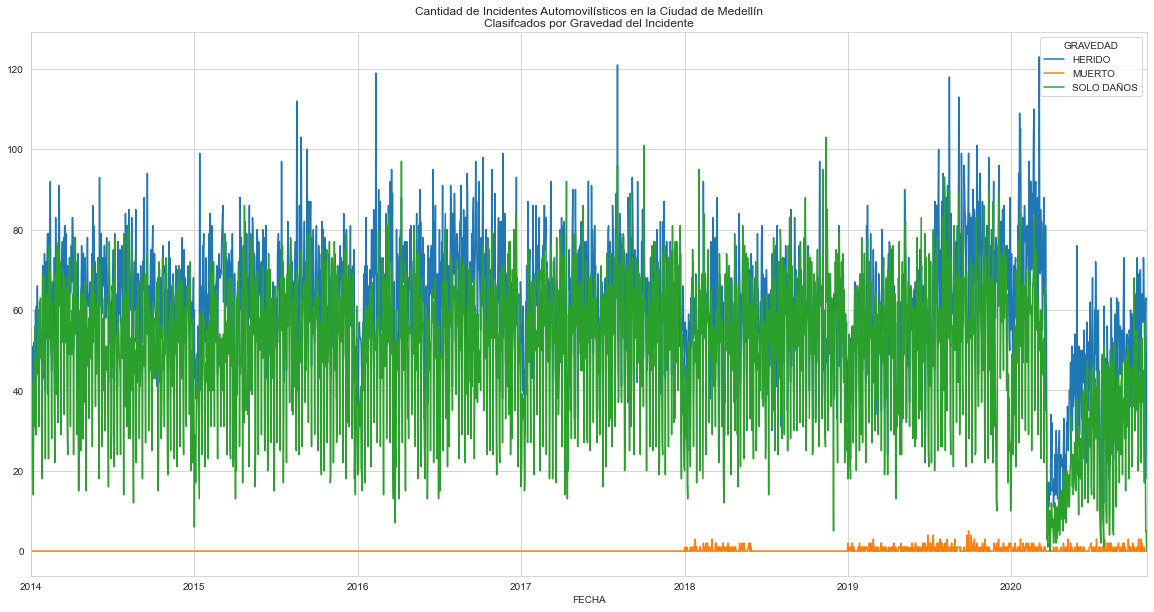

In [99]:
incidentes_gravedad.plot(
    title='Cantidad de Incidentes Automovilísticos en la Ciudad de Medellín\nClasifcados por Gravedad del Incidente')

En la grafica anterior podemos ver que las categorias **HERIDO** y **SOLO DAÑOS** tienen una ditribución muy similar. Corroborando graficamente lo que hablamos aneteriormente, de que por cada **2** incidentes de transito habrá **1** herido en dicho evento. y en menor medida esta la categoría **SOLO DAÑOS**.

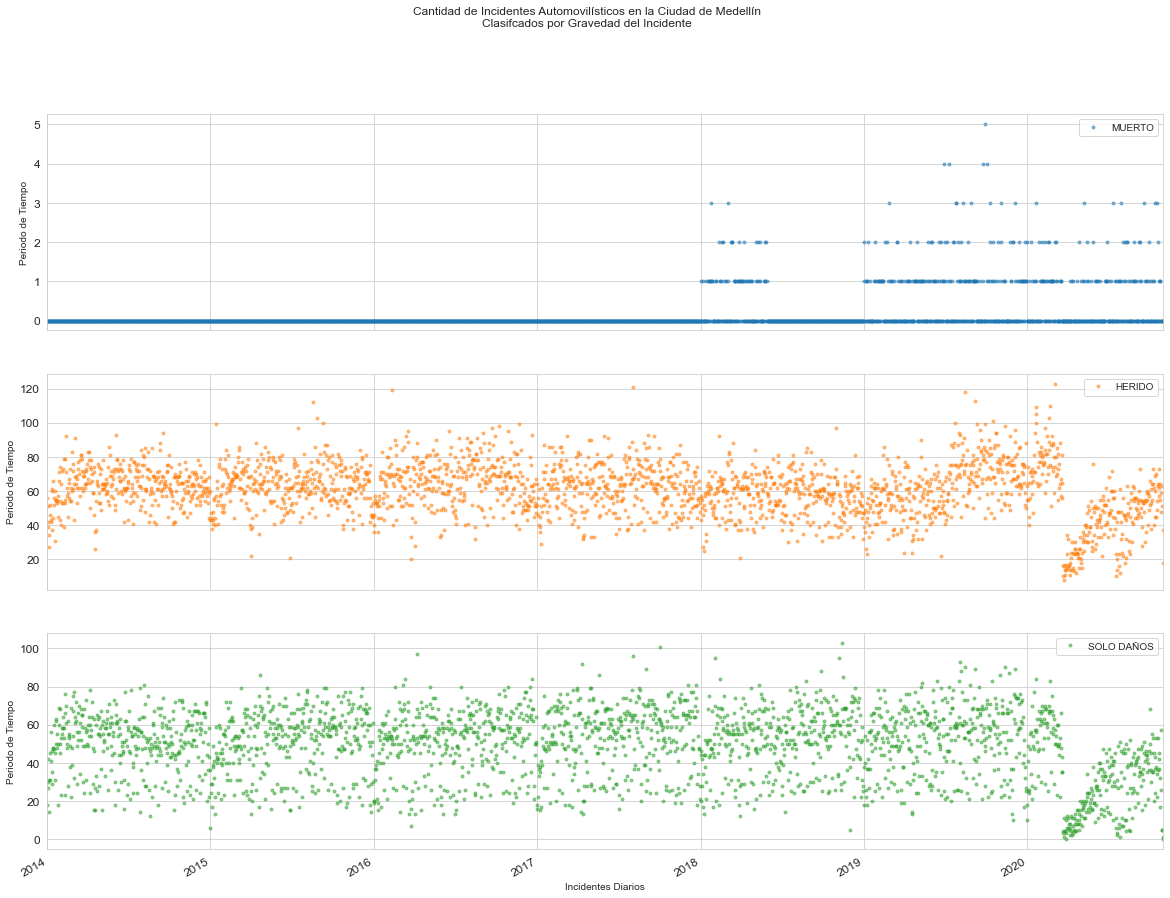

In [100]:
plot_data(data=incidentes_gravedad,
          columnas=['MUERTO','HERIDO','SOLO DAÑOS'], 
          title='Cantidad de Incidentes Automovilísticos en la Ciudad de Medellín\nClasifcados por Gravedad del Incidente',
          lx='Incidentes Diarios',
          ly='Periodo de Tiempo'
         )
# incidentes_gravedad.plot(subplots=True,title='Cantidad de Incidentes Automovilísticos en la Ciudad de Medellín\nClasifcados por Gravedad del Incidente')

En el grafico anterior se puede observar que para la categoría **MUERTO**, esta la ausencia de datos del **2014 al 2017**. Igualemnte no se ve una tendencia o estancionalidad, solo que el año 2019 hay un incremento en esta categoría.

Para las categorías, **HERIDO**, **SOLO DAÑOS**, hay diferencia en la cantidad de indentes, el 1ro oscila entre 40 y 80 incidentes, el 2do oscila entre 20 y 80 incidentes. Además no muestran una periocidad o estacionalidad. 

En la sesión anterior vimos que el registro de categoría **MUERTO** de columna **GRAVEDAD**, solo tiene datos a partir del **2018**, por esta razón realizamos un filtro de los datos del año **2018** en adelante.

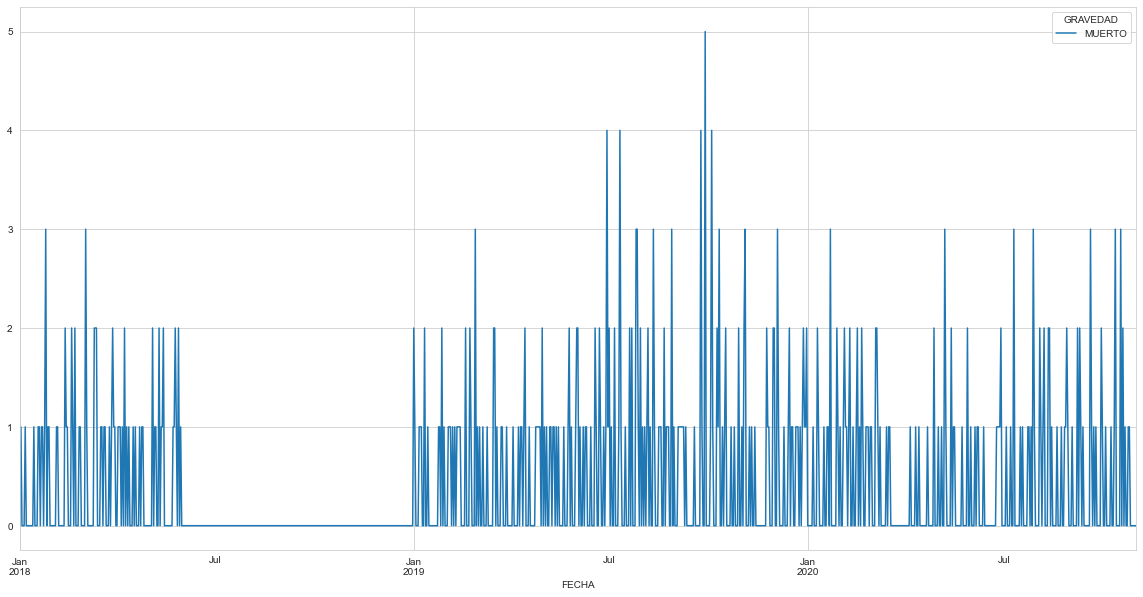

In [101]:
incidentes_gravedad.loc['2018-01-01':'2020-12-31',['MUERTO']].plot()

En la gráfica anterior se pude observar:

- **el 2do semestre del año 2018** no hay registros de los incidentes de transito con la categoría **MUERTO** de la columna **GRAVEDAD** en el repositorio correspondiente. Información que se puede detectar facilmente cuando se grafica. 
- También se peuede observar que existen unos pocos vacios, como se ve en **el 1er semestre del año 2020**, esto se debe a **la pandemía del covid-19** que para este periodo de tiempo llego a la ciudad y las autoridades dieron instrucción de toque de queda por varios días.

Ahora, vamos hacer un **Zoom al 2do semestre del año 2019**, el cual se observa que es cuando a habido más incidentes con personas muertas.

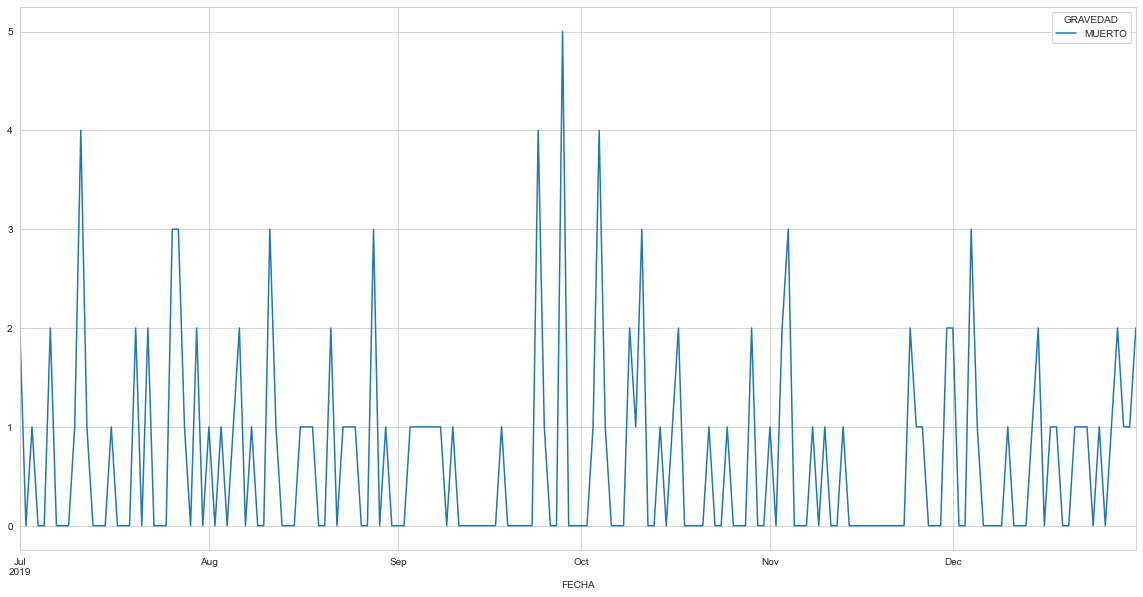

In [102]:
incidentes_gravedad.loc['2019-07-01':'2019-12-31',['MUERTO']].plot()

Ahora graficaremos para el periodo de tiempo en que nos encontrabamos en pandemía del año 2020 correspondientes a los meses de Marzo a Diciembre, pero los datos de esta categoria solo estan hasta el mes de octubre, para la categoria Muerto.

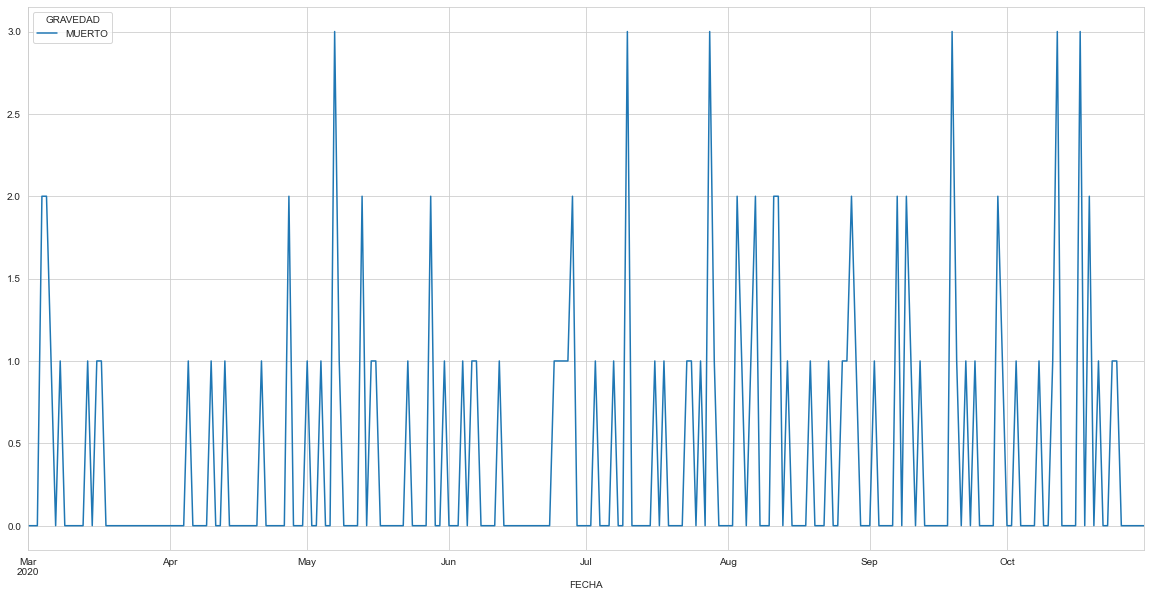

In [103]:
incidentes_gravedad.loc['2020-03-01':'2020-10-31',['MUERTO']].plot()

##### Columna CLASE

In [104]:
incidentes_clase = incidentes.pivot_table(index='CLASE', 
                       columns=['FECHA'], 
                       values='OBJECTID', 
                       aggfunc='count', 
                       fill_value=0).T.sort_index()

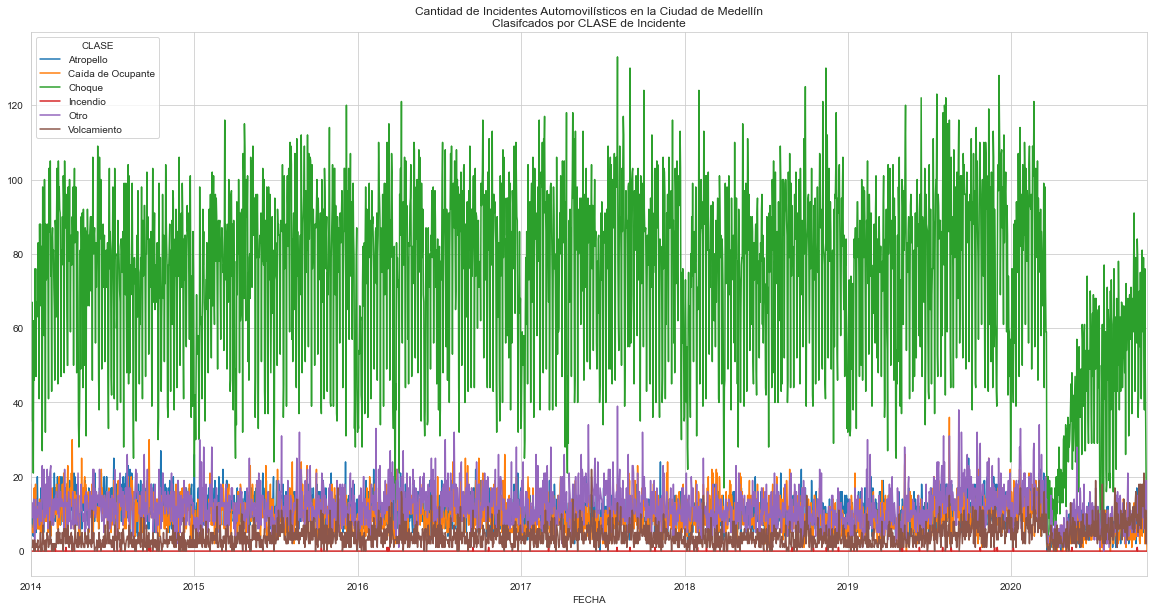

In [105]:
incidentes_clase.plot(title='Cantidad de Incidentes Automovilísticos en la Ciudad de Medellín\nClasifcados por CLASE de Incidente')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000013982136588>,
      dtype=object)

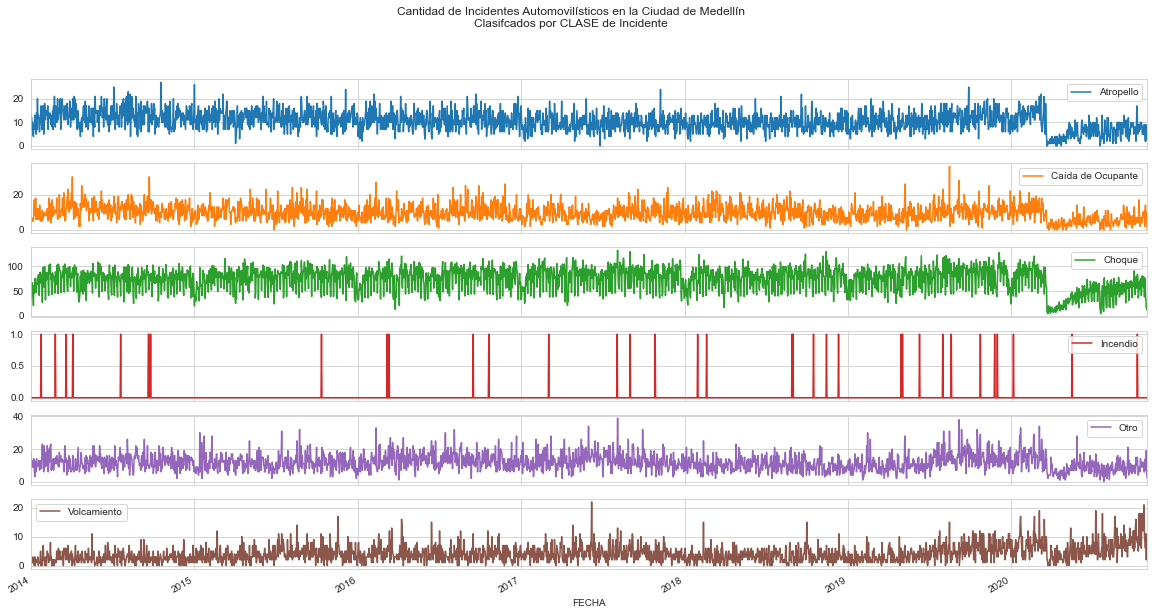

In [106]:
incidentes_clase.plot(
        subplots=True,
        title='Cantidad de Incidentes Automovilísticos en la Ciudad de Medellín\nClasifcados por CLASE de Incidente'
)

##### Columna DISENO

In [107]:
incidentes_diseno = incidentes.pivot_table(index='DISENO', 
                       columns=['FECHA'], 
                       values='OBJECTID', 
                       aggfunc='count', 
                       fill_value=0).T.sort_index()

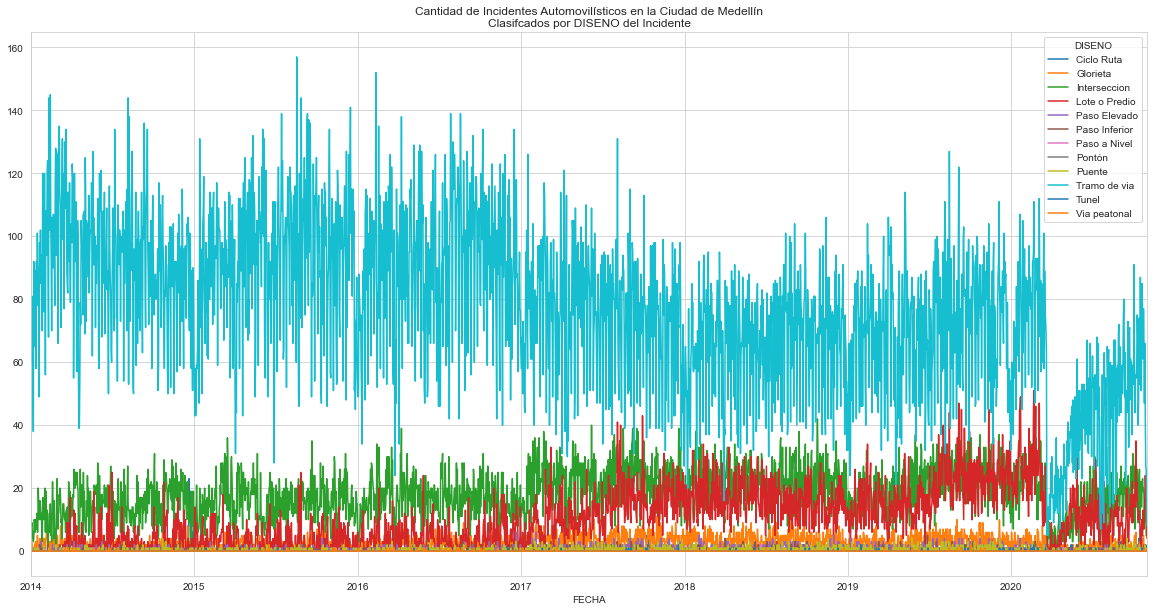

In [108]:
incidentes_diseno.plot(title='Cantidad de Incidentes Automovilísticos en la Ciudad de Medellín\nClasifcados por DISENO del Incidente')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001398472F448>,
      dtype=object)

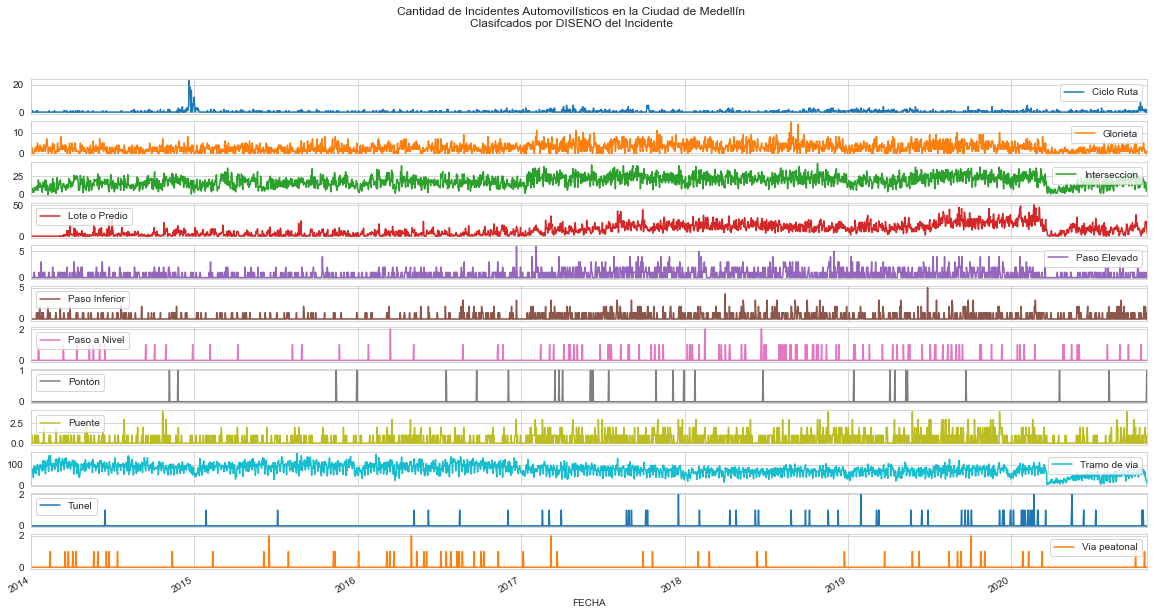

In [109]:
incidentes_diseno.plot(
    subplots=True,
    title='Cantidad de Incidentes Automovilísticos en la Ciudad de Medellín\nClasifcados por DISENO del Incidente'
)

In [110]:
# Fin de la sesión de visualización
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


****

## Análisis de Series de Tiempo

In [111]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
import itertools
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import statsmodels.api as sm

matplotlib.rcParams['figure.figsize'] = (20,10)
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

pathData = "D:\MedData\Incidentes georreferenciados\Incidentes_georreferenciados_"
extension = ".csv"

columnas = ['FECHA','HORA','PERIODO','MES','DIA','CLASE','GRAVEDAD','COMUNA','DISENO','DIA_NOMBRE','MES','LONGITUD','LATITUD']

Abrir el set de datos depurado y generado en la sección análisis de datos.

In [112]:
incidentes = pd.read_csv(pathData + "all" + extension, parse_dates=['FECHA','Fecha_Hora'], index_col=['Fecha_Hora'])
incidentes

Unnamed: 0  OBJECTID      FECHA      HORA  DIA  PERIODO  \
Fecha_Hora                                                                     
2014-01-01 02:20:00           0    211279 2014-01-01  02:20:00    1     2014   
2014-01-01 12:50:00           1    211280 2014-01-01  12:50:00    1     2014   
2014-01-01 01:00:00           2    211281 2014-01-01  01:00:00    1     2014   
2014-01-01 12:37:00           3    211282 2014-01-01  12:37:00    1     2014   
2014-01-01 10:40:00           4    211283 2014-01-01  10:40:00    1     2014   
...                         ...       ...        ...       ...  ...      ...   
2020-03-02 06:50:00       25374    815518 2020-03-02  06:50:00    2     2020   
2020-01-15 07:00:00       25375    815519 2020-01-15  07:00:00   15     2020   
2020-01-18 04:30:00       25376    815520 2020-01-18  04:30:00   18     2020   
2020-06-26 03:56:00       25377    815521 2020-06-26  03:56:00   26     2020   
2020-07-10 01:10:00       25378    815522 2020-07-10  01:10:00   10     2020   

                                 CLASE    GRAVEDAD            COMUNA  \
Fecha_Hora                                                             
2014-01-01 02:20:00             Choque      HERIDO             Belén   
2014-01-01 12:50:00          Atropello      HERIDO     La Candelaria   
2014-01-01 01:00:00          Atropello      HERIDO          Manrique   
2014-01-01 12:37:00          Atropello      HERIDO             Belén   
2014-01-01 10:40:00  Caída de Ocupante      HERIDO   Doce de Octubre   
...                                ...         ...               ...   
2020-03-02 06:50:00          Atropello      HERIDO           Popular   
2020-01-15 07:00:00             Choque  SOLO DAÑOS  Laureles Estadio   
2020-01-18 04:30:00             Choque      HERIDO             Belén   
2020-06-26 03:56:00          Atropello      MUERTO     La Candelaria   
2020-07-10 01:10:00             Choque  SOLO DAÑOS     La Candelaria   

                            DISENO DIA_NOMBRE  MES   LONGITUD   LATITUD  \
Fecha_Hora                                                                
2014-01-01 02:20:00   Tramo de via  MIÉRCOLES    1 -75.602726  6.219016   
2014-01-01 12:50:00   Tramo de via  MIÉRCOLES    1 -75.568185  6.260009   
2014-01-01 01:00:00   Tramo de via  MIÉRCOLES    1 -75.549943  6.264765   
2014-01-01 12:37:00   Tramo de via  MIÉRCOLES    1 -75.607611  6.234327   
2014-01-01 10:40:00   Tramo de via  MIÉRCOLES    1 -75.579685  6.299968   
...                            ...        ...  ...        ...       ...   
2020-03-02 06:50:00  Lote o Predio  LUNES        3 -75.550848  6.288293   
2020-01-15 07:00:00   Interseccion  MIÉRCOLES    1 -75.587973  6.254189   
2020-01-18 04:30:00   Tramo de via  SÁBADO       1 -75.576866  6.232463   
2020-06-26 03:56:00   Tramo de via  VIERNES      6 -75.568822  6.257265   
2020-07-10 01:10:00   Interseccion  VIERNES      7 -75.572551  6.245209   

                    NOMBRE_MES  
Fecha_Hora                      
2014-01-01 02:20:00      Enero  
2014-01-01 12:50:00      Enero  
2014-01-01 01:00:00      Enero  
2014-01-01 12:37:00      Enero  
2014-01-01 10:40:00      Enero  
...                        ...  
2020-03-02 06:50:00      Marzo  
2020-01-15 07:00:00      Enero  
2020-01-18 04:30:00      Enero  
2020-06-26 03:56:00      Junio  
2020-07-10 01:10:00      Julio  

[275356 rows x 15 columns]

##### Información sobre la serie
- **Lugar:** Medellín, Colombia
- **Frecuencia de observación:** Diaria
- **Cantidad de observaciones:** 275,356

No se podrá realizar un anális de serie de tiempo con una frecuencia de 24 horas, ya que no es posible identificar la hora real en que se presento el incidente por las razones que hemos expresado en secciones anteriores y poder observar de forma clara los componentes de las series de tiempo como son:

- **La Tendencia $(T)$**
- **Flutuaciones Cíclicas $(C)$**
- **Variaciones Estacionales $(E)$**
- **Variaciones Irregulares $(I)$**


A pesar de esto se continuará con el análsis de series de tiempo de los incidentes que tenemos en nuestro data set.

Se trabajará con la cantidad de incidentes por día. 

A continuación se crearan varios **data set** para diferentes frecuencias de tiempo como [**minuto**, **hora**, **día**, **mes**, **trimestre**, **año**] de los incidentes de transito que tenemos a dispoición.

In [113]:
incidentes_day = pd.DataFrame(incidentes.resample('D')['OBJECTID'].count())
incidentes_mon = pd.DataFrame(incidentes.resample('M')['OBJECTID'].count())
incidentes_tri = pd.DataFrame(incidentes.resample('Q')['OBJECTID'].count())
incidentes_yea = pd.DataFrame(incidentes.resample('A')['OBJECTID'].count())

### Gráfico de probabilidad

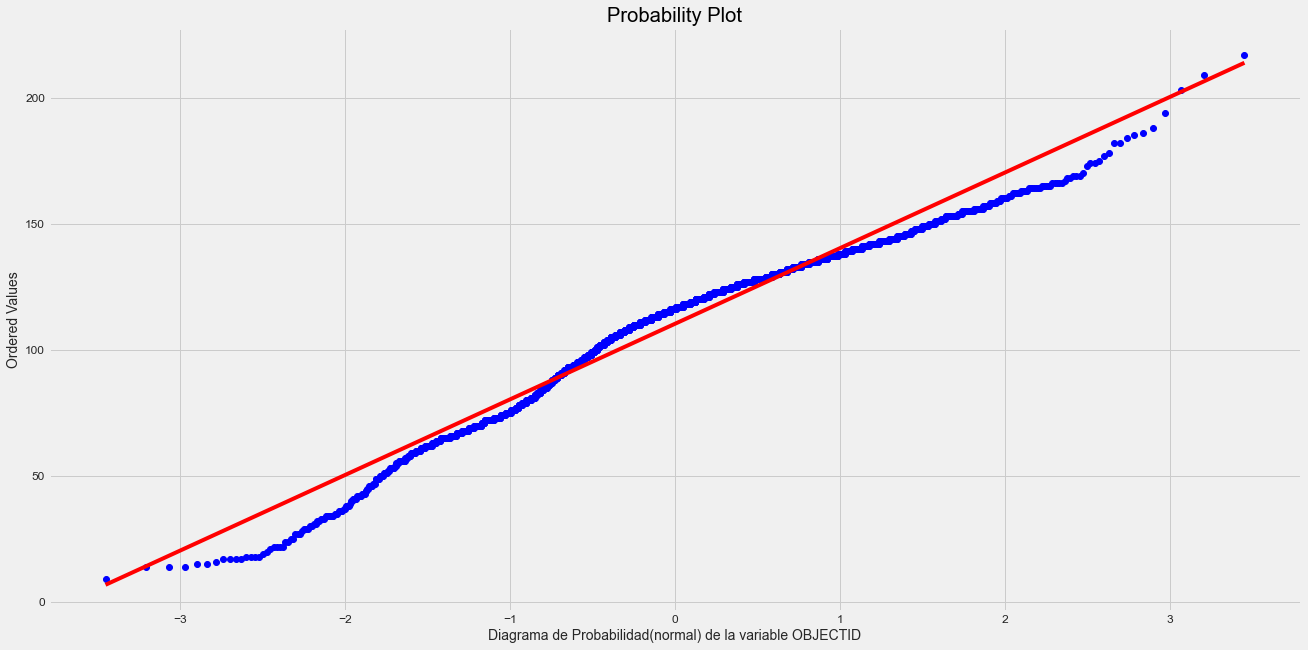

In [114]:
# import statistics as stats
# import stat
# import statsmodels
# import scipy.stats as ss

from scipy import stats
def normalidad_variable_numerica(col):
    stats.probplot(incidentes_day[col], plot=plt)
    plt.xlabel('Diagrama de Probabilidad(normal) de la variable {}'.format(col))
    plt.show()
    
normalidad_variable_numerica('OBJECTID')

In [115]:
type(incidentes_day)

pandas.core.frame.DataFrame

In [116]:
# https://naps.com.mx/blog/python-distribucion-de-variables/

columnas_numericas = incidentes.select_dtypes(['int', 'float']).columns
for num_col in columnas_numericas:
    _, pval = stats.normaltest(incidentes[num_col])
    print(pval)
    if(pval < 0.05):
        print("Columna {} no sigue una distribución normal".format(num_col))
    else:
        print("Columna {} sigue una distribución normal".format(num_col))

0.0
Columna LONGITUD no sigue una distribución normal
0.0
Columna LATITUD no sigue una distribución normal


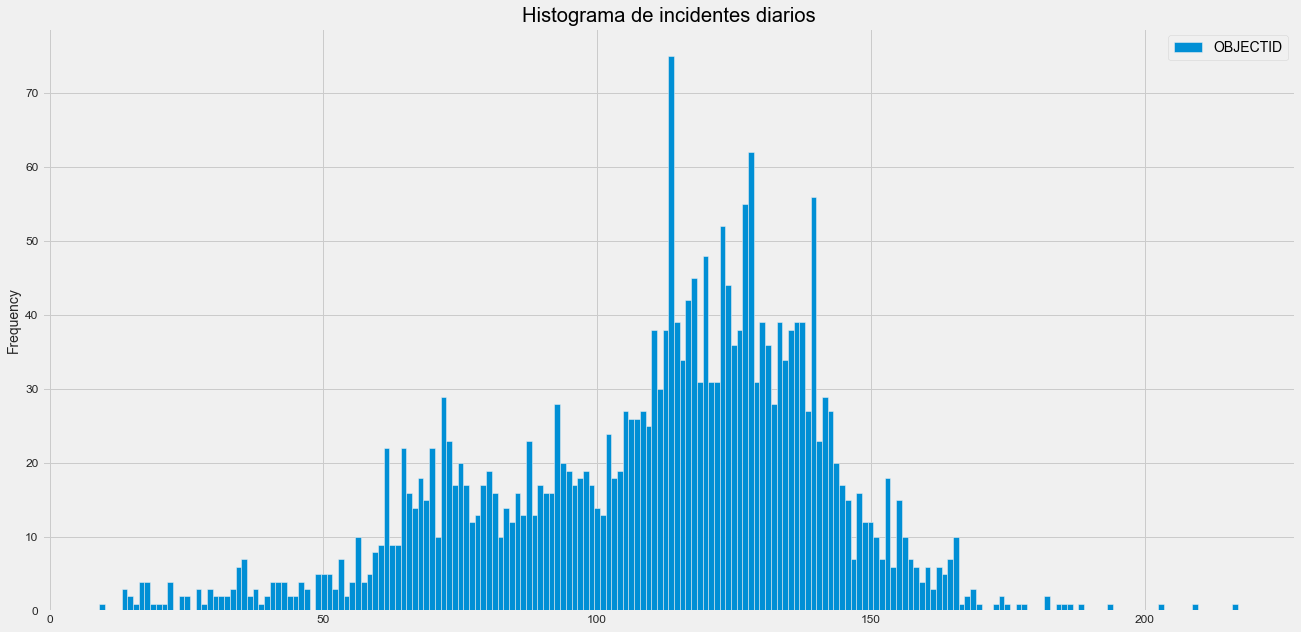

In [117]:
# x = stats.norm(incidentes_day)
# # x = np.linspace()
incidentes_day.plot.hist(title='Histograma de incidentes diarios', bins=200)
# incidentes_day.plot.line()
# matplotlib.pyplot.hist(incidentes_day)


# plt.hist(incidentes_day)
# plt.title('Histograma de una variable')
# plt.xlabel('Valor de la variable')
# plt.ylabel('Conteo')
# plt.show()

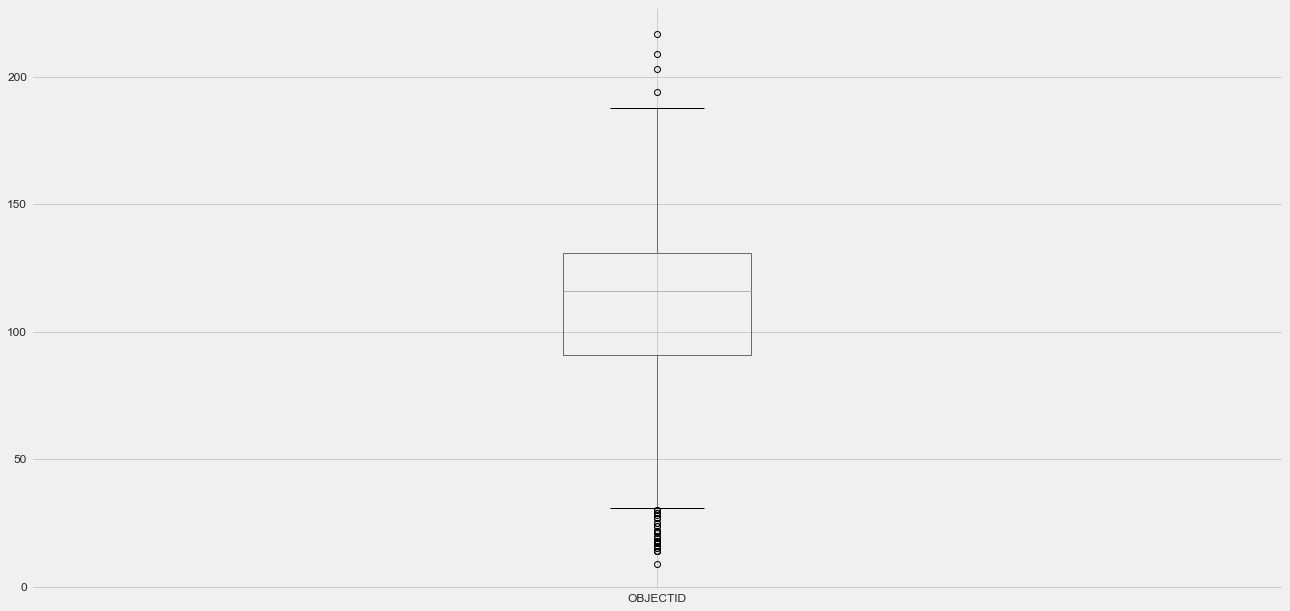

In [118]:
incidentes_day.plot.box()

In [119]:
incidentes_day.describe()

OBJECTID
count  2496.000000
mean    110.318910
std      30.411619
min       9.000000
25%      91.000000
50%     116.000000
75%     131.000000
max     217.000000

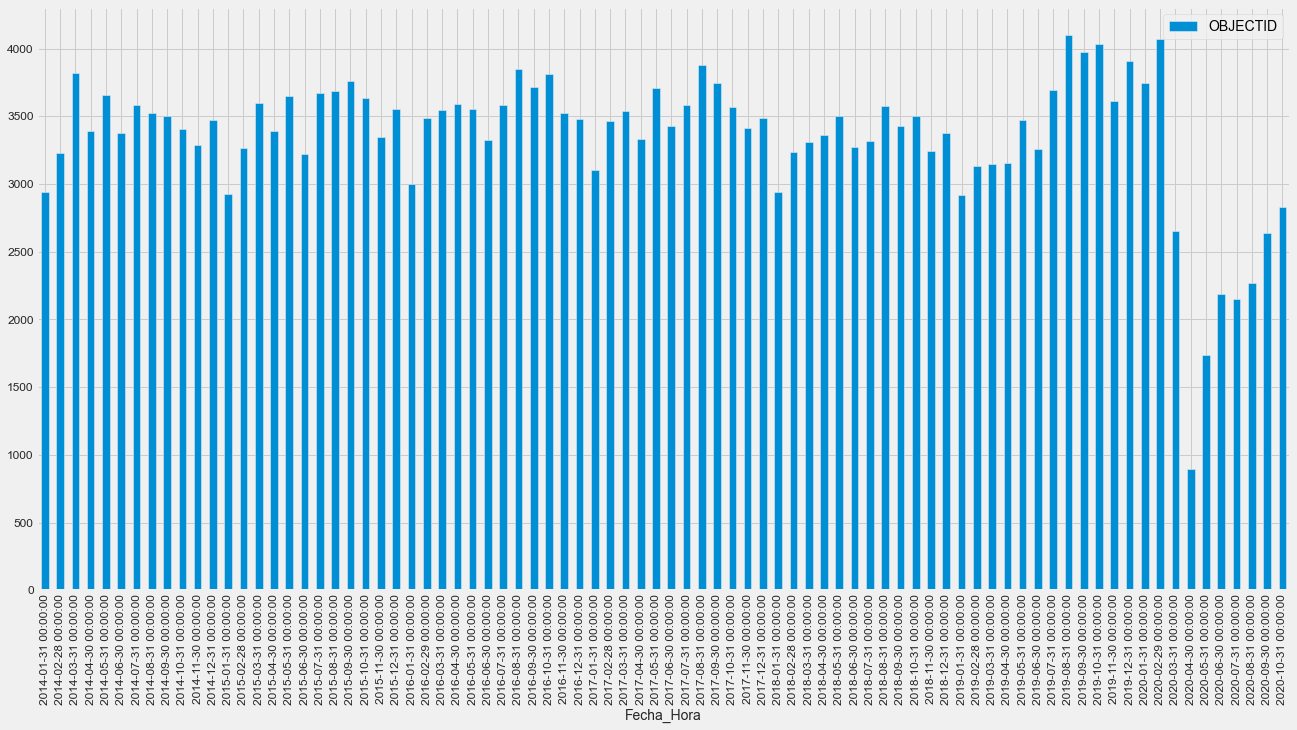

In [120]:
incidentes_mon.plot.bar()

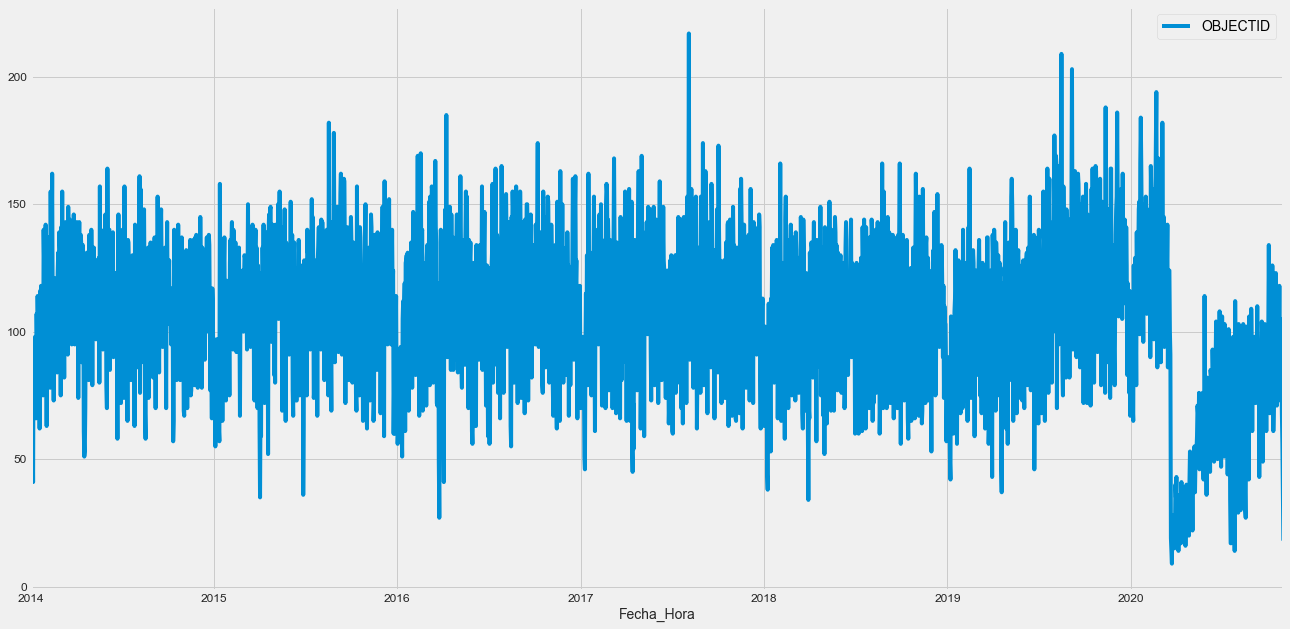

In [121]:
incidentes_day.plot()

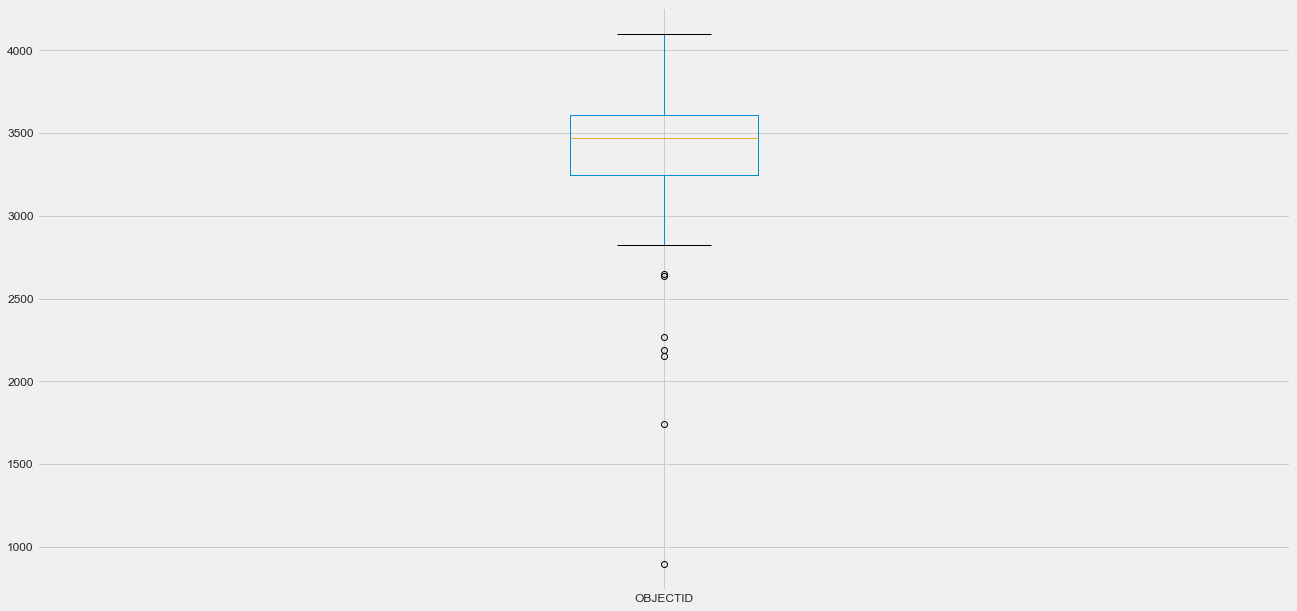

In [122]:
incidentes_mon.plot.box()

(array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]]),
 array([25181., 26912., 28643., 30374., 32105., 33836., 35567., 37298.,
        39029., 40760., 42491.]),
 <a list of 7 Lists of Patches objects>)

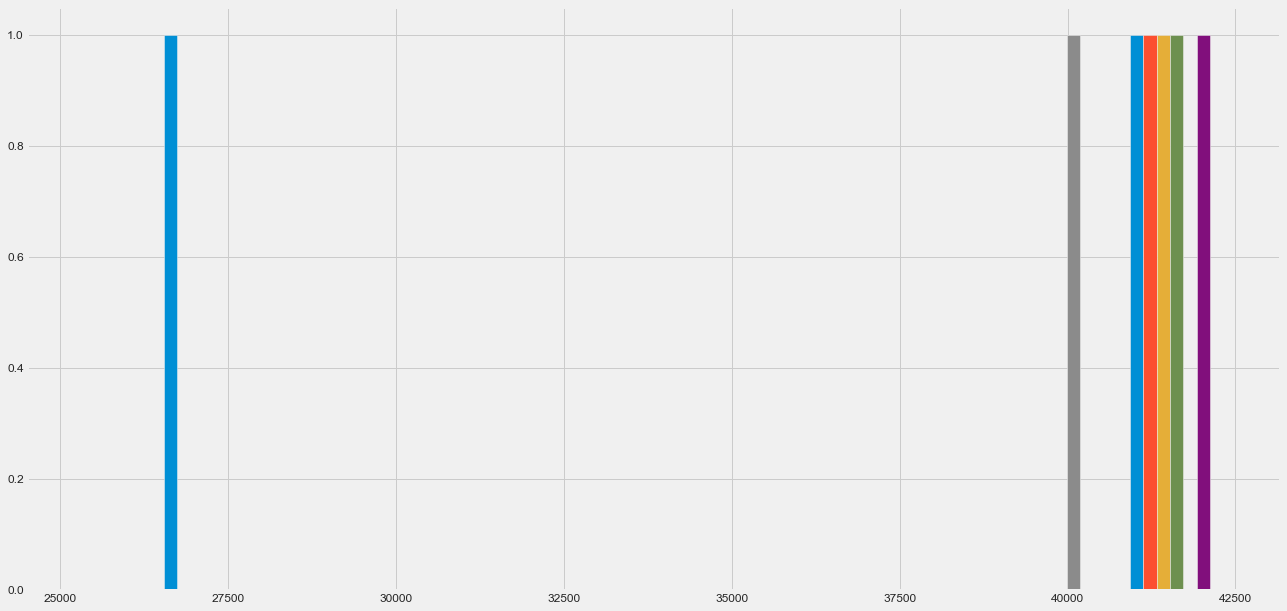

In [123]:
# from scipy.stats import norm
# dist = norm(loc=np.mean(incidentes_yea), scale=np.std(incidentes_yea))
# x = np.linspace(dist.ppf(0.001),
#                 dist.ppf(0.999), 100)
# plt.hist(incidentes_yea, label="Muestra")
# plt.plot(x, dist.pdf(x), "r-", label="PDF teórico")
# plt.legend()

import matplotlib.pyplot as plt
plt.hist(incidentes_yea)

### Hallar datos atipicos
#### Valores atípicos
Se graficaran los datos para las frecuencias (Día, Mes, Año)

NameError: name 'PS1' is not defined

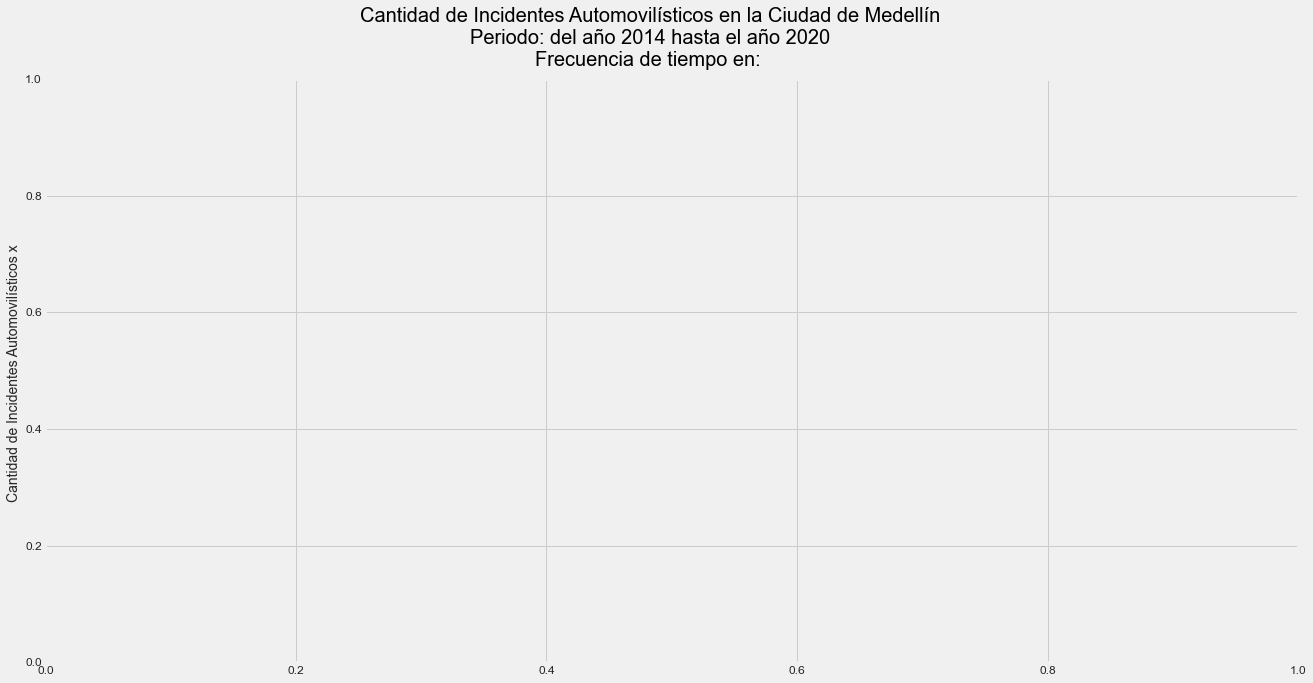

In [124]:
# incidentes.resample('A')['OBJECTID'].count().plot()

# fig, ejes = plt.subplots(3, 1, figsize=(20, 15), sharex=True)

# ejes[0].plot(incidentes.resample('D')['OBJECTID'].count().plot())
# ejes[1].plot(incidentes.resample('M')['OBJECTID'].count().plot())
# ejes[2].plot(incidentes.resample('A')['OBJECTID'].count().plot())

fig, ax = plt.subplots()
fig.suptitle('Cantidad de Incidentes Automovilísticos en la Ciudad de Medellín\nPeriodo: del año 2014 hasta el año 2020\nFrecuencia de tiempo en: ' , fontsize=20)
ax.set_ylabel('Cantidad de Incidentes Automovilísticos x ')
ax.set_xlabel(PS1 + ' en el que se Presento el Incidente')

ax.plot(S1, label='Cantidad de Incidentes Automovilísticos x ')
ax.plot(S2, label='Promedio de Incidentes Automovilísticos x ')

legend = ax.legend(loc='upper left', shadow=True, fontsize='x-large')
plt.ylim=(0,400)
plt.grid()
plt.show()

## Estacionalidad

In [125]:
filtro = (incidentes['PERIODO'] != 2020)

incidentes_gravedad_mes = incidentes\
                            .where(filtro)\
                            .pivot_table(index='GRAVEDAD', 
                                           columns=['MES'], 
                                           values='OBJECTID', 
                                           aggfunc='count', 
                                           fill_value=0
                                        )\
                            .T\
                            .sort_index()

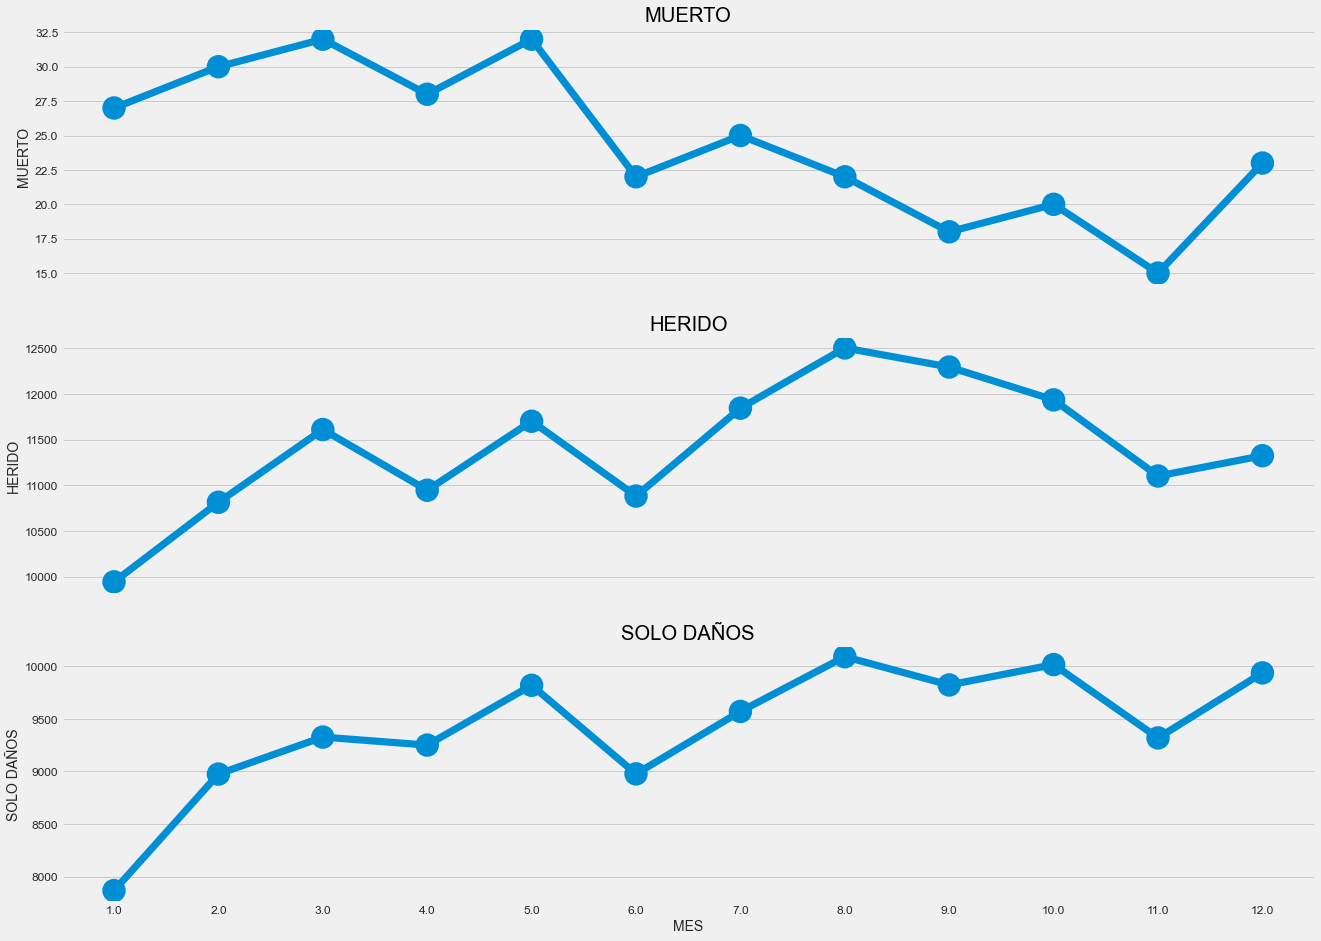

In [126]:
fig, ejes = plt.subplots(3, 1, figsize=(20, 15), sharex=True)
for nombre, eje in zip(['MUERTO','HERIDO','SOLO DAÑOS'], ejes):
#     sns.barplot(data=incidentes_gravedad_mes,x=incidentes_gravedad_mes.index,y=nombre,ax=eje)
#     sns.boxenplot(data=incidentes_gravedad_mes,x=incidentes_gravedad_mes.index,y=nombre,ax=eje)
#     sns.boxplot(data=incidentes_gravedad_mes,x=incidentes_gravedad_mes.index,y=nombre,ax=eje)
#     sns.clustermap(data=incidentes_gravedad_mes,x=incidentes_gravedad_mes.index,y=nombre,ax=eje)
#     sns.lineplot(data=incidentes_gravedad_mes,x=incidentes_gravedad_mes.index,y=nombre,ax=eje)
    sns.pointplot(data=incidentes_gravedad_mes,x=incidentes_gravedad_mes.index,y=nombre,ax=eje)
#     sns.regplot(data=incidentes_gravedad_mes,x=incidentes_gravedad_mes.index,y=nombre,ax=eje)
#     sns.residplot(data=incidentes_gravedad_mes,x=incidentes_gravedad_mes.index,y=nombre,ax=eje)
#     sns.scatterplot(data=incidentes_gravedad_mes,x=incidentes_gravedad_mes.index,y=nombre,ax=eje)
#     sns.stripplot(data=incidentes_gravedad_mes,x=incidentes_gravedad_mes.index,y=nombre,ax=eje)
#     sns.swarmplot(data=incidentes_gravedad_mes,x=incidentes_gravedad_mes.index,y=nombre,ax=eje)
#     sns.violinplot(data=incidentes_gravedad_mes,x=incidentes_gravedad_mes.index,y=nombre,ax=eje)
    eje.set_title(nombre)
    if eje != ejes[-1]:
        eje.set_xlabel('')

In [127]:
incidentes_gravedad_mes = incidentes\
                            .where(filtro)\
                            .pivot_table(index='GRAVEDAD', 
                                           columns=['PERIODO','MES'], 
                                           values='OBJECTID', 
                                           aggfunc='count', 
                                           fill_value=0
                                        )\
                            .T\
                            .sort_index()
incidentes_gravedad_mes.reset_index(inplace=True)

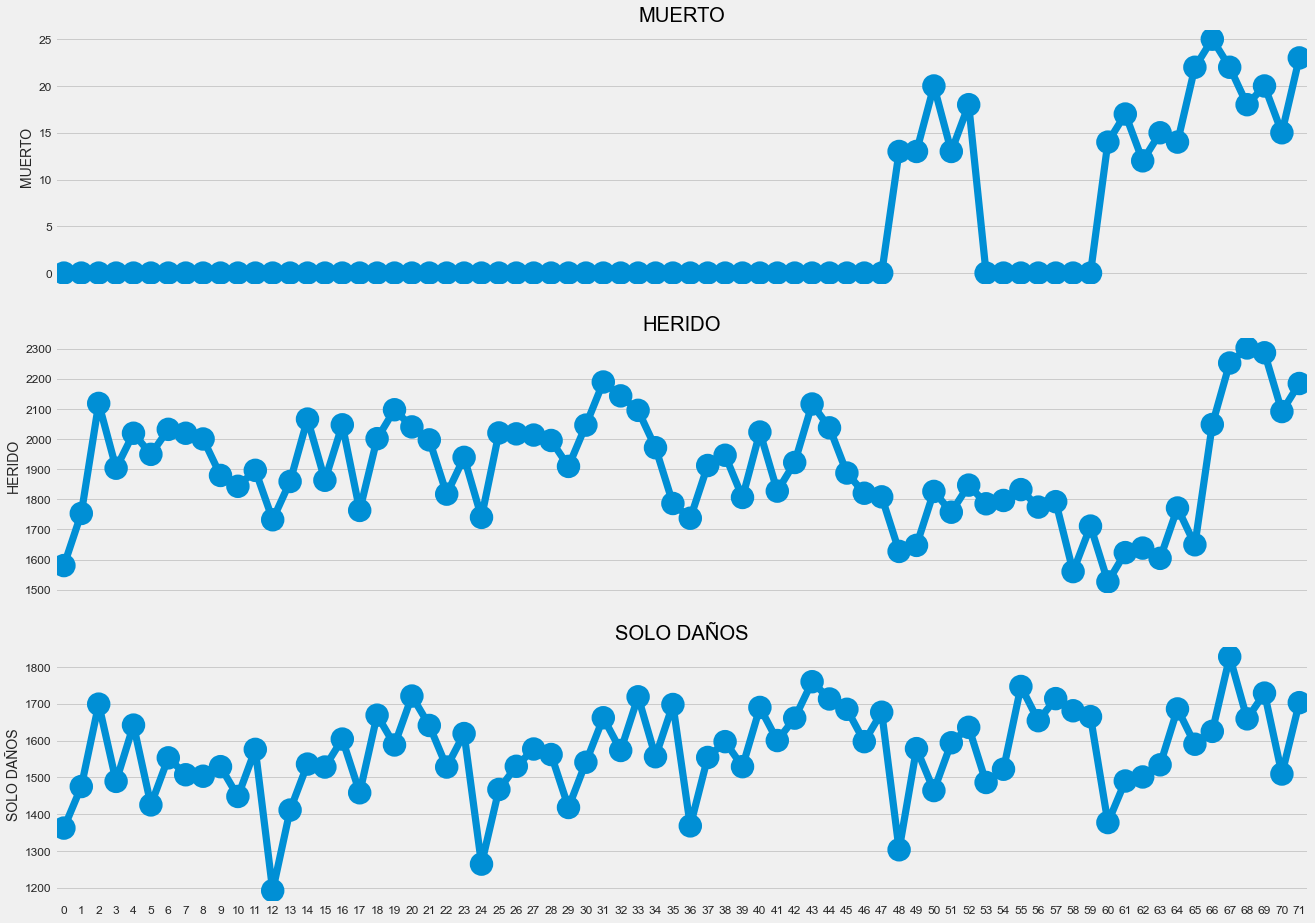

In [128]:
fig, ejes = plt.subplots(3, 1, figsize=(20, 15), sharex=True)
for nombre, eje in zip(['MUERTO','HERIDO','SOLO DAÑOS'], ejes):
#     sns.lineplot(data=incidentes_gravedad_mes,x=incidentes_gravedad_mes.index,y=nombre,ax=eje)
    sns.pointplot(data=incidentes_gravedad_mes,x=incidentes_gravedad_mes.index,y=nombre,ax=eje)
#     sns.regplot(data=incidentes_gravedad_mes,x=incidentes_gravedad_mes.index,y=nombre,ax=eje)
#     sns.residplot(data=incidentes_gravedad_mes,x=incidentes_gravedad_mes.index,y=nombre,ax=eje)
#     sns.scatterplot(data=incidentes_gravedad_mes,x=incidentes_gravedad_mes.index,y=nombre,ax=eje)
#     sns.stripplot(data=incidentes_gravedad_mes,x=incidentes_gravedad_mes.index,y=nombre,ax=eje)
#     sns.swarmplot(data=incidentes_gravedad_mes,x=incidentes_gravedad_mes.index,y=nombre,ax=eje)

    eje.set_title(nombre)
    if eje != ejes[-1]:
        eje.set_xlabel('')

In [129]:
incidentes_group = pd.DataFrame(incidentes
                                .groupby(['DIA','MES','PERIODO'])['OBJECTID']
                                .count()
                                .rename('registros')
                               ).reset_index()
# incidentes_group

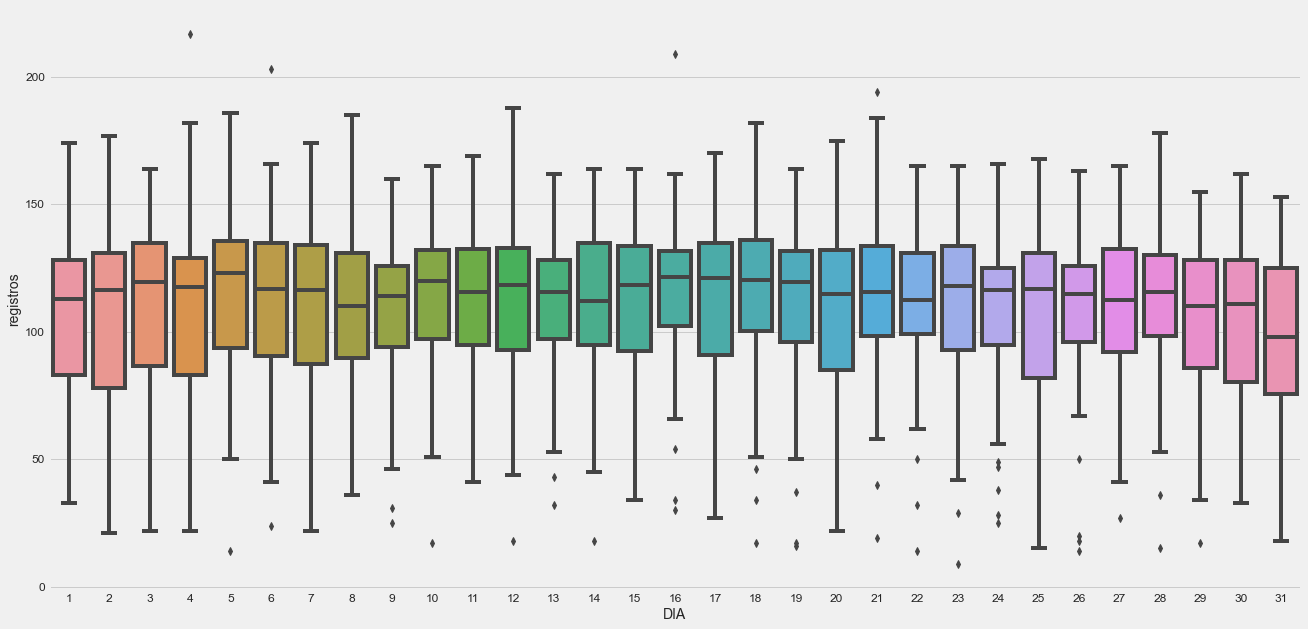

In [130]:
sns.boxplot(data=incidentes_group, x='DIA', y='registros')

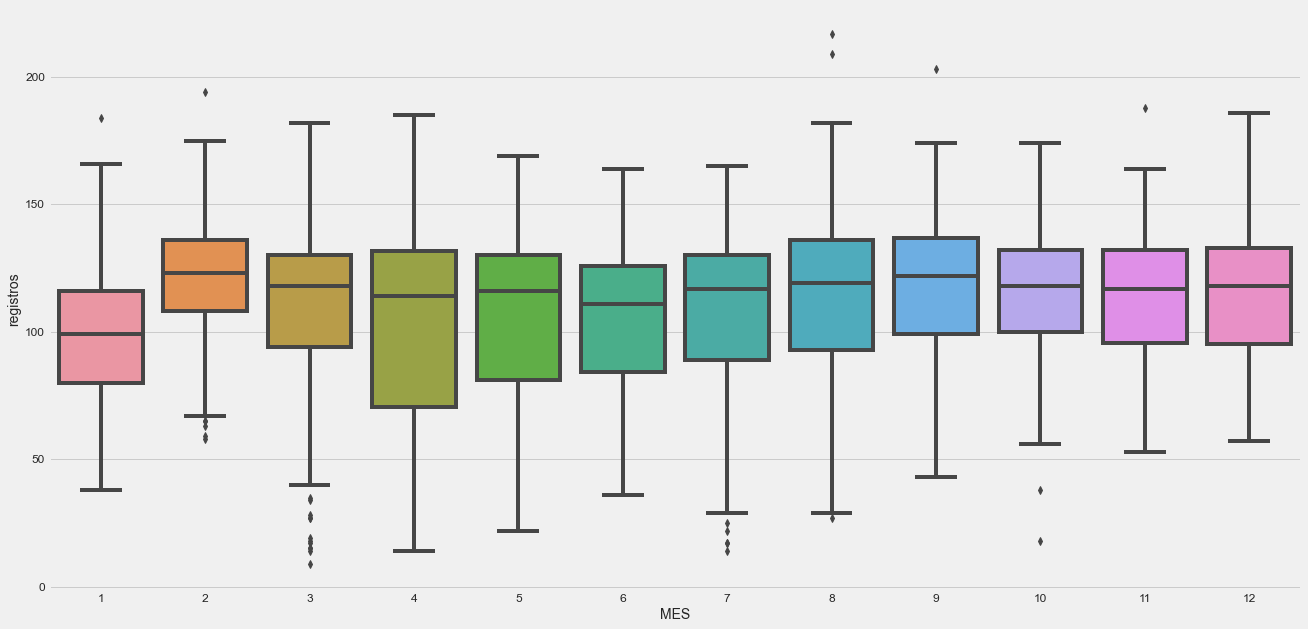

In [131]:
sns.boxplot(data=incidentes_group, x='MES', y='registros')

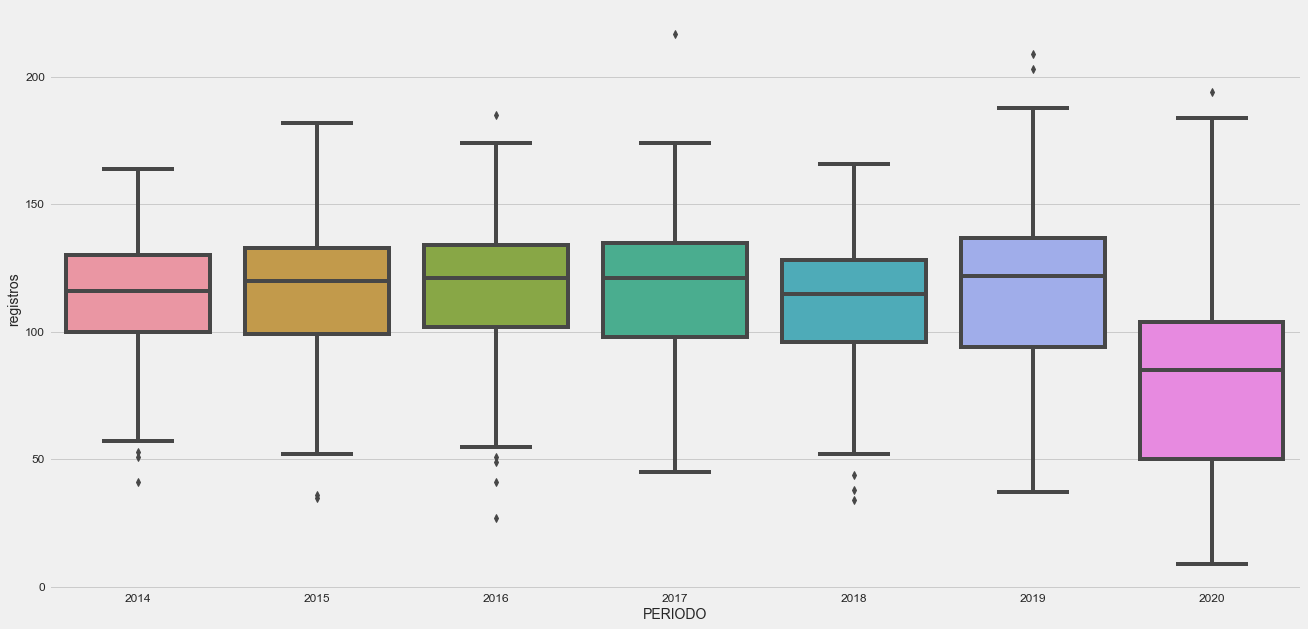

In [132]:
sns.boxplot(data=incidentes_group, x='PERIODO', y='registros')

### Ventanas deslizantes (tendencias)

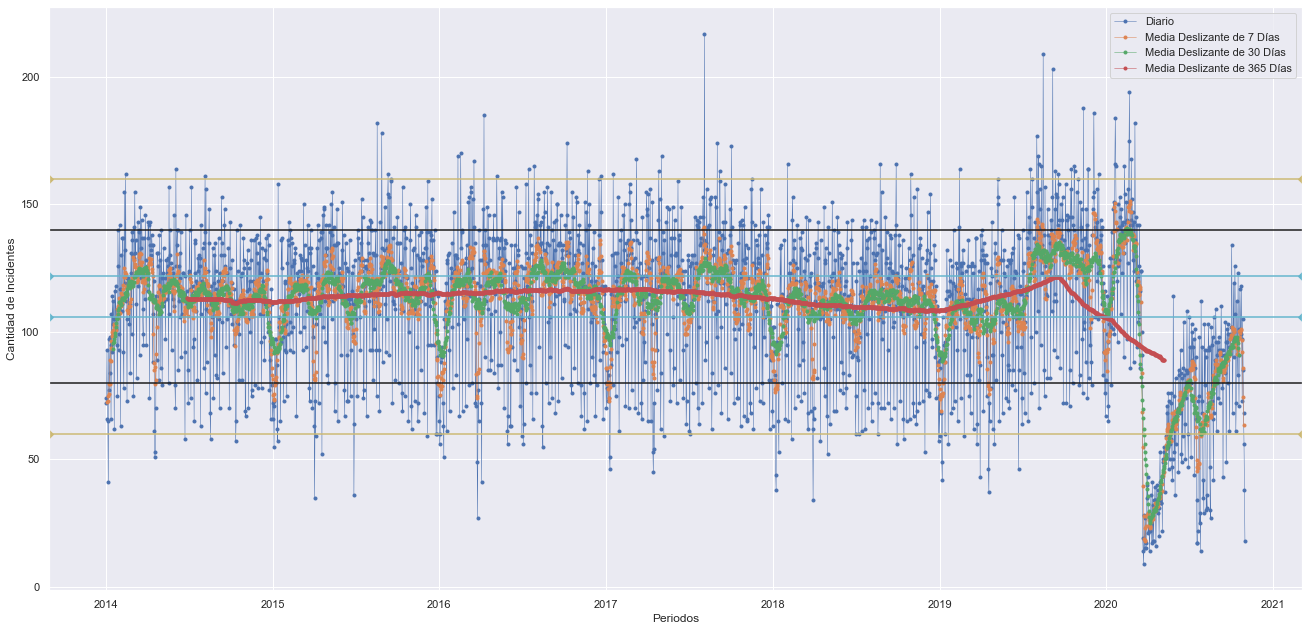

In [133]:
sns.set(rc={'figure.figsize':(20, 10)})


incidentes_semanal = incidentes_day[['OBJECTID']].resample('W').mean()
incidentes_7d = incidentes_day[['OBJECTID']].rolling(7, center=True).mean()
incidentes_30d = incidentes_day[['OBJECTID']].rolling(window=30,center=True,min_periods=30).mean()
incidentes_365d = incidentes_day[['OBJECTID']].rolling(window=365,center=True,min_periods=360).mean()

inicio, final='2014-01','2020-12'
fig, eje = plt.subplots()

eje.plot(incidentes_day.loc[inicio:final, 'OBJECTID']   ,marker='.',linestyle='-', linewidth=0.5,label='Diario')
# eje.plot(incidentes_semanal.loc[inicio:final,'OBJECTID'],marker='o',linestyle='-', linewidth=0.5,label='Media Semanal')
eje.plot(incidentes_7d.loc[inicio:final,'OBJECTID']     ,marker='.',linestyle='-', linewidth=0.5,label='Media Deslizante de 7 Días')
eje.plot(incidentes_30d.loc[inicio:final,'OBJECTID']    ,marker='.',linestyle='-', linewidth=0.5,label='Media Deslizante de 30 Días')
eje.plot(incidentes_365d.loc[inicio:final,'OBJECTID']   ,marker='.',linestyle='-', linewidth=0.5,label='Media Deslizante de 365 Días')

eje.set_ylabel('Cantidad de Incidentes')
eje.set_xlabel('Periodos')
eje.legend()

plt.axhline(y=140, color='k', linestyle='-')
plt.axhline(y=80, color='k', linestyle='-')

plt.axhline(y=106, color='c', linestyle='-', marker='D', linewidth=1.5)
plt.axhline(y=122, color='c', linestyle='-', marker='D', linewidth=1.5)

plt.axhline(y=60, color='y', linestyle='-', marker='D', linewidth=1.5)
plt.axhline(y=160, color='y', linestyle='-', marker='D', linewidth=1.5)

En la gráfica anterior podemos ver que la media deslizante de 365 días es una **tendencia estacionaria**.

Podemos visualizar nuestros datos utilizando un método llamado descomposición de series de tiempo que nos permite descomponer nuestra serie de tiempo en tres componentes distintos: **tendencia**, **estacionalidad** y **ruido**.

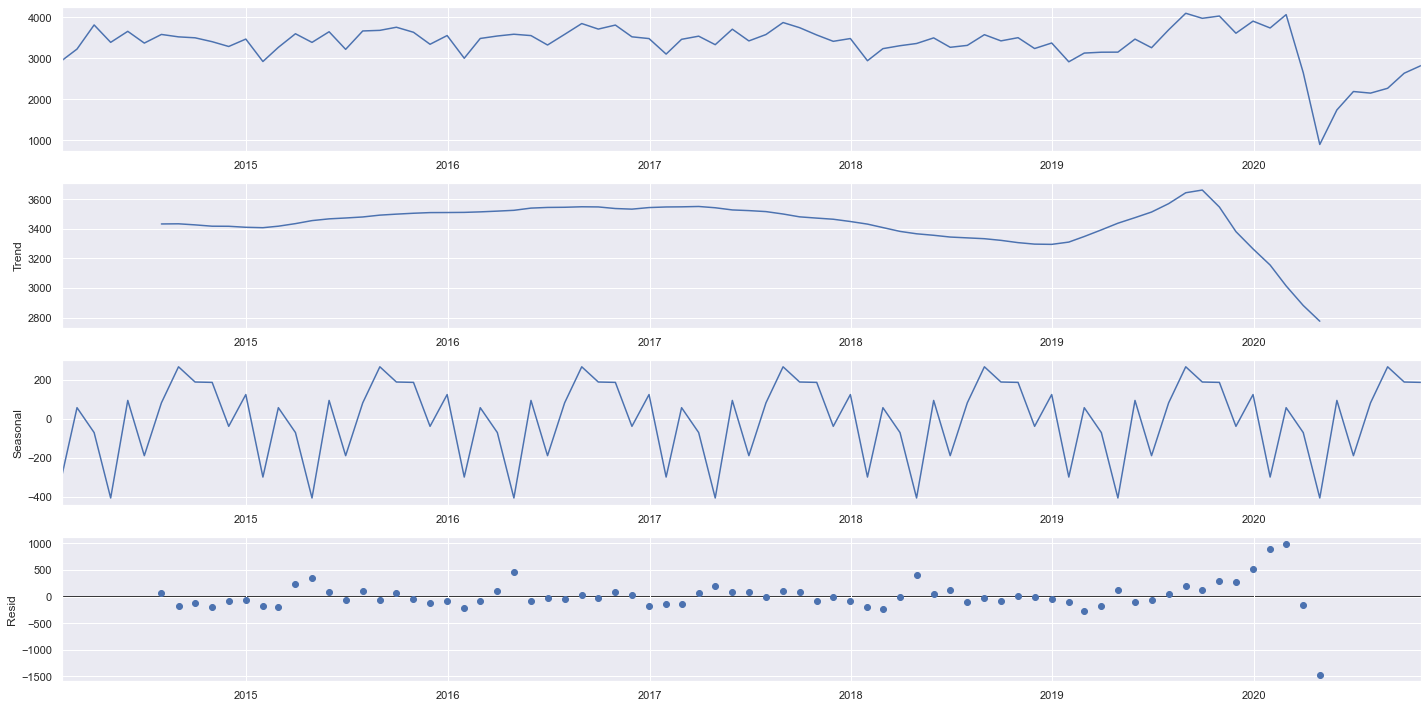

In [134]:
# incidentes_day2 = incidentes_day.loc['2014':'2019'] # Omitir el año 2020 por lo inconsistente por la pandemia covid-19
incidentes_day2 = incidentes_mon
decomposition = sm.tsa.seasonal_decompose(incidentes_day2, model='additive')
fig = decomposition.plot()
plt.show()

### Método ARIMA
El modelo esta compuesto por tres parámetros que tienen en cuenta **la estacionalidad**, **la tendencia** y **el ruido** en los datos:

In [135]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Ejemplos de combinaciones de parámetros para el método ARIMA ...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Ejemplos de combinaciones de parámetros para el método ARIMA ...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


La selección de parámetros para el modelo de serie temporal **ARIMA** de incidentes de transito. El objetivo aquí es utilizar una "**búsqueda de cuadrícula**" para encontrar el conjunto óptimo de parámetros que produzca el mejor rendimiento para el modelo.

In [136]:
minimo = 99999999999999999999
result = ''
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:            
            mod = sm.tsa.statespace.SARIMAX(incidentes_day2,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()      
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            if results.aic < minimo:
                minimo = results.aic
                result = 'ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic)
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1549.1749407970162
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1237.594605325495
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:1074.3735117687295
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:896.3980916253968
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1086.9007626848936
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1076.867852384675
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:902.941472605114
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:889.6503316474099
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1474.6088240133906
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1144.6659237190395
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:1011.06752711704
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:837.7484118716241
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:1037.6925081174438
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:1009.4656238173105
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:866.4400046284766
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:837.2905842340815
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1179.4772130119222
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1000.117404339962
ARIM

Saber cual es valor AIC menor

In [137]:
print("El resultado anterior sugiere que {} produce el valor AIC más bajo.\nPor lo tanto, debemos considerar que esta es la opción óptima.".format(result))

El resultado anterior sugiere que ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:809.0860253029524 produce el valor AIC más bajo.
Por lo tanto, debemos considerar que esta es la opción óptima.


El resultado anterior sugiere que SARIMAX (1, 1, 1) x (1, 1, 1, 12) produce el valor AIC más bajo de 20,242.94883335079. Por lo tanto, debemos considerar que esta es la opción óptima.

### Fitting the ARIMA model (Ajustar el modelo ARIMA)

In [139]:
mod = sm.tsa.statespace.SARIMAX(incidentes_day2,
                                order=(0, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.3662      0.089      4.123      0.000       0.192       0.540
ma.S.L12      -0.4800      0.428     -1.122      0.262      -1.319       0.359
sigma2      1.275e+05   1.35e+04      9.462      0.000    1.01e+05    1.54e+05


Siempre debemos ejecutar diagnósticos del modelo para investigar cualquier comportamiento inusual.

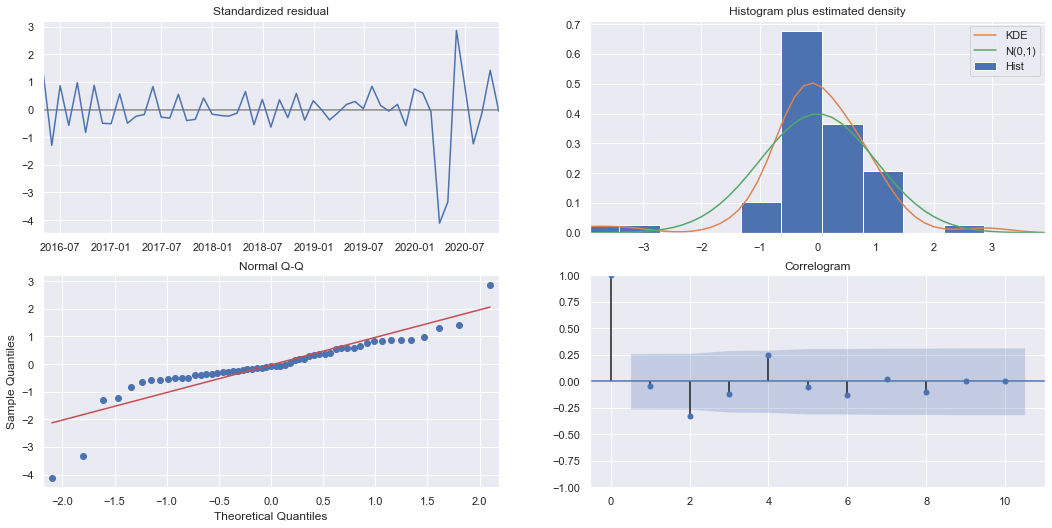

In [140]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

No es perfecto, sin embargo, el diagnóstico de nuestro modelo sugiere que los residuos del modelo están distribuidos casi normalmente.

### Validating forecasts (Validando pronósticos)

Para ayudarnos a comprender la precisión de nuestros pronósticos, comparamos las ventas pronosticadas con las ventas reales de la serie temporal y establecemos los pronósticos para que comiencen en 2019–01–01 hasta el final de los datos.

In [141]:
incidentes_day2.head(90)

OBJECTID
Fecha_Hora          
2014-01-31      2942
2014-02-28      3228
2014-03-31      3817
2014-04-30      3392
2014-05-31      3661
...              ...
2020-06-30      2191
2020-07-31      2152
2020-08-31      2270
2020-09-30      2638
2020-10-31      2827

[82 rows x 1 columns]

In [142]:
date_predict = '2020-01-31'

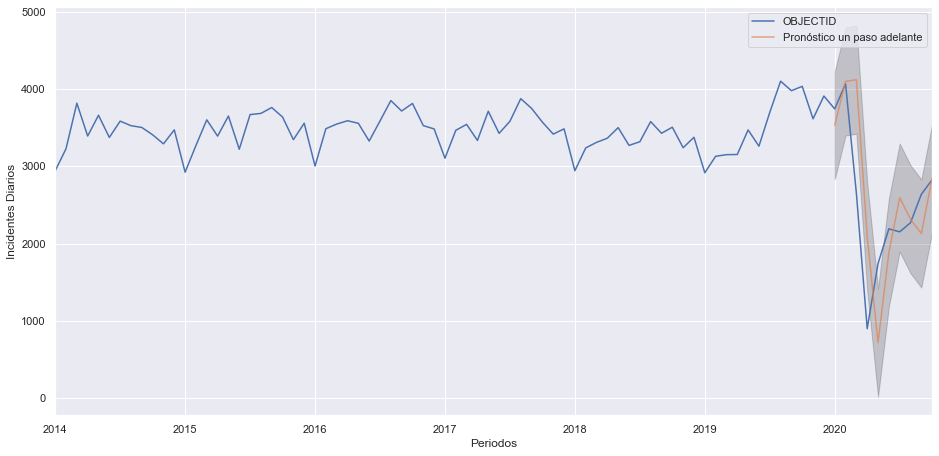

In [143]:
pred = results.get_prediction(start=pd.to_datetime(date_predict), dynamic=False)
pred_ci = pred.conf_int()
ax = incidentes_day2['2014':].plot(label='Incidentes')
pred.predicted_mean.plot(ax=ax, label='Pronóstico un paso adelante', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Periodos')
ax.set_ylabel('Incidentes Diarios')
plt.legend()
plt.show()

In [144]:
y_forecasted = pd.DataFrame(pred.predicted_mean)
y_forecasted.rename(columns={0:'valor'}, inplace=True)

y_truth = incidentes_day2[date_predict:]
y_truth.rename(columns={'OBJECTID':'valor'}, inplace=True)

mse = ((y_forecasted - y_truth) ** 2).mean()
print('MSE -> El error cuadrático medio de nuestros pronósticos es de {}'.format(round(mse[0], 2)))

MSE -> El error cuadrático medio de nuestros pronósticos es de 522743.93


In [145]:
print('RMSE -> El error de media cuadrática de nuestras pronósticos es de {}'.format(round(np.sqrt(mse[0]), 2)))

RMSE -> El error de media cuadrática de nuestras pronósticos es de 723.01


- El (**MSE**) es una medida de la calidad de un estimador; siempre es no negativo, y en cuanto más pequeño es el MSE, más cerca estamos de encontrar la línea de mejor ajuste.

- El error cuadrático medio (**RMSE**) nos dice que nuestro modelo pudo pronosticar los incidentes automovilisticos diarios promedio en el conjunto de prueba dentro de 26.45 de los incidentes reales. Los incidentes diarios de muebles oscilan entre 70 y más de 130. En mi opinión, este es un modelo bastante bueno hasta ahora.

### Producing and visualizing forecasts (Producir y visualizar pronósticos)

In [146]:
incidentes_day2.rename(columns={'OBJECTID':'incidentes'}, inplace=True)
incidentes_day2[(incidentes_day2['incidentes'] > 50) & (incidentes_day2['incidentes'] < 175)]

Empty DataFrame
Columns: [incidentes]
Index: []

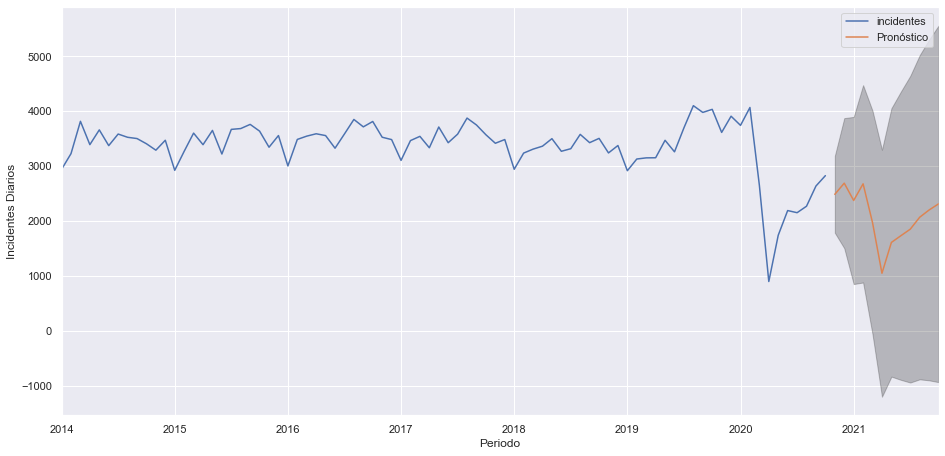

In [147]:
pred_uc = results.get_forecast(steps=12)
pred_ci = pred_uc.conf_int()
ax = incidentes_day2.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Pronóstico')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Periodo')
ax.set_ylabel('Incidentes Diarios')
plt.legend()
plt.show()

*****

# Memoria del Jupyter

In [ ]:
import sys

# These are the usual ipython objects, including this one you are creating
ipython_vars = ['In', 'Out', 'exit', 'quit', 'get_ipython', 'ipython_vars']

# Get a sorted list of the objects and their sizes
sorted([(x, sys.getsizeof(globals().get(x))) for x in dir() if not x.startswith('_') and x not in sys.modules and x not in ipython_vars], key=lambda x: x[1], reverse=True)

# otros scripts

In [ ]:
idx = pd.date_range(freq="h", start="2018-01-01", periods=365*24)
df = pd.DataFrame({'value': np.random.rand(365*24)}, index=idx)
df

In [ ]:
# df_pivot_año_mes.loc[df_pivot_año_mes.index == 2]
df_pivot_año_mes.loc[slice(None),slice(2014)]

In [ ]:
# df_pivot_año_mes.query('ilevel_1 == 2014')

In [ ]:
df_pivot = incidentes.pivot_table(index='DIA', columns=['PERIODO','MES'], values='OBJECTID', aggfunc='count', fill_value=0)

In [ ]:
type(df_pivot)

In [ ]:
df_pivot.plot()

In [ ]:
df_pivot_año_mes = incidentes.pivot_table(index='MES', columns=['PERIODO'], values='OBJECTID', aggfunc='count', fill_value=0)

In [ ]:
incidentes.groupby(['PERIODO', pd.Grouper(key='FECHA', freq='A-DEC')])['OBJECTID'].sum()

In [ ]:
incidentes[['FECHA','OBJECTID']].agg({'FECHA':['count'],'OBJECTID':['sum','mean']})

In [ ]:
df_i[['Fecha_Hora','OBJECTID']].agg({'Fecha_Hora':['count'],'OBJECTID':['sum']})

In [ ]:
df_count = df_i.groupby(['Fecha_Hora']).agg({'Fecha_Hora':['count']})

In [ ]:
# Resaltar el mayor valor por cada fila del data set resumen
incidentes.pivot_table(index='PERIODO', 
                       columns=['CLASE'], 
                       values='OBJECTID', 
                       aggfunc='count', 
                       fill_value=0).T\
.style.bar(subset=[2014,2015,2016,2017,2018,2019,2020], color=['#d65f5f', '#5fba7d'],axis=0)